# Vehicle Insurance Claim Fraud Detection

**Group 7:**

1.   Chua, Kyle
2.   Licup, Priscilla Mariah
3.   Ong, Daphne Louise



## Abstract
Insurance fraud, a scheme where individuals intentionally deceive insurance companies to receive money, results in significant financial losses, costing US families \$400–\$700 annually and totaling $308 billion nationwide. Traditional fraud detection methods, reliant on manual underwriting, are tedious and inefficient. This study explores the application of machine learning for quicker, real-time monitoring and efficient automated fraud detection, aiming to reduce fraud occurrence, mitigate its economic impact on consumers, and increase insurance companies' profitability. Initial data analysis and preprocessing involved dropping unnecessary columns, converting features to numeric values, removing invalid rows, imputing missing values, and encoding categorical features. Various algorithms, including Decision Trees, Logistic Regression, Gaussian Naive Bayes, OneClassSVM, and Isolation Forest, were evaluated using metrics such as accuracy, precision, recall, F1 score, and confusion matrices. Initial models struggled with fraud detection due to data imbalance, prompting the use of Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset and updates to balanced accuracy and F1 score for hyperparameter tuning. Results indicated that Logistic Regression performed best, identifying the most true positives and negatives. Model explainability techniques, including Partial Dependence Plots (PDP), SHapley Additive exPlanations (SHAP), and Local Interpretable Model-agnostic Explanations (LIME), were used to understand feature impacts. Key findings included the significant influence of features like vehicle age and deductible on fraud likelihood. The study recommends stricter reviews for policyholders with higher age and/or lower driver ratings, requiring more supplementary documents for claims with newer vehicles, establishing high-risk policies with more guidelines, and maintaining consistent scrutiny across areas.

## Introduction

### Problem Overview

Insurance fraud causes significant yearly financial losses. According to the FBI
(2022), it is reported that families pay \$400–\$700 every year due to insurance fraud. The Coalition Against Insurance Fraud’s 2022 research estimates that the yearly cost of fraud to Americans exceeds \$308 billion. Car insurance claims majorly contribute to significant expenses for policyholders and insurers. Another alarming fact points out that at least 70% of people can be easily misled through devices of this nature (Dellinger et al., 2024; Kilroy, 2024). 

Traditional approaches to fraud detection are tedious as it heavily relies on manual underwriting and imposes a challenge on contextual understanding. With machine learning, not only would it be quicker. It also gives access to real-time monitoring and automated systems could detect fraud efficiently (Sharma, 2024).

This research is about identifying and deterring vehicle insurance fraud. The existing literature on this topic has mainly concentrated on its comparison of predictive model development; however, this study assesses which features are more likely associated with fraud. These are the
objectives:

- Collect a dataset with fraud-related and other relevant data.
- Compare predictive models within the context of the dataset.
- Analyze relevant features in predicting potential fraud.
- Suggest measures to reduce fraud based on relevant features.

The costs of insurance fraud are high for both insurers and policyholders. Therefore, prevention and detection methods have become paramount and must be effective. This research aims to lower fraud occurrence by suggesting suitable measures, reducing its economic effect on consumers, and increasing the profitability of insurance companies. Policymakers and insurers will find this study useful as it provides insight into the best-performing fraud predicting model, among others, that can help curb such trends. 

### Dataset
The dataset obtained from Kaggle contains 33 columns of data points, each
representing a unique insurance claim. Each row includes information about the
incident, the policyholder, the vehicle, and the claim details (Bansal, 2022).


**Dataset Link:** [Vehicle Claim Fraud Detection (Kaggle)](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection)



Below is an overview of each column in the dataset.

| # | Column               | Data Type | Description                                                                                   | Example               |
|------------|----------------------|------------|-----------------------------------------------------------------------------------------------|-----------------------|
| 1          | Month                | String     | The month in which the insurance claim was made.                                              | Jan               |
| 2          | WeekOfMonth          | Integer    | The week of the month in which the insurance claim was made.                                  | 2                     |
| 3          | DayOfWeek            | String     | The day of the week on which the insurance claim was made.                                    | Monday                |
| 4          | Make                 | String     | The manufacturer of the vehicle involved in the claim.                                        | Toyota                |
| 5          | AccidentArea         | String     | The area where the accident occurred (e.g., urban, rural).                                    | Urban                 |
| 6          | DayOfWeekClaimed     | String     | The day of the week on which the insurance claim was processed.                               | Wednesday             |
| 7          | MonthClaimed         | String     | The month in which the insurance claim was processed.                                         | Feb              |
| 8          | WeekOfMonthClaimed   | Integer    | The week of the month in which the insurance claim was processed.                             | 3                     |
| 9          | Sex                  | String     | The gender of the policyholder.                                                               | Male                  |
| 10         | MaritalStatus        | String     | The marital status of the policyholder.                                                       | Single                |
| 11         | Age                  | Integer    | The age of the policyholder.                                                                  | 34                    |
| 12         | Fault                | String     | Indicates who was at fault in the accident.                              | Policyholder                   |
| 13         | PolicyType           | String     | The type of insurance policy (e.g., comprehensive, third-party).                              | Comprehensive         |
| 14         | VehicleCategory      | String     | The category of the vehicle (e.g., sedan, SUV).                                               | Sedan                 |
| 15         | VehiclePrice         | Float      | The price of the vehicle.                                                                     | 25000.00              |
| 16         | FraudFound_P         | Boolean    | Indicates whether fraud was detected in the insurance claim.                                  | True                  |
| 17         | PolicyNumber         | String     | The unique identifier for the insurance policy.                                               | P123456789            |
| 18         | RepNumber            | String     | The unique identifier for the insurance representative handling the claim.                    | R987654321            |
| 19         | Deductible           | Float      | The amount that the policyholder must pay out of pocket before the insurance company pays the remaining costs. | 500.00      |
| 20         | DriverRating         | Integer    | The rating of the driver, often based on driving history or other factors.                    | 4                     |
| 21         | Days_Policy_Accident | Integer    | The number of days since the policy was issued until the accident occurred.                   | 365                   |
| 22         | Days_Policy_Claim    | Integer    | The number of days since the policy was issued until the claim was made.                      | 370                   |
| 23         | PastNumberOfClaims   | Integer    | The number of claims previously made by the policyholder.                                     | 1                     |
| 24         | AgeOfVehicle         | Integer    | The age of the vehicle involved in the claim.                                                 | 5                     |
| 25         | AgeOfPolicyHolder    | Integer    | The age of the policyholder.                                                                  | 34                    |
| 26         | PoliceReportFiled    | Boolean    | Indicates whether a police report was filed for the accident.                                 | True                  |
| 27         | WitnessPresent       | Boolean    | Indicates whether a witness was present at the scene of the accident.                         | False                 |
| 28         | AgentType            | String     | The type of insurance agent handling the policy (e.g., internal, external).                   | Internal              |
| 29         | NumberOfSuppliments  | Integer    | The number of supplementary documents or claims related to the main claim.                    | 2                     |
| 30         | AddressChange_Claim  | Boolean    | Indicates whether the address of the policyholder was changed at the time of the claim.       | False                 |
| 31         | NumberOfCars         | Integer    | The number of cars insured under the policy.                                                  | 2                     |
| 32         | Year                 | Integer    | The year in which the claim was made or processed.                                            | 2023                  |
| 33         | BasePolicy           | String     | The base policy type (e.g., Liability, Collision, All Perils).                                | Liability             |


## Requirements

In [1]:
filename = 'fraud_oracle.csv'

In [2]:
# Use this only if using google drive

# from google.colab import drive
# drive.mount('/content/drive')

# filename = INSERT FILE PATH HERE


In [3]:
# Use this to install additional packages

# !pip install category_encoders imblearn shap lime

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import shap
from sklearn.inspection import PartialDependenceDisplay
from lime.lime_tabular import LimeTabularExplainer

shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [5]:
df = pd.read_csv(filename)

In [6]:
# Constants
random_state = 42
target_column = 'FraudFound_P'

## Exploratory Data Analysis

In [7]:
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [9]:
df.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000      1.000000   1994.000000  
25%     3855.750000      5.000000    400.000000      1.000000   1994.000000  
50%     7710.500000      8.000000    400.000000      2.000000   1995.000000  
75%    11565.250000     12.000000    400.000000      3.000000   1996.000000  
max    15420.000000     16.000000    700.000000      4.000000   1996.000000

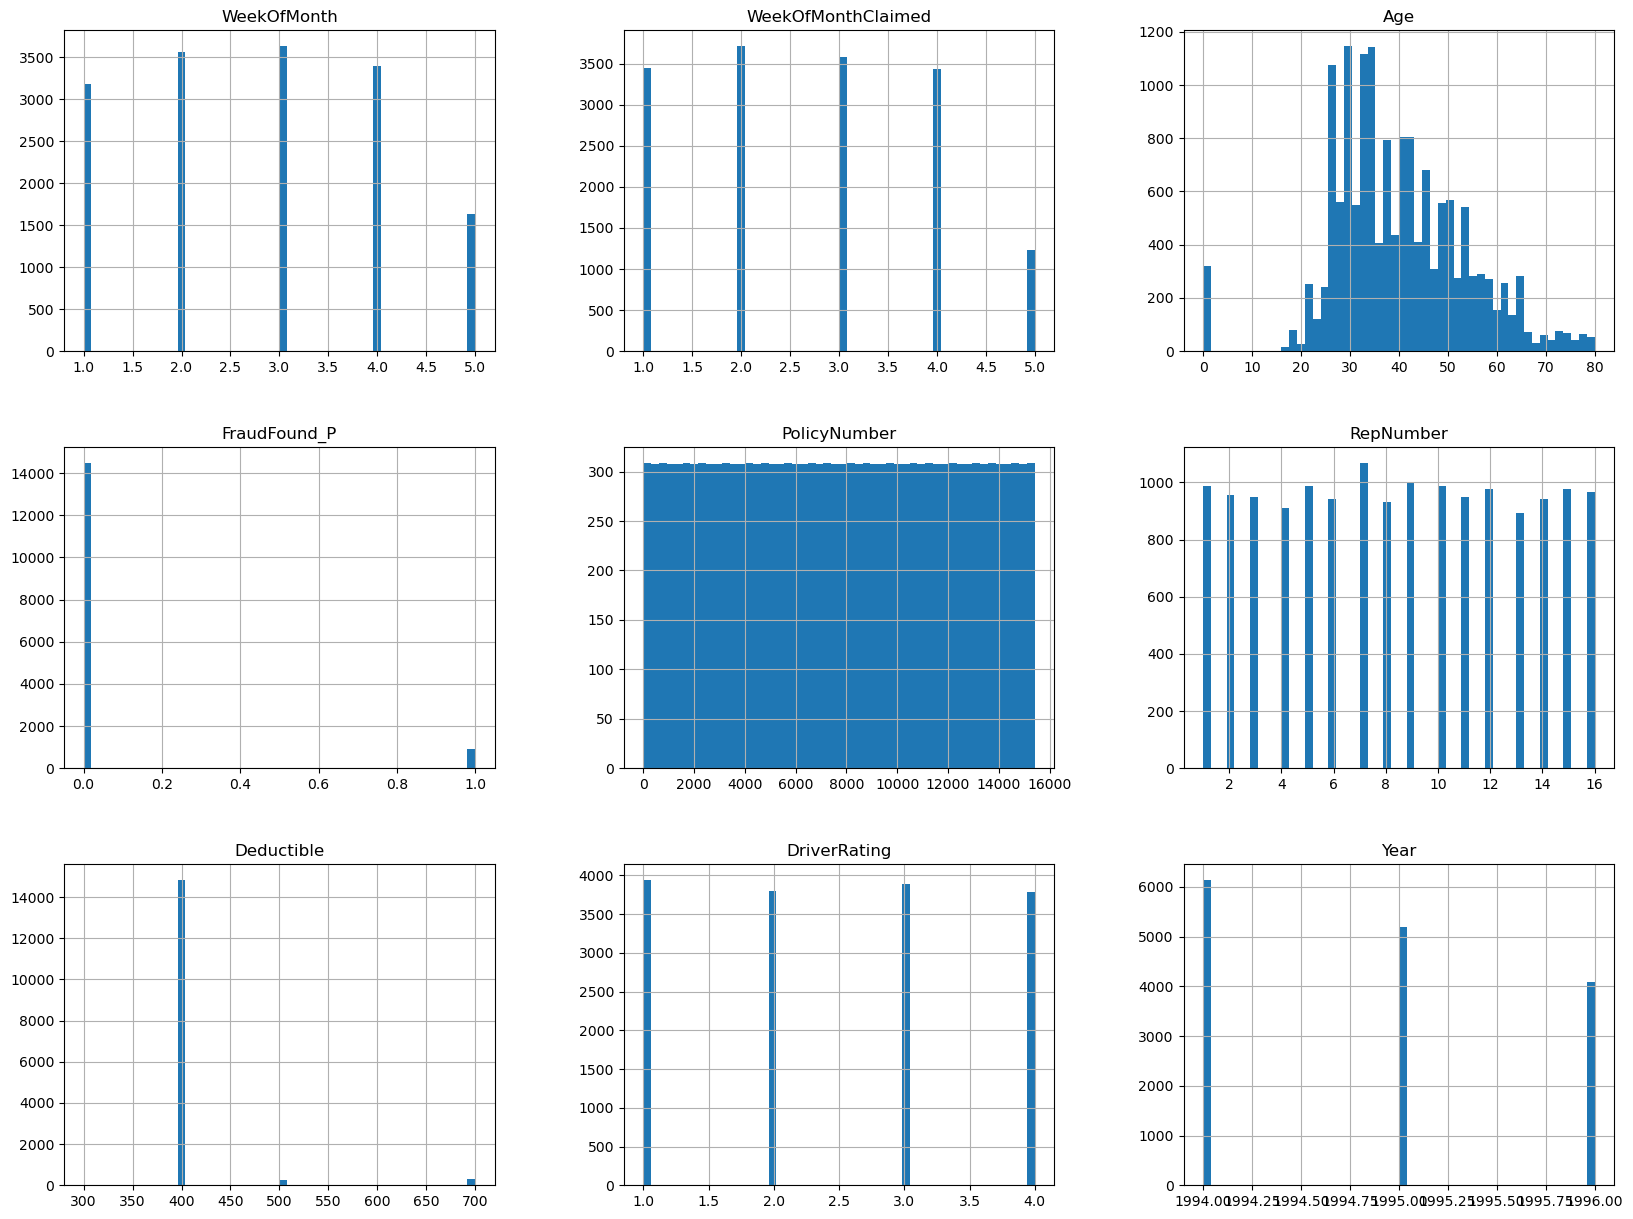

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Identify Missing Values

In [11]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

### Data Types

In [12]:
print(df.dtypes)

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

### Numerical Columns

#### Correlation

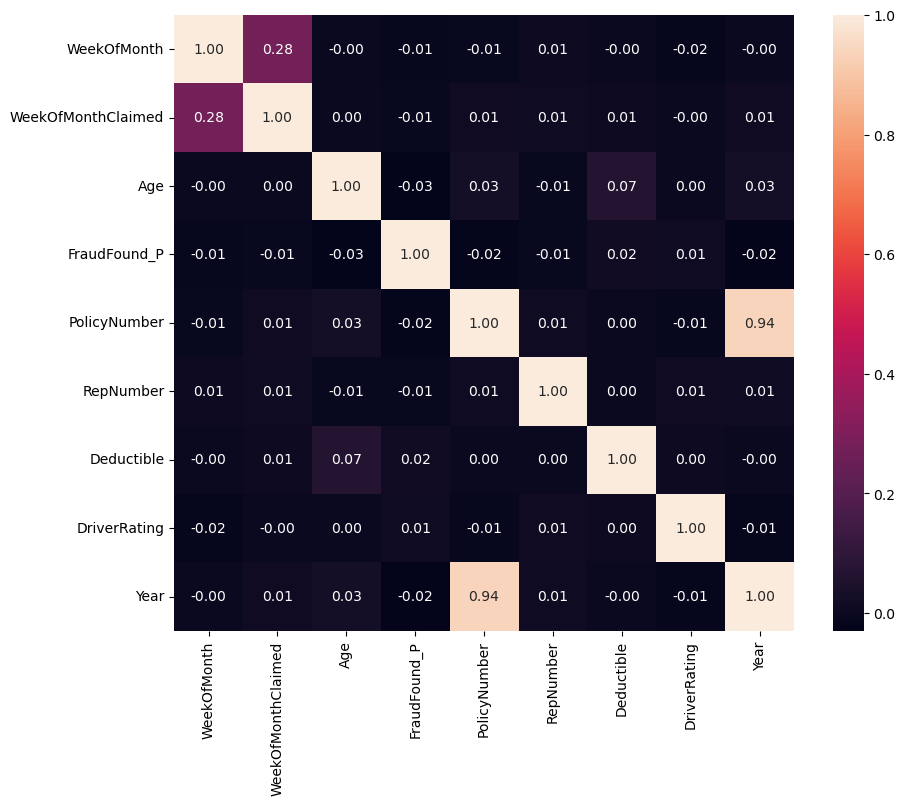

In [13]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f")
plt.show()

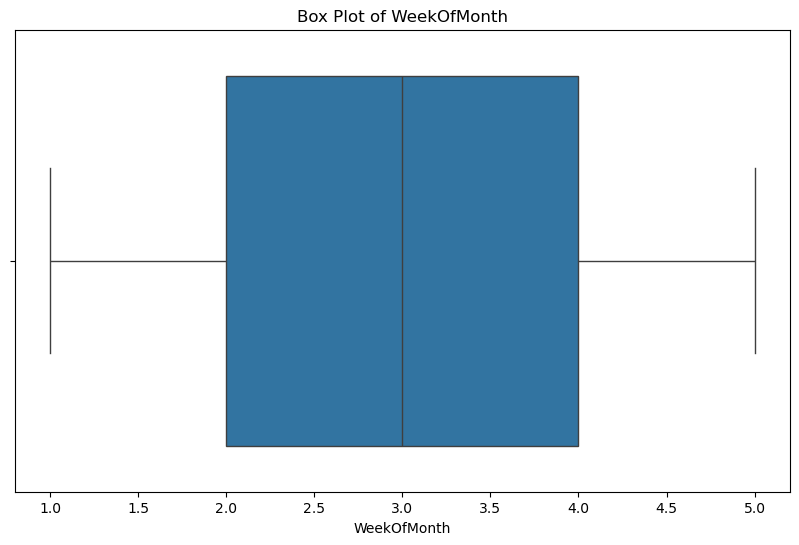

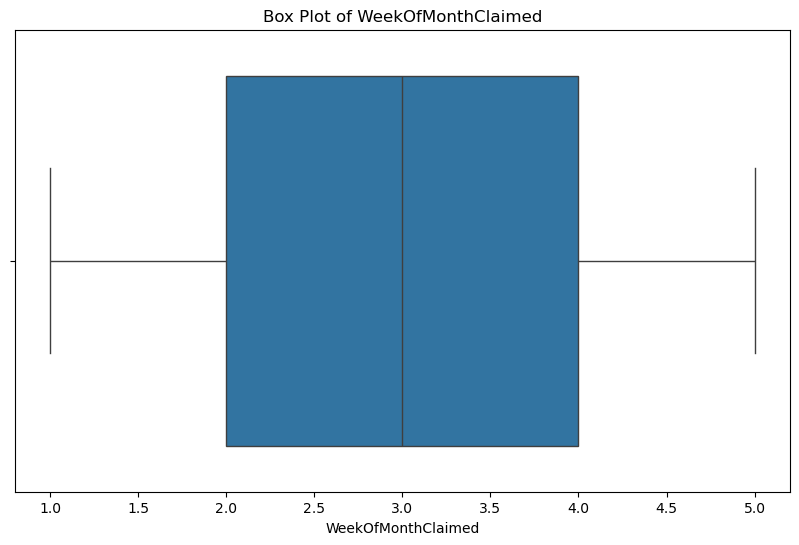

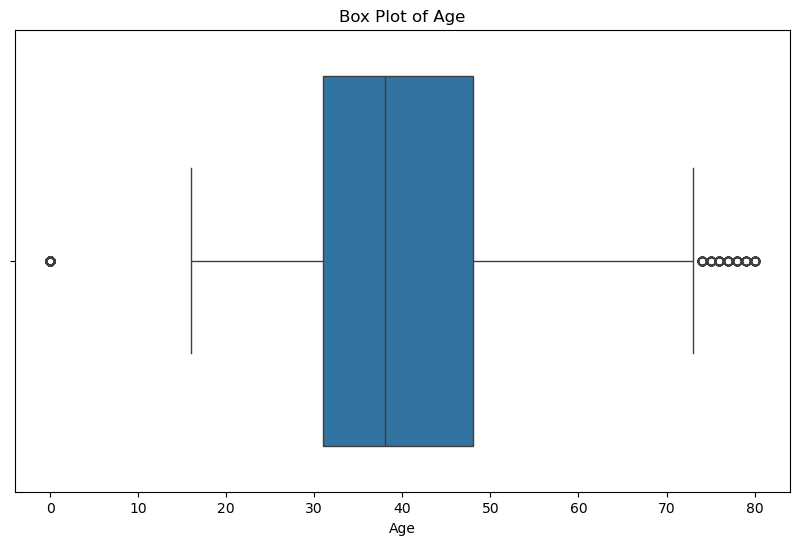

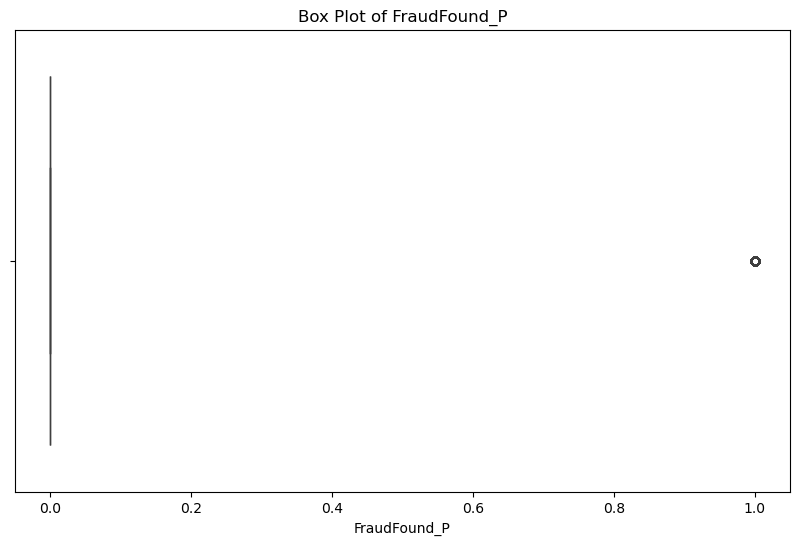

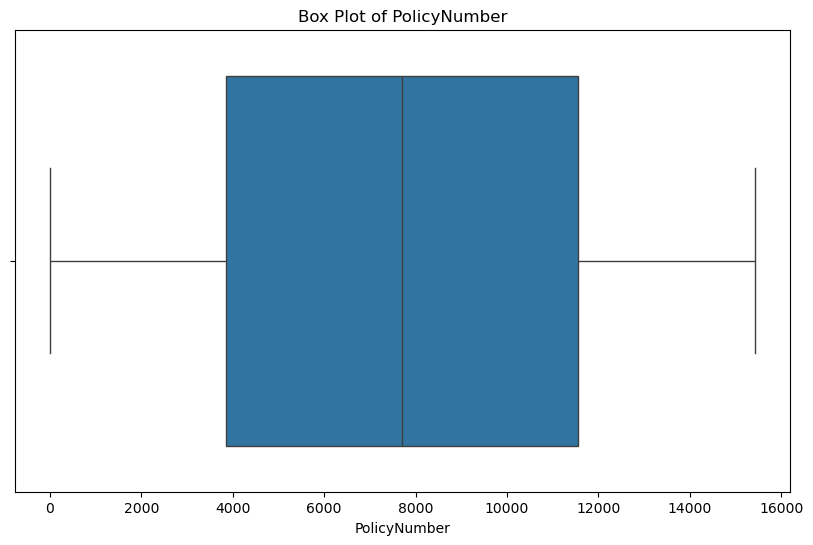

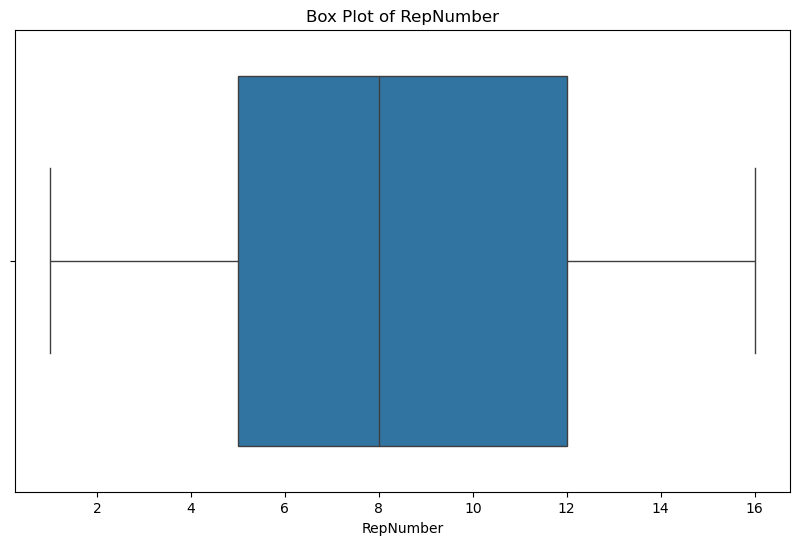

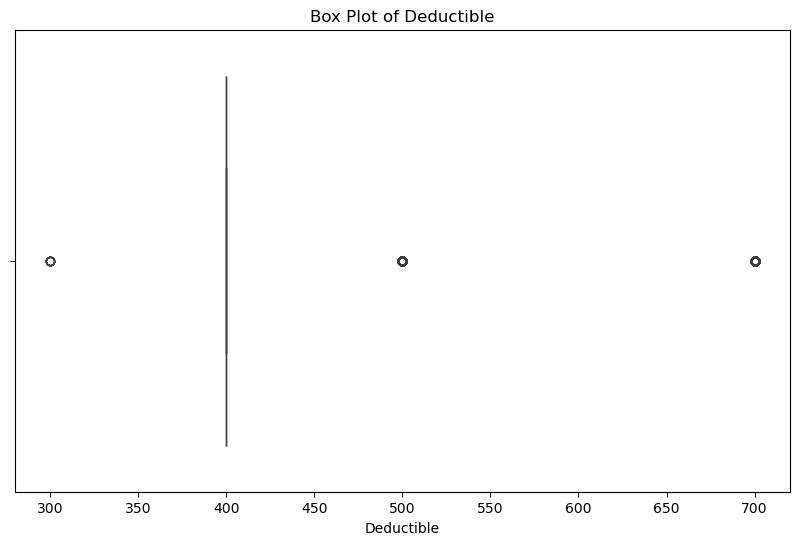

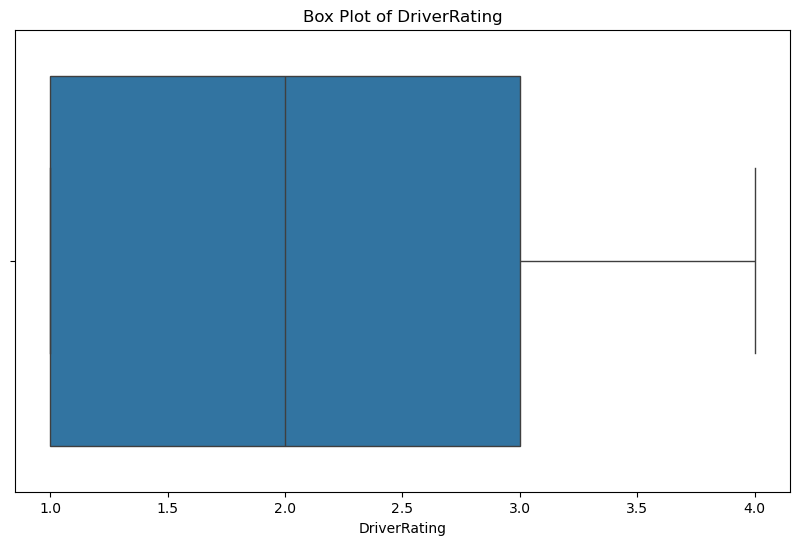

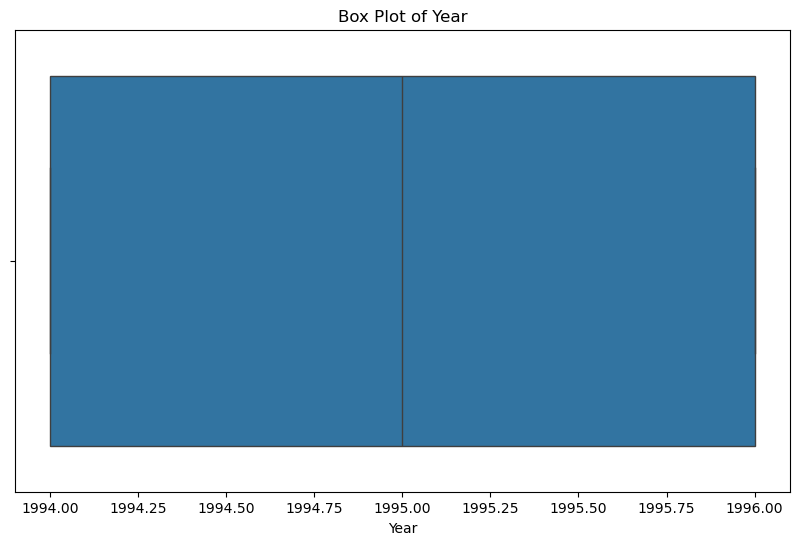

In [14]:
# Plot box plots for numerical columns
for column in numerical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

### Categorical Columns

Some int columns were retained as they may be considered categorical:

*   WeekOfMonth
*   WeekOfMonthClaimed
*   FraudFound_P
*   Deductible
*   DriverRating
*   Year



In [15]:
categorical_df = df.drop(['Age', 'PolicyNumber', 'RepNumber'], axis=1)

#### Frequency Count

In [16]:
for column in categorical_df.columns:
    print(categorical_df[column].value_counts())
    print("\n")

Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: count, dtype: int64


WeekOfMonth
3    3640
2    3558
4    3398
1    3187
5    1637
Name: count, dtype: int64


DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: count, dtype: int64


Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64


AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64


DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      1

#### Bar Charts

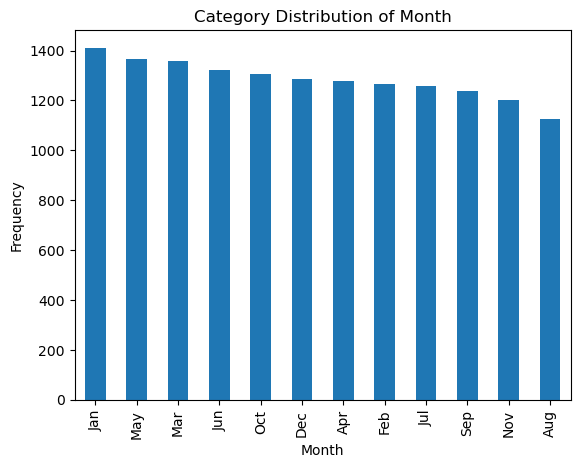

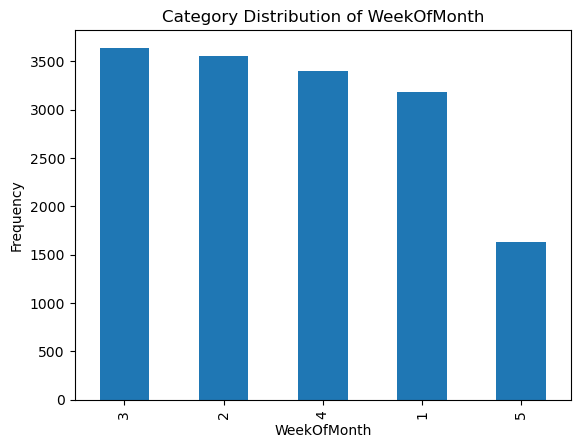

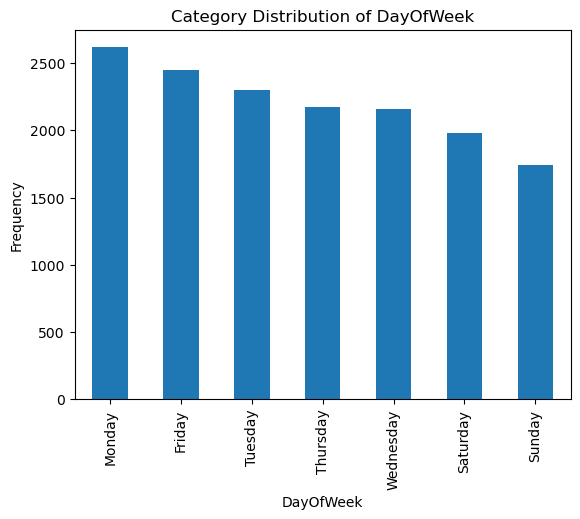

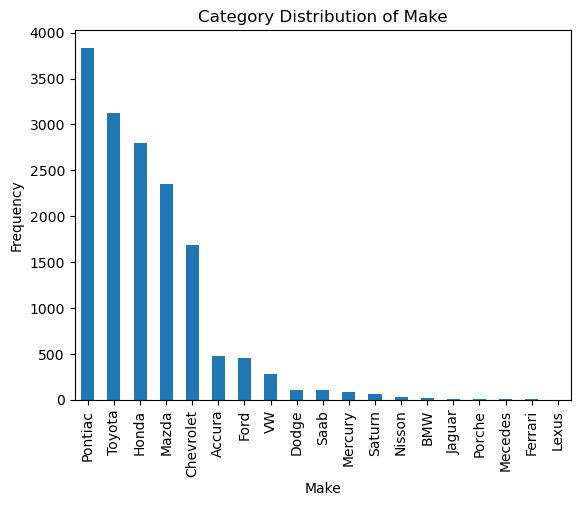

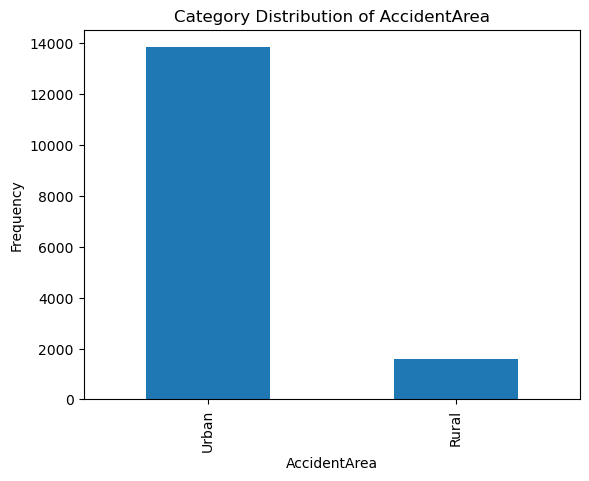

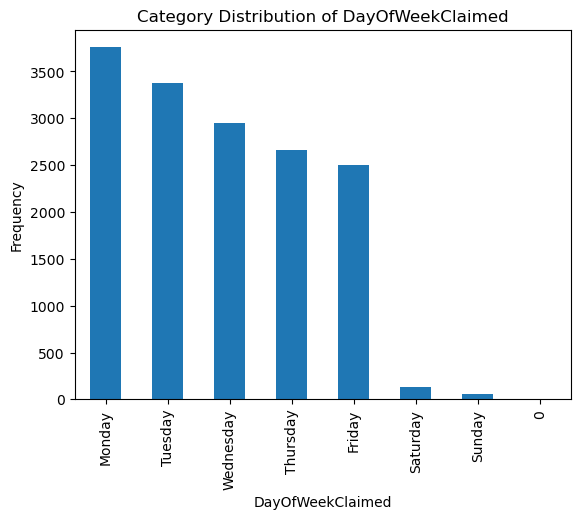

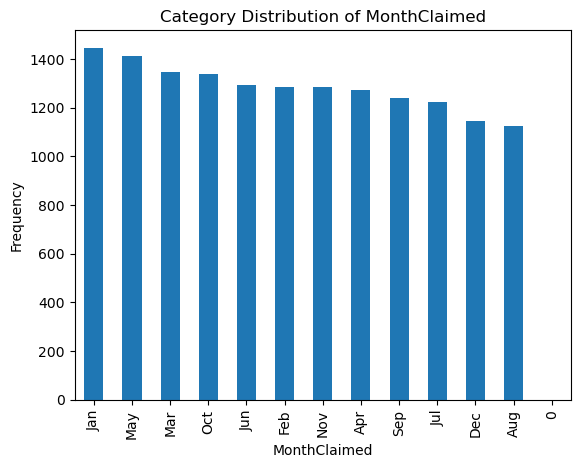

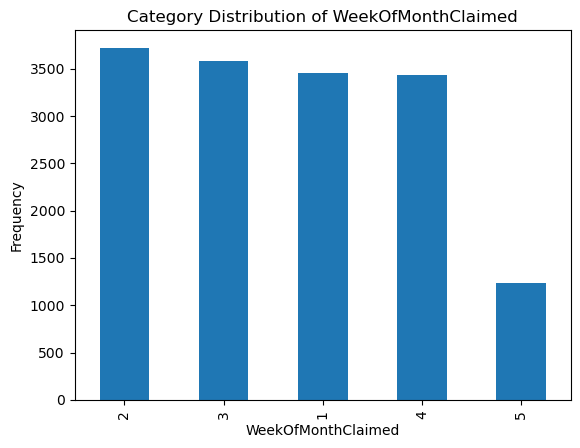

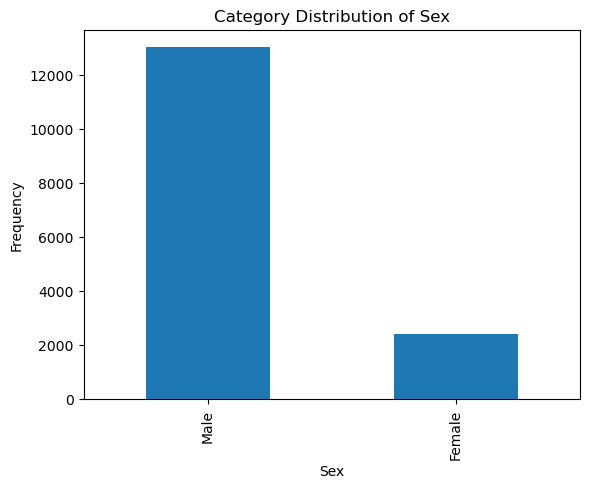

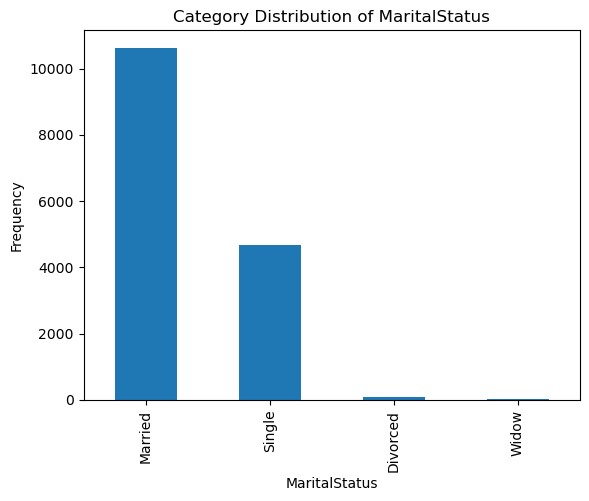

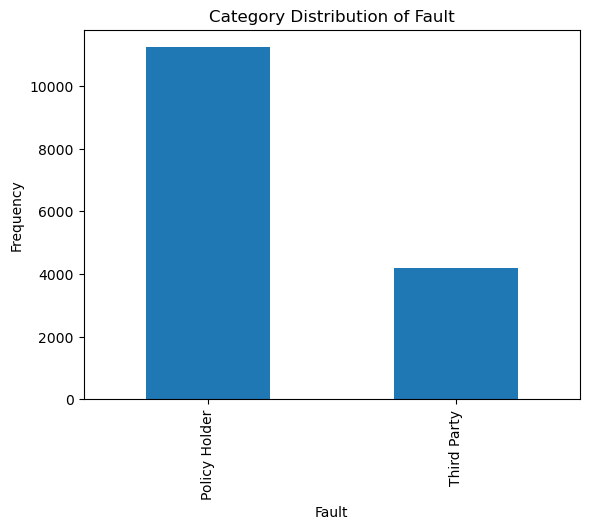

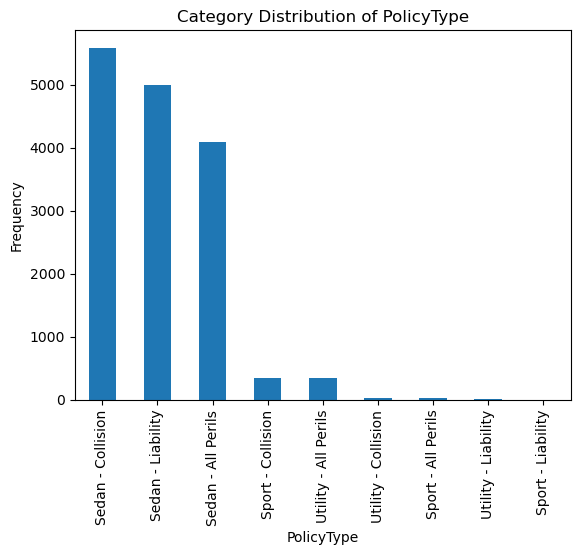

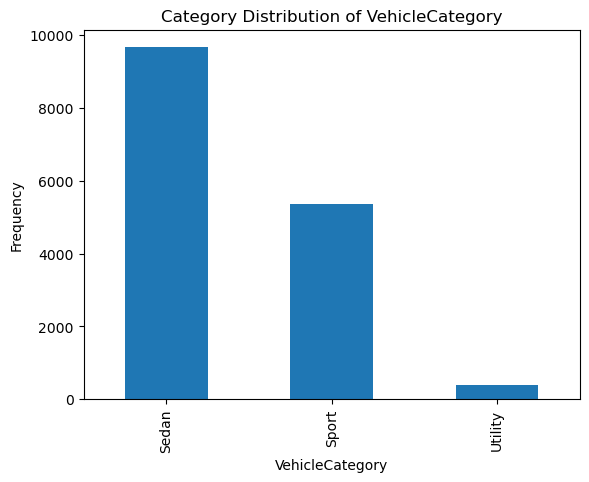

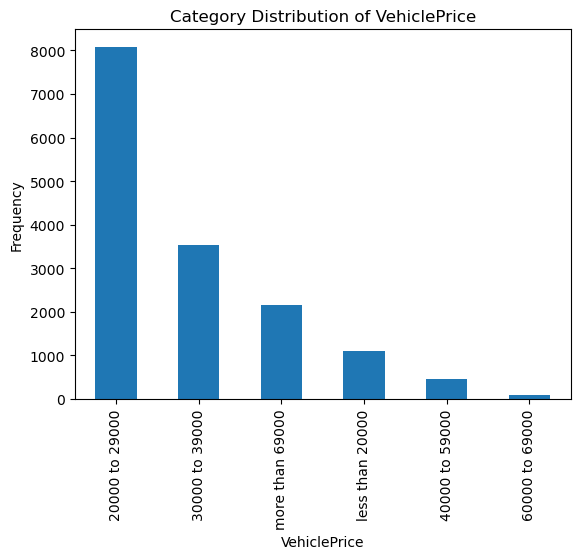

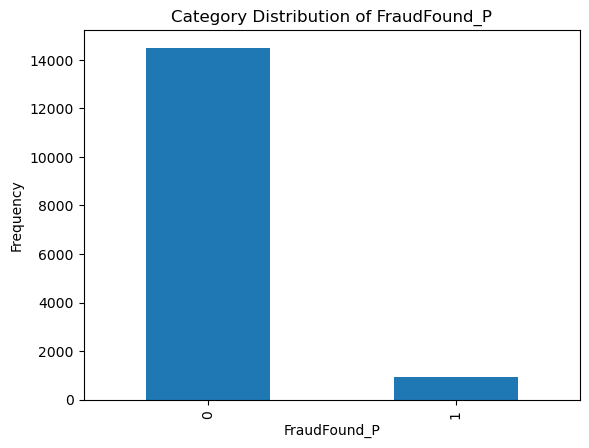

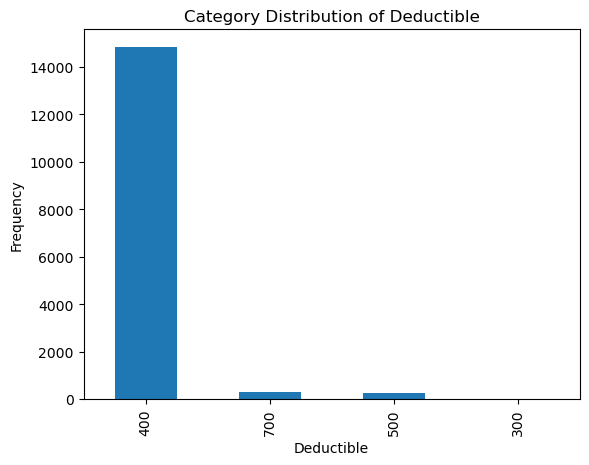

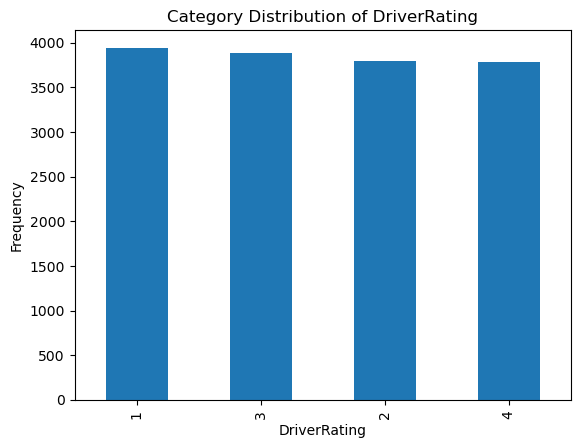

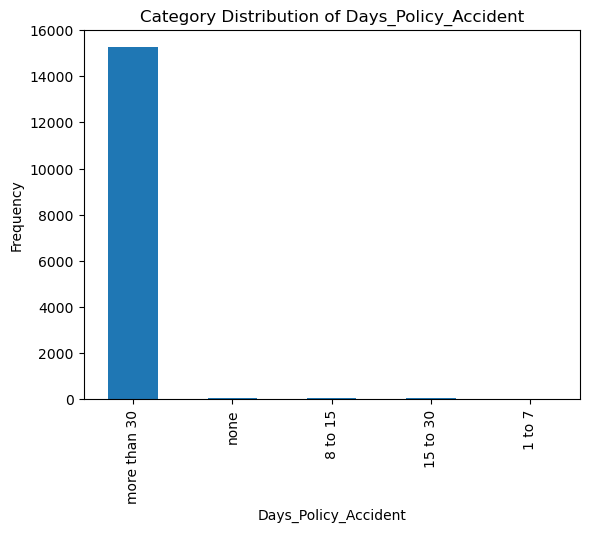

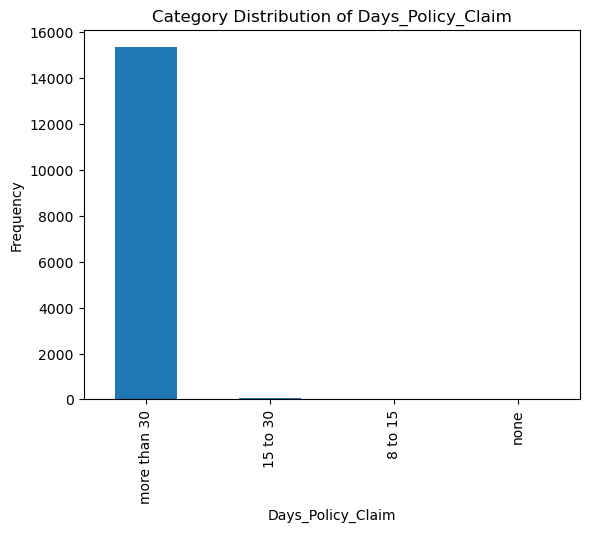

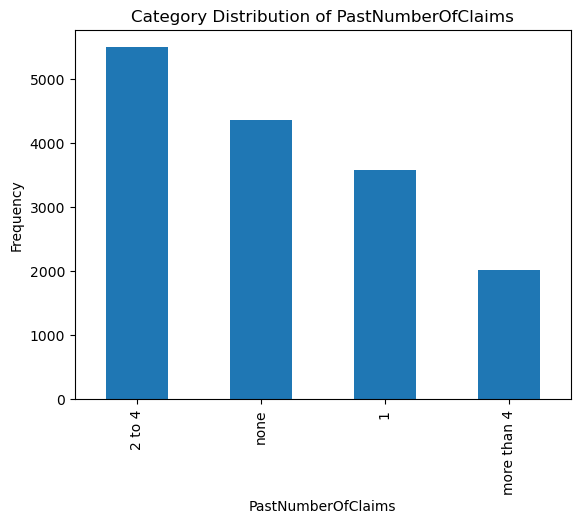

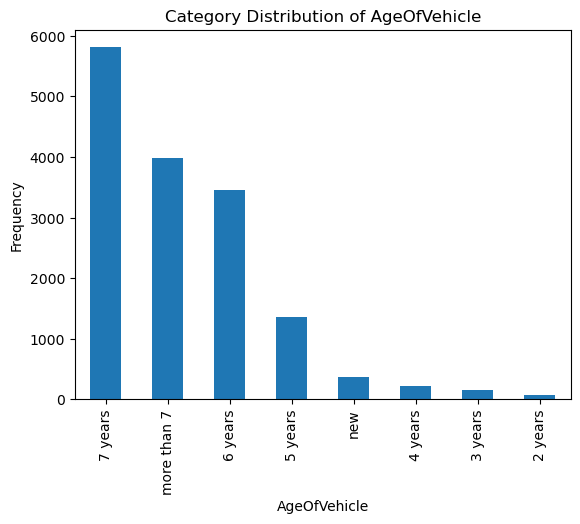

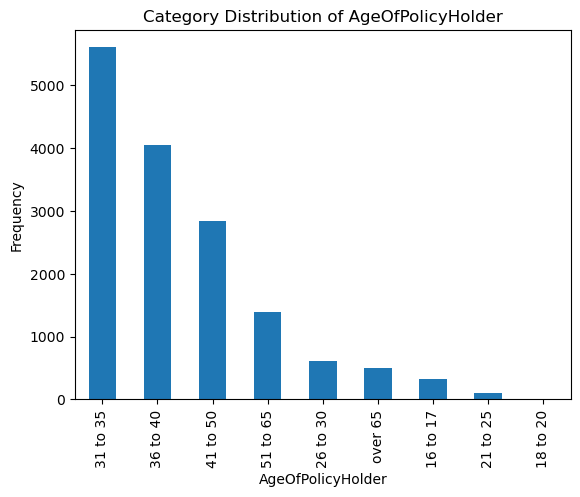

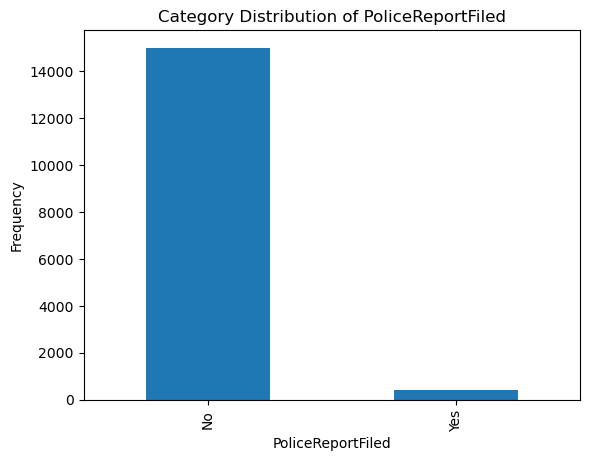

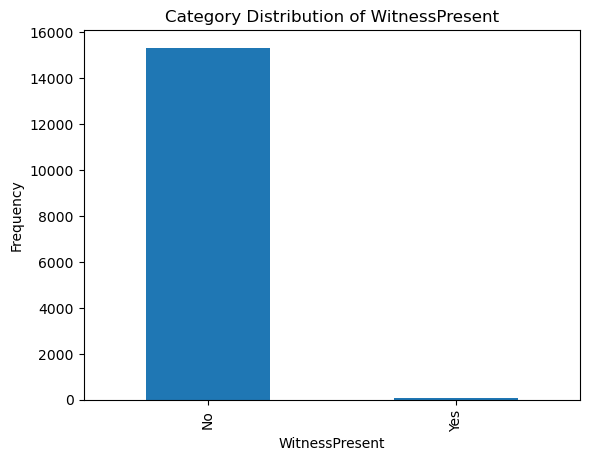

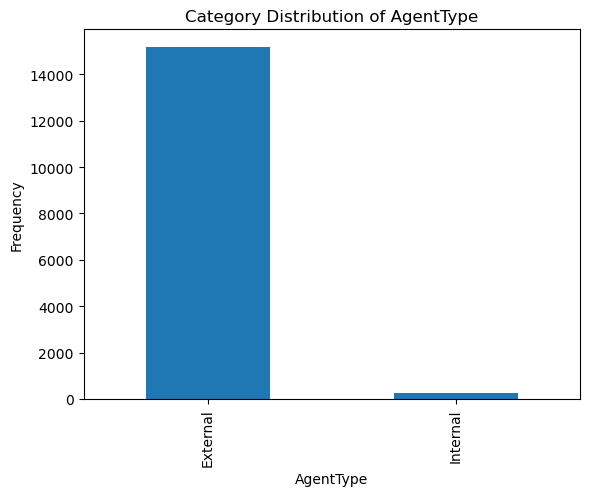

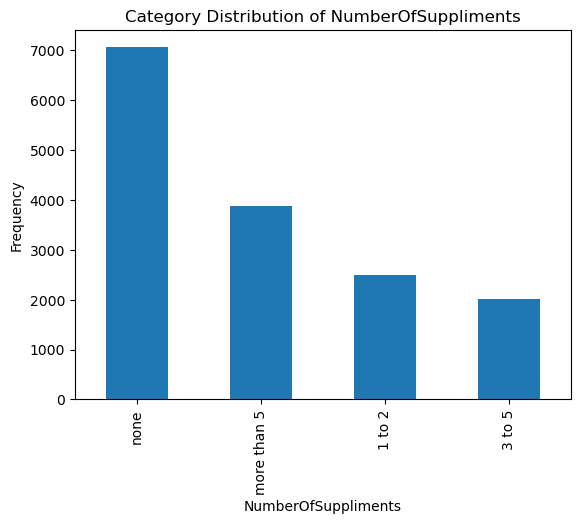

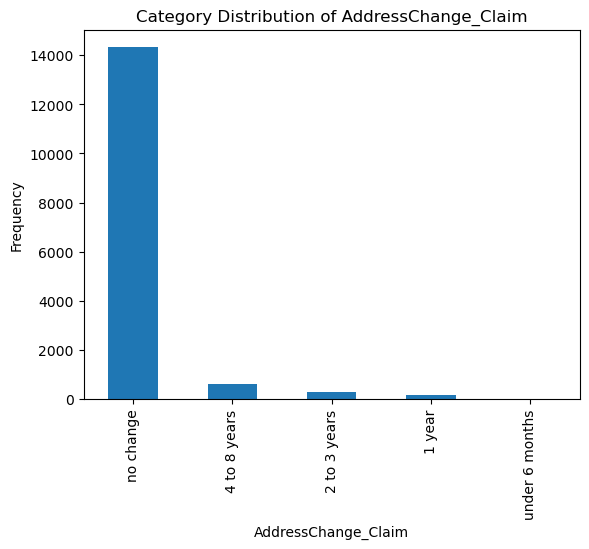

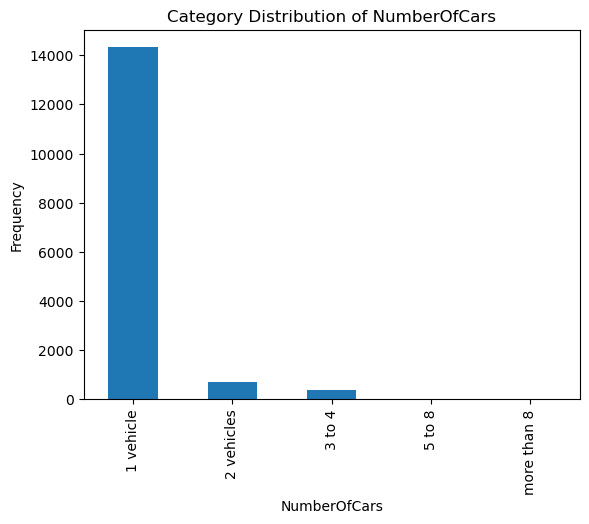

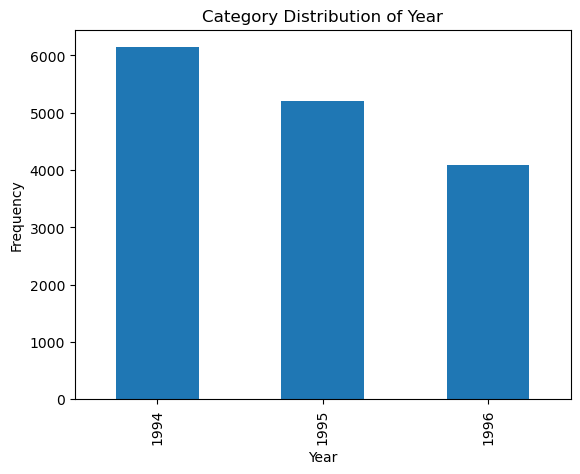

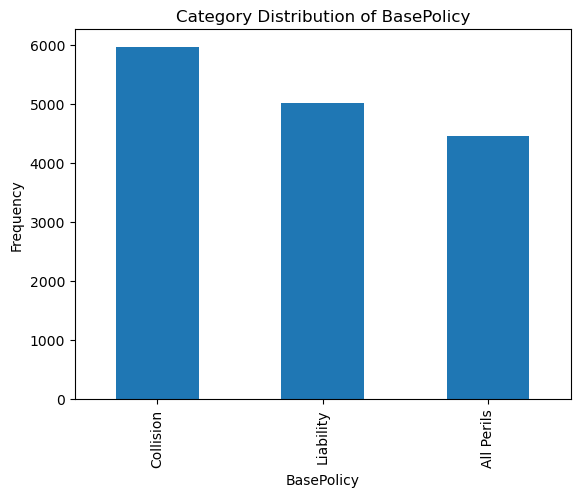

In [17]:
for column in categorical_df.columns:
  category_counts = categorical_df[column].value_counts()
  category_counts.plot(kind='bar')
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency')
  plt.title(f'Category Distribution of {column}')
  plt.show()

#### Pie Charts

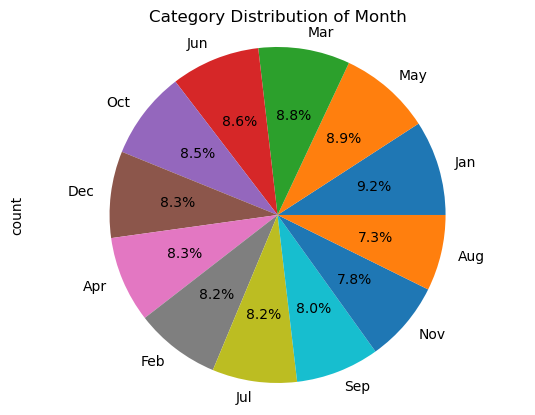

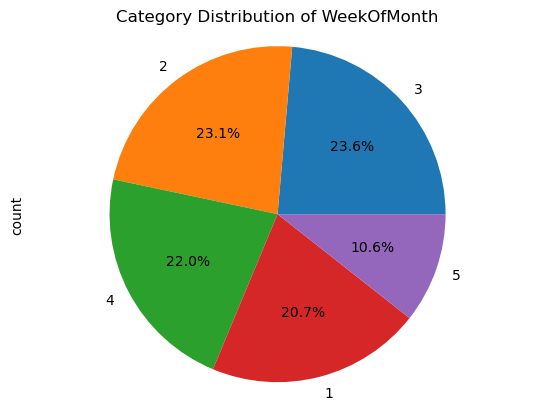

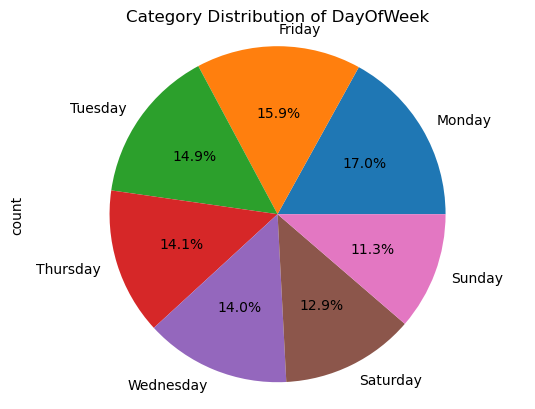

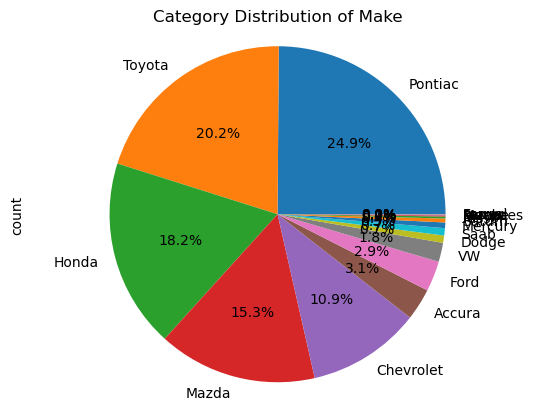

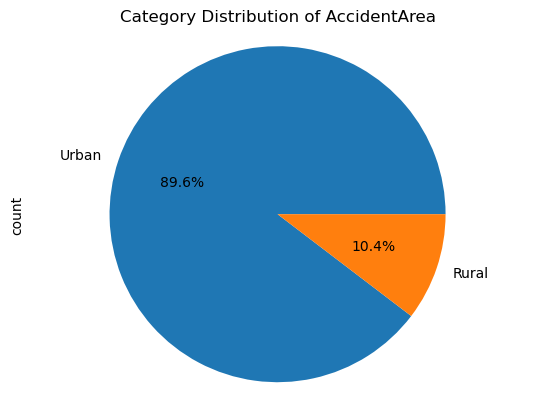

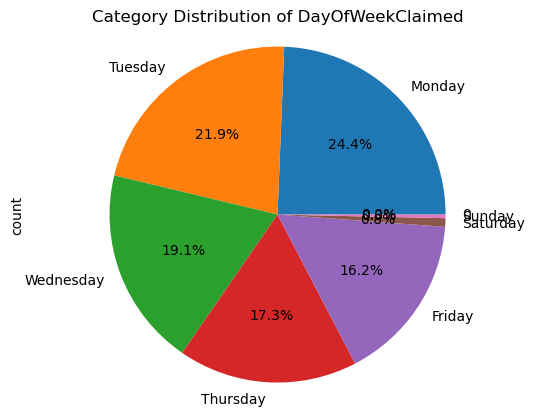

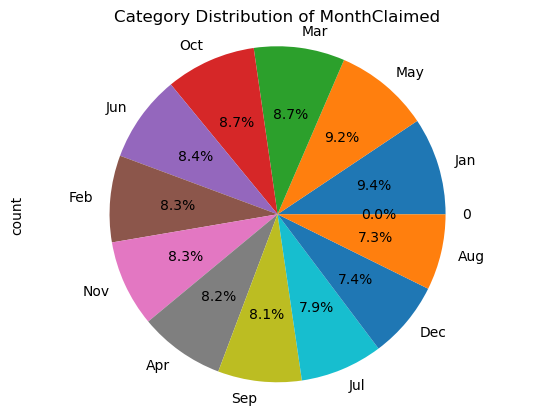

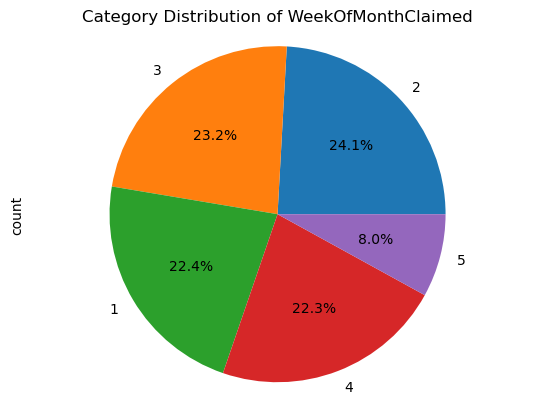

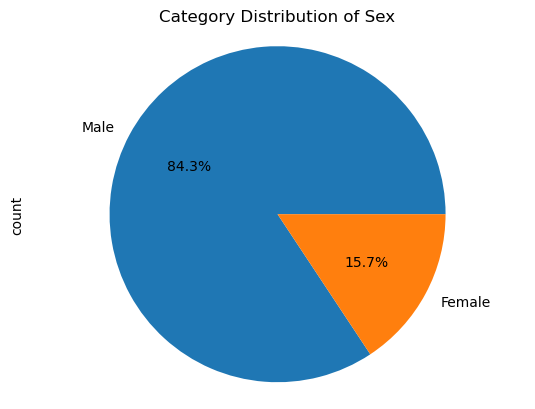

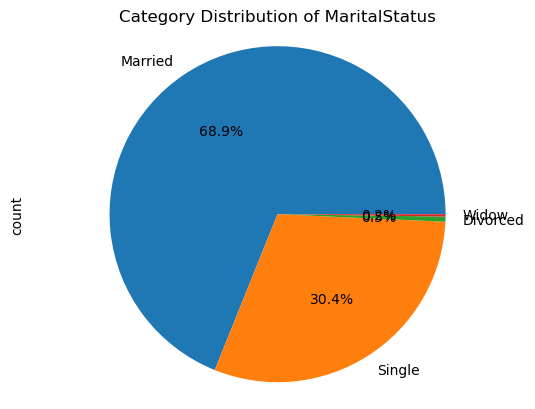

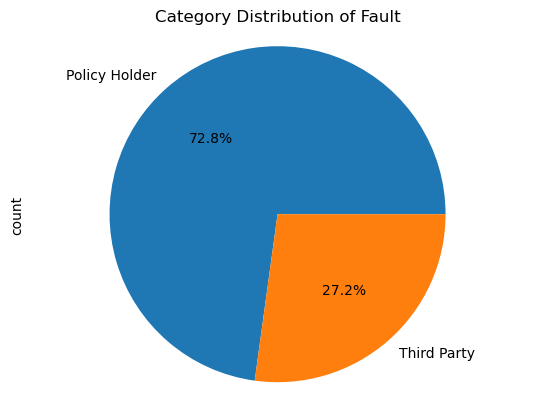

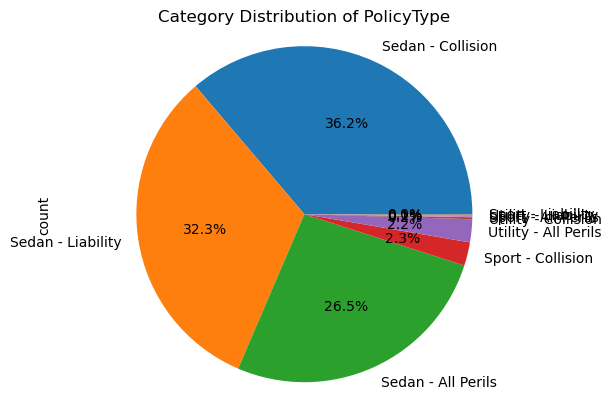

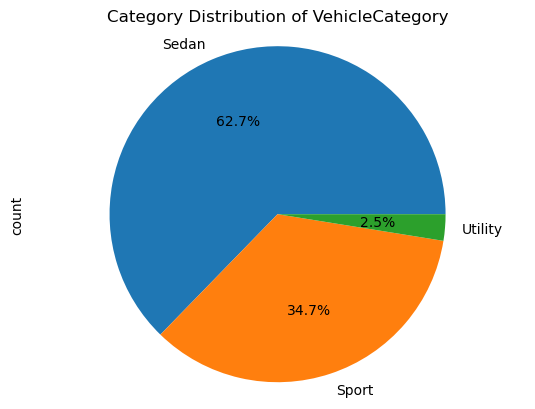

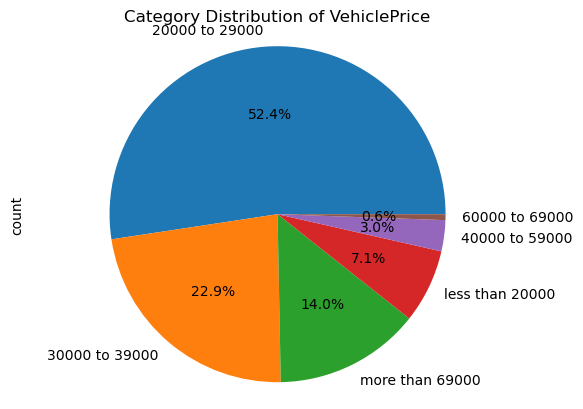

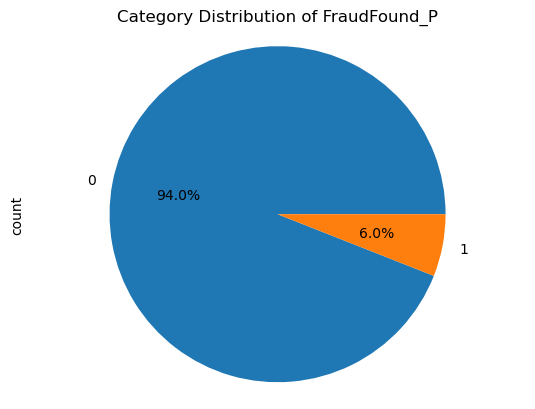

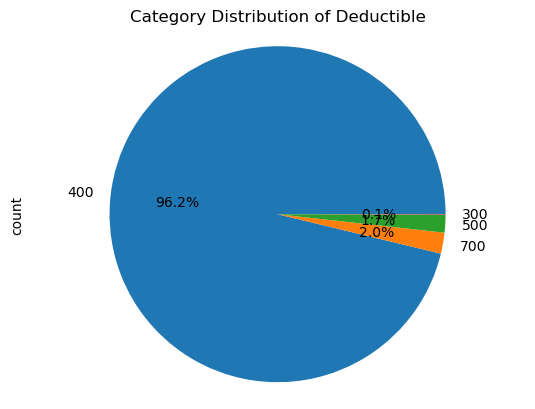

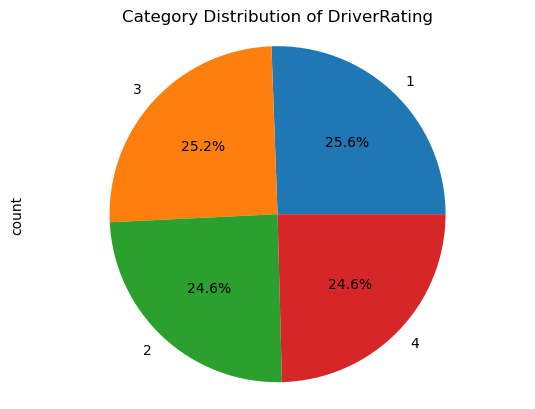

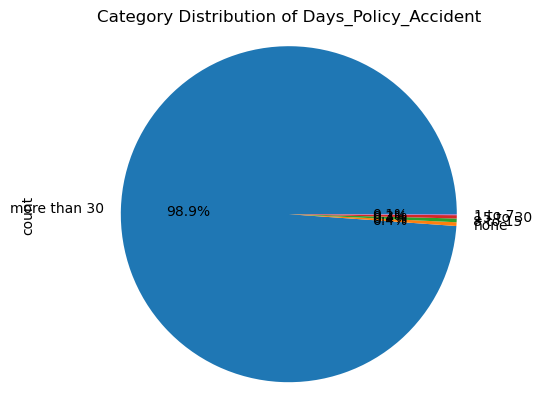

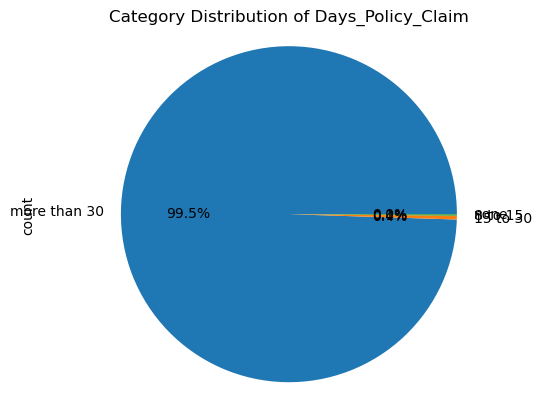

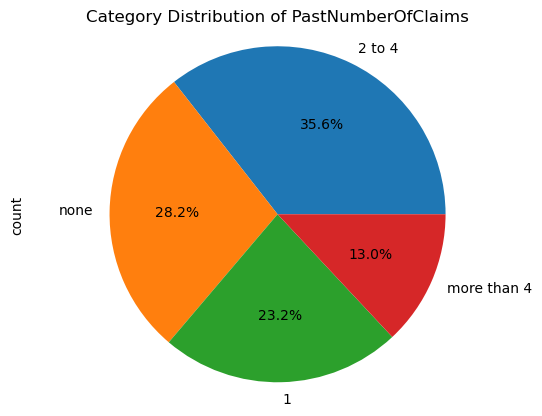

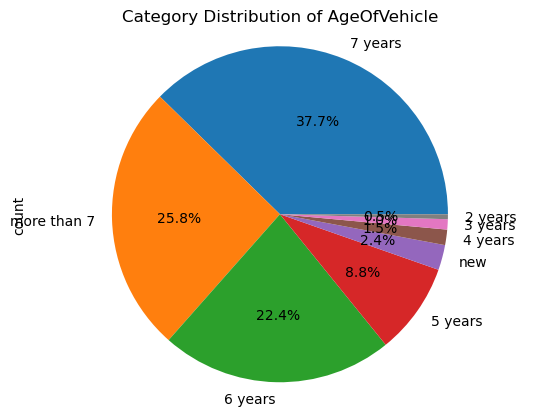

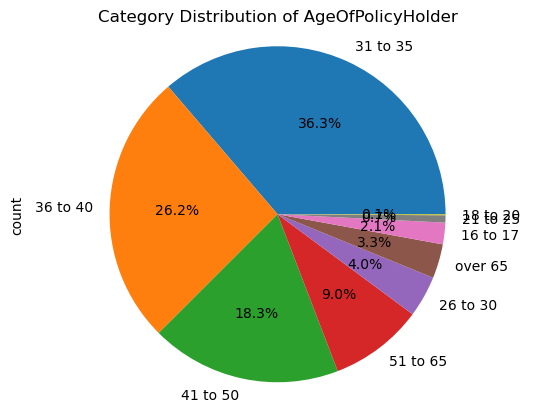

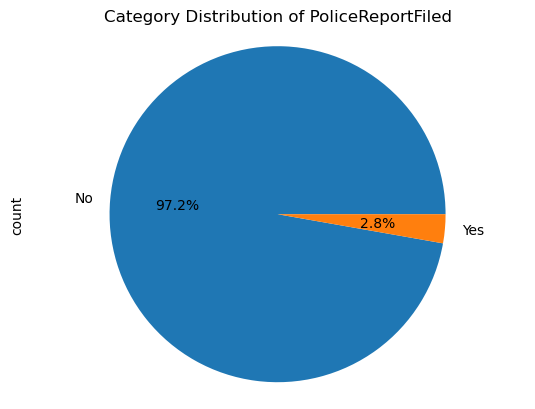

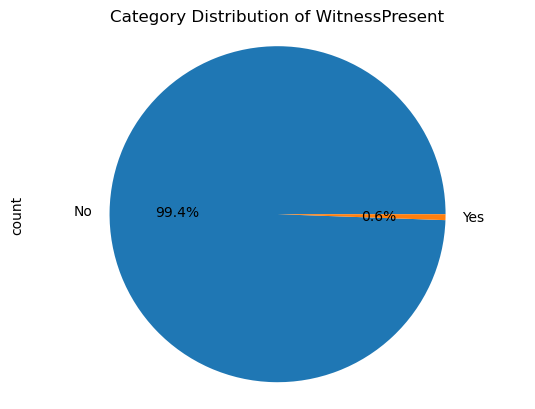

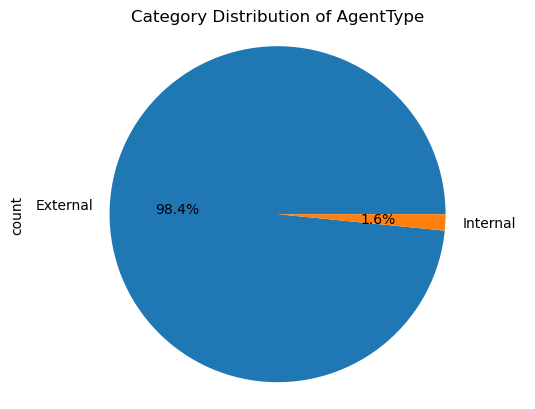

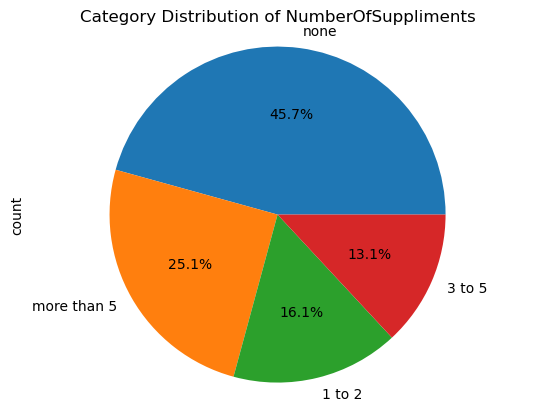

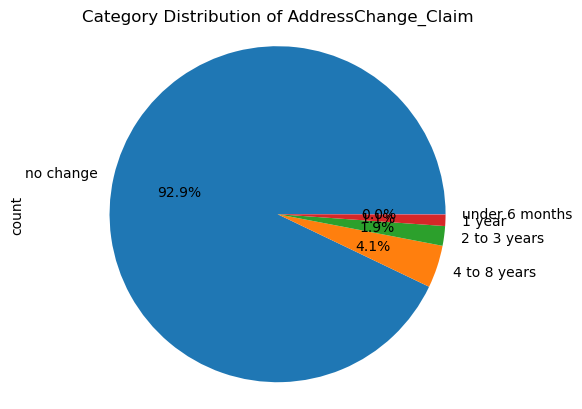

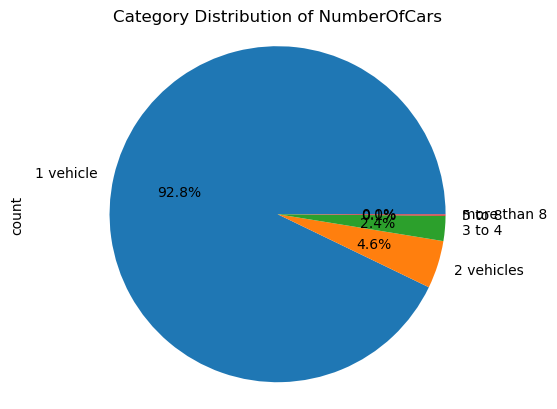

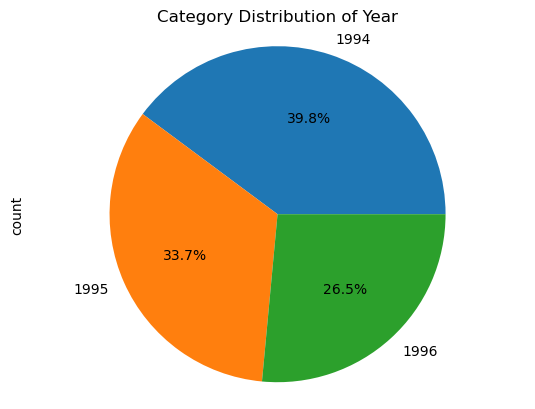

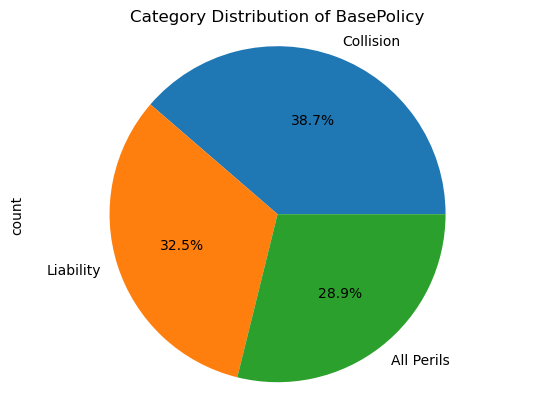

In [18]:
for column in categorical_df.columns:
  category_counts = categorical_df[column].value_counts()
  category_counts.plot(kind='pie', autopct='%1.1f%%')
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(f'Category Distribution of {column}')
  plt.show()

#### Correlation

In [19]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorial-categorial association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [20]:
# Creating a correlation matrix
columns = categorical_df.columns
corr_matrix = pd.DataFrame(index=columns, columns=columns)

# Apply Cramér's V for each pair of variables
for col1 in columns:
    for col2 in columns:
        corr_matrix.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])

# Convert correlation matrix to float type for plotting
corr_matrix = corr_matrix.astype(float)

In [21]:
corr_matrix

Month  WeekOfMonth  DayOfWeek      Make  \
Month                 1.000000     0.041288   0.038230  0.000000   
WeekOfMonth           0.041288     1.000000   0.015834  0.005024   
DayOfWeek             0.038230     0.015834   1.000000  0.000000   
Make                  0.000000     0.005024   0.000000  1.000000   
AccidentArea          0.011199     0.008196   0.024085  0.046078   
DayOfWeekClaimed      0.033688     0.009069   0.143995  0.000000   
MonthClaimed          0.747048     0.034555   0.011495  0.000000   
WeekOfMonthClaimed    0.055586     0.401083   0.000000  0.000000   
Sex                   0.016662     0.000000   0.019061  0.073264   
MaritalStatus         0.000000     0.010735   0.016736  0.067654   
Fault                 0.009280     0.019905   0.038686  0.046709   
PolicyType            0.017798     0.023917   0.029341  0.165184   
VehicleCategory       0.018287     0.017377   0.052441  0.192175   
VehiclePrice          0.017490     0.000000   0.016892  0.260183   
FraudFound_P          0.034914     0.000000   0.016406  0.052072   
Deductible            0.006343     0.000000   0.017547  0.009295   
DriverRating          0.000000     0.010825   0.000000  0.003954   
Days_Policy_Accident  0.000000     0.014556   0.010988  0.018159   
Days_Policy_Claim     0.009792     0.007332   0.005856  0.000000   
PastNumberOfClaims    0.017109     0.004506   0.015877  0.033761   
AgeOfVehicle          0.042221     0.000000   0.013079  0.136873   
AgeOfPolicyHolder     0.031756     0.010117   0.021922  0.120186   
PoliceReportFiled     0.048222     0.002525   0.012841  0.009755   
WitnessPresent        0.000000     0.000000   0.000000  0.000000   
AgentType             0.018577     0.000000   0.000000  0.033383   
NumberOfSuppliments   0.015619     0.000000   0.005012  0.050781   
AddressChange_Claim   0.007780     0.000000   0.000000  0.000000   
NumberOfCars          0.059911     0.000000   0.000000  0.027050   
Year                  0.054468     0.000000   0.000000  0.000000   
BasePolicy            0.027061     0.006613   0.043162  0.114251   

                      AccidentArea  DayOfWeekClaimed  MonthClaimed  \
Month                     0.011199          0.033688      0.747048   
WeekOfMonth               0.008196          0.009069      0.034555   
DayOfWeek                 0.024085          0.143995      0.011495   
Make                      0.046078          0.000000      0.000000   
AccidentArea              0.999651          0.025763      0.028732   
DayOfWeekClaimed          0.025763          1.000000      0.379825   
MonthClaimed              0.028732          0.379825      1.000000   
WeekOfMonthClaimed        0.008328          0.034784      0.062432   
Sex                       0.032531          0.000000      0.013365   
MaritalStatus             0.000000          0.001638      0.000000   
Fault                     0.002637          0.018565      0.011617   
PolicyType                0.067619          0.027996      0.017422   
VehicleCategory           0.063997          0.020026      0.014175   
VehiclePrice              0.018663          0.000000      0.024735   
FraudFound_P              0.032056          0.000000      0.044305   
Deductible                0.000000          0.004408      0.000000   
DriverRating              0.000000          0.010955      0.007390   
Days_Policy_Accident      0.000000          0.000000      0.000000   
Days_Policy_Claim         0.020319          0.577352      0.577017   
PastNumberOfClaims        0.061275          0.003849      0.021527   
AgeOfVehicle              0.017491          0.019671      0.050035   
AgeOfPolicyHolder         0.019578          0.023098      0.044539   
PoliceReportFiled         0.000000          0.010614      0.058189   
WitnessPresent            0.025711          0.009409      0.000000   
AgentType                 0.000000          0.022069      0.026430   
NumberOfSuppliments       0.014681          0.000000      0.015780   
AddressChange_Claim       

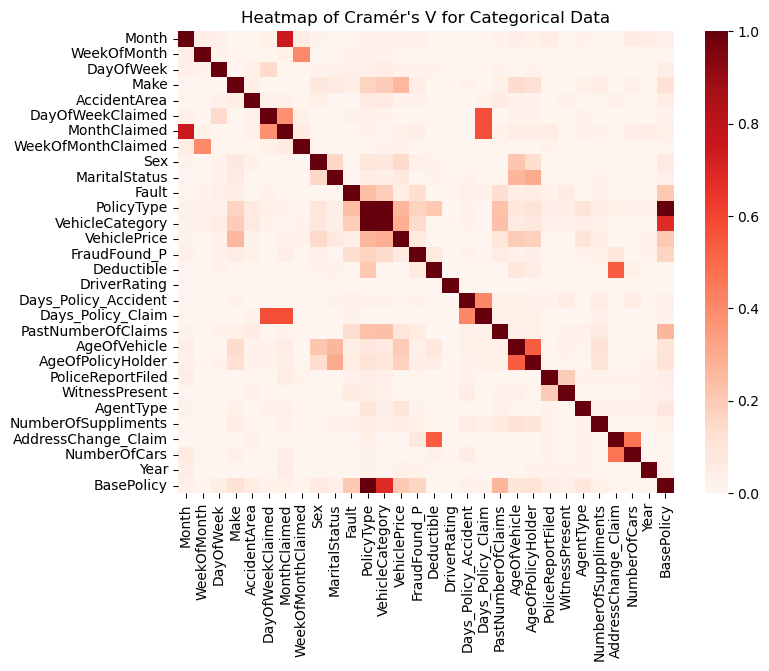

In [22]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='Reds', fmt=".2f")
plt.title('Heatmap of Cramér\'s V for Categorical Data')
plt.show()

## Insights from EDA

*   There are no missing values that needs processing.
*   `PolicyNumber` is an ID. This will be dropped.
*   The features `Sex`, `PoliceReportFiled`, and `WitnessPresent` are boolean. This will be converted to 0 or 1.
*   The features `AccidentalArea`, `Fault`, and `AgentType` each have only two unique values. Can also be converted to 0 or 1.  
*   The columns `FraudFound_P` and `Deductible` are highly skewed. These are considered skewed because its skewness falls outside the range of -0.5 ~ 0.5.
*   The features `WeekOfMonth`, `WeekOfMonthClaimed`, `FraudFound_P`, `Deductible`, and `DriverRating` exhibit high kurtosis; Typically a feature is considered to have high kurtosis if its value falls outside the range of -1 ~ 1.    




### Additional Issues to Investigate

*   `DayOfWeekClaimed` - contains a 0 instead of a day of the week
*   `MonthClaimed` - contains a 0 instead of the month
*   `Age` - contains a 0 instead of the necessary age, which doesn't make sense
*   `PolicyType` - appears to be a concatenation of `VehicleCategory` and `BasePolicy`





## Hypothesis Formulation

The following table presents a selection of 8 features from the
dataset, each accompanied by a specific hypothesis regarding its potential
relationship with the likelihood of an insurance claim being fraud.



---



| Feature                | Hypothesis                                                        |
|------------------------|-------------------------------------------------------------------|
| Age of Policyholder    | Older policyholders have a higher likelihood of committing fraud. |
| Number of Supplements  | Claims with a lower number of supplements are more likely to be fraudulent. |
| Age of Vehicle         | Older vehicles are more likely to be involved in fraudulent claims. |
| Vehicle Price          | Higher vehicle prices are associated with a higher likelihood of fraud. |
| Past Number of Claims  | Policyholders with more past claims are more likely to file fraudulent claims. |
| Driver Rating          | Policyholders with lower driver ratings are more likely to file fraudulent claims. |
| Policy Type            | Certain policy types are more prone to fraud.                     |
| Accident Area          | Claims from urban areas have a higher probability of being fraudulent than rural areas. |
| Deductible             | Claims with lower deductibles are more likely to be fraudulent.   |

## Data Preprocessing and Cleaning

In [23]:
# Let's create a copy of our raw data for data cleaning
df_clean1 = df.copy()
df_clean1.shape

(15420, 33)

### Dropping Columns

In [24]:
df_clean1 = df_clean1.drop(['PolicyNumber', 'RepNumber'], axis=1)
df_clean1.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year BasePolicy  
0                 none               1 year        3 to 4  1994  Liability  
1                 none            no change     1 vehicle  1994  Collision  
2                 none            no change     1 vehicle  1994  Collision  
3          more than 5            no change     1 vehicle  1994  Liability  
4                 none            no change     1 vehicle  1994  Collision  

[5 rows x 31 columns]

### Feature Transformation

In [25]:
# String to Float
df_clean1['VehiclePrice'] = df_clean1['VehiclePrice'].astype('object')

### Drop Missing Rows

First, we will investigate `DayOfWeekClaimed` and `MonthClaimed` that has a value of 0.

In [26]:
print('DayOfWeekClaimed has ', len(df_clean1.loc[(df['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(df_clean1.loc[(df['MonthClaimed']=='0')]),' row(s) with a 0')
print(' ')

df_clean1[(df_clean1['DayOfWeekClaimed'] == '0') | (df_clean1['MonthClaimed'] == '0')]
# There is only one row (row 1516), where these values are zero.

DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0
 


Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1516                 none            no change     1 vehicle  1994  All Perils  

[1 rows x 31 columns]

In [27]:
# Since both DayOfWeekClaimed and MonthClaimed are 0 for the same entry, it will be dropped
df_clean2 = df_clean1.loc[df_clean1['DayOfWeekClaimed']!='0']

# We reset the index for df2 to prevent KeyError
df_clean2.reset_index(drop=True, inplace=True)
len(df_clean2)

15419

### Imputation

Now, let us investigate the rows where Age is 0.

In [28]:
# There are 319 rows where the feature Age is assigned a zero,
print(len(df_clean2[df_clean2['Age'] == 0]), 'rows where age is 0')
print('')

# Though for the displayed rows the policy holder is said to be between 16 and 17 years old.
df_clean2.loc[df_clean2['Age'] == 0, 'AgeOfPolicyHolder']

319 rows where age is 0



7        16 to 17
13       16 to 17
28       16 to 17
31       16 to 17
58       16 to 17
           ...   
15242    16 to 17
15261    16 to 17
15273    16 to 17
15378    16 to 17
15391    16 to 17
Name: AgeOfPolicyHolder, Length: 319, dtype: object

In [29]:
# We display the unique values to to confirm every row with Age=0, has a policyholder that is aged between 16 and 17 years.
df_clean2.loc[(df_clean2['Age']==0),'AgeOfPolicyHolder'].value_counts()

# All 319 rows with Age = 0, has an AgeOfPolicyHolder value of 16 to 17

# Create separate dataframe to assign new values
df2_age0_idx = (df_clean2['Age'] == 0)

Before imputing any values to Age column, we first investigate the relationship between Age and AgeOfPolicyHolder

In [30]:
# Split the AgeOfPolicyHolder column into substrings
# Check that the age variable is in range for policyholder

groupings = []
for holder in df_clean2['AgeOfPolicyHolder']:
    if 'to' in holder :
        temp = holder.split()
        nr=[int(temp[0]),int(temp[2])]
        groupings.append(nr)
    else :
        temp = holder.split()
        nr = [int(temp[1]),129]
        groupings.append(nr)

In [31]:
# Compare value for age to the value of the AgeOfPolicyHolder
age_idx = []
rw_idx = []
for r in range(len(df_clean2['Age'])):
    if (df_clean2.loc[r,'Age'] >= groupings[r][0]) & (df_clean2.loc[r,'Age'] <= groupings[r][1]):
        age_idx.append(0)
    else:
        age_idx.append(1)
        rw_idx.append(r)

In [32]:
print(len(df_clean2.loc[list(rw_idx),('Age','AgeOfPolicyHolder')]))
df_clean2.loc[list(rw_idx),('Age','AgeOfPolicyHolder')].head()

7241


Age AgeOfPolicyHolder
0   21          26 to 30
4   27          31 to 35
5   20          21 to 25
7    0          16 to 17
8   30          31 to 35

During our investigation of the feature 'Age' being set to 0, we have established that there are 7241 rows out 15419, where the 'Age' does not correspond to the age range of 'AgeOfPolicyHolder'. We assumed that the individual driving at the time of the accident was not the policy holder, but another individual.

**Revision Note:**  Initially, we imputed values using the mean of the 16 to 17 age bracket under `AgeOfPolicyHolder` which is 16.5. However, considering that there is no relationship between `Age` and `AgeOfPolicyHolder`, we learned that this is not the best solution so we commented out this code. Instead, we impute with the mode of `Age`


In [33]:
# NO LONGER USED - Assigns an age of 16 to all rows with missing Age values
# df_clean2.loc[list(df2_age0_idx),'Age'] = 16.5

In [34]:
# Impute with the mode under the original Age column
imputer = SimpleImputer(strategy='most_frequent')
df_clean2['Age'] = imputer.fit_transform(df_clean2[['Age']])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
# Check if there are still Age values that are 0
df_clean2[df_clean2['Age'] == 0]

Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
7       Nov            1    Friday  Honda        Urban          Tuesday   
13      Jan            5    Friday  Honda        Rural        Wednesday   
28      Jul            1  Saturday  Honda        Urban          Tuesday   
31      Mar            1    Sunday  Honda        Urban          Tuesday   
58      May            1    Monday  Honda        Rural        Wednesday   
...     ...          ...       ...    ...          ...              ...   
15242   May            2   Tuesday  Honda        Urban           Monday   
15261   Mar            3    Monday  Honda        Urban         Thursday   
15273   Apr            3    Monday  Honda        Urban          Tuesday   
15378   Jan            2   Tuesday  Honda        Urban         Thursday   
15391   Jan            1  Thursday  Honda        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
7              Mar                   4  Male        Single  ...           new   
13             Feb                   1  Male        Single  ...           new   
28             Sep                   4  Male        Single  ...           new   
31             Mar                   2  Male        Single  ...           new   
58             May                   4  Male        Single  ...           new   
...            ...                 ...   ...           ...  ...           ...   
15242          May                   3  Male        Single  ...           new   
15261          Mar                   3  Male        Single  ...           new   
15273          May                   1  Male        Single  ...           new   
15378          Jan                   2  Male        Single  ...           new   
15391          Jan                   2  Male        Single  ...           new   

      AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
7              16 to 17                No             No  External   
13             16 to 17                No             No  External   
28             16 to 17                No             No  External   
31             16 to 17                No             No  External   
58             16 to 17                No             No  External   
...                 ...               ...            ...       ...   
15242          16 to 17                No             No  External   
15261          16 to 17                No             No  External   
15273          16 to 17                No             No  External   
15378          16 to 17                No             No  External   
15391          16 to 17                No             No  External   

       NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
7                     none            no change     1 vehicle  1994   
13                    none            no change     1 vehicle  1994   
28                    none            no change     1 vehicle  1994   
31                    none            no change     1 vehicle  1994   
58                    none            no change     1 vehicle  1994   
...                    ...                  ...           ...   ...   
15242                 none            no change     1 vehicle  1996   
15261                 none            no change     1 vehicle  1996   
15273                 none            no change     1 vehicle  1996   
15378                 none               1 year     1 vehicle  1996   
15391                 none            no change     1 vehicle  1996   

       BasePolicy  
7       Collision  
13      Collision  
28     All Perils  
31      Collision  
58      Liability  
...           ...  
15242   Liability  
15261   Liability  
15273   Collision  
15378  All Perils  
15391  All Perils  

[319 rows x 31 columns]

### Check Duplicates

Next, we're going to check if there are duplicate rows

In [36]:
# Since the length of the df_clean2 is the same as the df_clean2.drop_duplicates, this tells us
# there are no duplicate rows
print(len(df_clean2.drop_duplicates()) == len(df_clean2))

True


### Encoding the Data

In [37]:
# First, let's create another copy of our cleaned dataset
df_clean3 = df_clean2.copy()

Label Encoding

- AccidentArea:
1=Urban, 0=Rural


- Sex:
1=Female, 0=Male


- Fault:
1=Policy Holder, 0=Third Party

- PoliceReportFiled:
1=True, 0=False

- WitnessPresent:
1=Yes, 0=No


- AgentType:
1=External 0=Internal

In [38]:
df_clean3['AccidentArea'] = df_clean3['AccidentArea'].apply(lambda x: 1 if x == 'Urban' else 0)
df_clean3['Sex'] = df_clean3['Sex'].apply(lambda x: 1 if x == 'Female' else 0)
df_clean3['Fault'] = df_clean3['Fault'].apply(lambda x: 1 if x == 'Policy Holder' else 0)

df_clean3['PoliceReportFiled'] = df_clean3['PoliceReportFiled'].apply(lambda x: 1 if x == 'true' else 0)
df_clean3['WitnessPresent'] = df_clean3['WitnessPresent'].apply(lambda x: 1 if x == 'true' else 0)

df_clean3['AgentType'] = df_clean3['AgentType'].apply(lambda x: 1 if x == 'External' else 0)

Ordinal Encoding

In [39]:
col_ordering = [
    {'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':3,'more than 4':5 }},
    {'col':'AgeOfVehicle','mapping':{'new':0,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'more than 7':8}},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [40]:
df_clean4 = ord_encoder.fit_transform(df_clean3)

In [41]:
df_clean5 = df_clean4.copy()

In [42]:
col_map = {
    'Days_Policy_Accident': {'none': 0, '1 to 7': 4, '8 to 15': 11.5, '15 to 30': 22.5, 'more than 30': 31},
    'Days_Policy_Claim': {'none': 0, '8 to 15': 11.5, '15 to 30': 22.5, 'more than 30': 31},
    'AgeOfPolicyHolder': {'16 to 17': 16.5, '18 to 20': 19, '21 to 25': 23, '26 to 30': 28, '31 to 35': 33, '36 to 40': 38, '41 to 50': 45.5, '51 to 65': 58, 'over 65': 66},
    'AddressChange_Claim': {'no change': 0, 'under 6 months': 0.5, '1 year': 1, '2 to 3 years': 2.5, '4 to 8 years': 6},
    'NumberOfCars': {'1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3.5, '5 to 8': 6.5, 'more than 8': 9}
}

In [43]:
for col, mapping in col_map.items():
    df_clean5[col] = df_clean5[col].map(mapping)

In [44]:
df_clean5

Month  WeekOfMonth  DayOfWeek     Make  AccidentArea  DayOfWeekClaimed  \
0         12            5          3    Honda             1                 2   
1          1            3          3    Honda             1                 1   
2         10            5          5    Honda             1                 4   
3          6            2          6   Toyota             0                 5   
4          1            5          1    Honda             1                 2   
...      ...          ...        ...      ...           ...               ...   
15414     11            4          5   Toyota             1                 2   
15415     11            5          4  Pontiac             1                 5   
15416     11            5          4   Toyota             0                 5   
15417     12            1          1   Toyota             1                 4   
15418     12            2          3   Toyota             1                 4   

       MonthClaimed  WeekOfMonthClaimed  Sex MaritalStatus  ...  AgeOfVehicle  \
0                 1                   1    1        Single  ...             3   
1                 1                   4    0        Single  ...             6   
2                11                   2    0       Married  ...             7   
3                 7                   1    0       Married  ...             8   
4                 2                   2    1        Single  ...             5   
...             ...                 ...  ...           ...  ...           ...   
15414            11                   5    0       Married  ...             6   
15415            12                   1    0       Married  ...             6   
15416            12                   1    0        Single  ...             5   
15417            12                   2    1       Married  ...             2   
15418            12                   3    0        Single  ...             5   

       AgeOfPolicyHolder PoliceReportFiled WitnessPresent  AgentType  \
0                   28.0                 0              0          1   
1                   33.0                 0              0          1   
2                   45.5                 0              0          1   
3                   58.0                 0              0          1   
4                   33.0                 0              0          1   
...                  ...               ...            ...        ...   
15414               33.0                 0              0          1   
15415               33.0                 0              0          1   
15416               28.0                 0              0          1   
15417               33.0                 0              0          1   
15418               28.0                 0              0          1   

       NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
0                        0                  1.0           3.5  1994   
1                        0                  0.0           1.0  1994   
2                        0                  0.0           1.0  1994   
3                        6                  0.0           1.0  1994   
4                        0                  0.0           1.0  1994   
...                    ...                  ...           ...   ...   
15414                    0                  0.0           1.0  1996   
15415                    6                  0.0           3.5  1996   
15416                    1                  0.0           1.0  1996   
15417                    6                  0.0           1.0  1996   
15418                    1                  0.0           1.0  1996   

       BasePolicy  
0       Liability  
1       Collision  
2       Collision  
3       Liability  
4       Collision  
...           ...  
15414   Collision  
15415   Liability  
15416   Collision  
15417  All Perils  
15418   Collision  

[15419 rows x 31 columns]

One-Hot Encoding

In [45]:
one_hot_encoder = OneHotEncoder(cols = ['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True)

In [46]:
df_clean6 = one_hot_encoder.fit_transform(df_clean5)

In [47]:
df_clean6

Month  WeekOfMonth  DayOfWeek  Make_Honda  Make_Toyota  Make_Ford  \
0         12            5          3           1            0          0   
1          1            3          3           1            0          0   
2         10            5          5           1            0          0   
3          6            2          6           0            1          0   
4          1            5          1           1            0          0   
...      ...          ...        ...         ...          ...        ...   
15414     11            4          5           0            1          0   
15415     11            5          4           0            0          0   
15416     11            5          4           0            1          0   
15417     12            1          1           0            1          0   
15418     12            2          3           0            1          0   

       Make_Mazda  Make_Chevrolet  Make_Pontiac  Make_Accura  ...  \
0               0               0             0            0  ...   
1               0               0             0            0  ...   
2               0               0             0            0  ...   
3               0               0             0            0  ...   
4               0               0             0            0  ...   
...           ...             ...           ...          ...  ...   
15414           0               0             0            0  ...   
15415           0               0             1            0  ...   
15416           0               0             0            0  ...   
15417           0               0             0            0  ...   
15418           0               0             0            0  ...   

       PoliceReportFiled  WitnessPresent  AgentType  NumberOfSuppliments  \
0                      0               0          1                    0   
1                      0               0          1                    0   
2                      0               0          1                    0   
3                      0               0          1                    6   
4                      0               0          1                    0   
...                  ...             ...        ...                  ...   
15414                  0               0          1                    0   
15415                  0               0          1                    6   
15416                  0               0          1                    1   
15417                  0               0          1                    6   
15418                  0               0          1                    1   

       AddressChange_Claim  NumberOfCars  Year  BasePolicy_Liability  \
0                      1.0           3.5  1994                     1   
1                      0.0           1.0  1994                     0   
2                      0.0           1.0  1994                     0   
3                      0.0           1.0  1994                     1   
4                      0.0           1.0  1994                     0   
...                    ...           ...   ...                   ...   
15414                  0.0           1.0  1996                     0   
15415                  0.0           3.5  1996                     1   
15416                  0.0           1.0  1996                     0   
15417                  0.0           1.0  1996                     0   
15418                  0.0           1.0  1996                     0   

       BasePolicy_Collision  BasePolicy_All Perils  
0                         0                      0  
1                         1                      0  
2                         1                      0  
3                         0                      0  
4                         1                      0  
...                     ...                    ...  
15414                     1                      0  
15415                     0                      0  
15416     

## Feature Extraction

In [48]:
# First, let's create another copy of our cleaned dataset
df_clean7 = df_clean6.copy()

In [49]:
X = df_clean7.drop(columns=[target_column])
y = df_clean7[target_column]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=random_state)

## Methodology
From the literature we gathered, the following models were the best performing models for insurance fraud detection (Rukhsar et al., 2021; Aslam et al., 2022; Nordin et al., 2024), as such, these shall be utilized :
* Decision Tree
* Logistic Regression
* Gaussian Naive Bayes
* One-Class SVM
* Isolation Forest

To determine the best performing model, the following metrics were analyzed:
* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix

To ensure transparency and trust in machine learning models, the following methods were utilized:
* PDP
* SHAP
* LIME
* Coefficients

## Model Training

Before proceeding with the Model Training, first we define helper functions to aid with model evaluation.

* `calculate_metrics` takes in the actual target values (y_true) and the predicted values (y_pred) to score the model


* `plot_metrics` displays a confusion matrix to evaluate the performance of the model

We experimented with different evaluation metrics learned from class and from other projects before selecting what we wanted to focus on. We also experimented with decision functions to further a better sense of our models' performance. However, some of these metrics were not fully analyzed and implemented because of limitations of the group's knowledge and time. 

We will retain these for now for others and ourselves in case of future exploration :\)

In [51]:
def calculate_metrics(y_true, y_pred, y_pred_prob=None):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred) # Accuracy
    precision = precision_score(y_true, y_pred) # Precision
    recall = recall_score(y_true, y_pred) # Recall
    f1 = f1_score(y_true, y_pred) # F1

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() # Confusion Matrix
    specificity = tn / (tn + fp) # Specificity
    balanced_accuracy = (recall + specificity) / 2 # Balanced Accuracy

    mar = 1 - recall # Missed Alarm Rate
    far = 1 - specificity # False Alarm Rate
    g_mean = np.sqrt(recall * specificity) # G-Mean

    mcc = metrics.matthews_corrcoef(y_true, y_pred) # Matthews Correlation Coefficient
    prc_auc = metrics.average_precision_score(y_true, y_pred) # PRC-AUC
    roc_auc = roc_auc_score(y_true, y_pred) # ROC-AUC


    # Create DataFrame for metrics where each metric is a column
    metrics_df = pd.DataFrame({
        'Model': [''],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1],
        'Specificity': [specificity],
        'Balanced Accuracy': [balanced_accuracy],
        'MAR': [mar],
        'FAR': [far],
        'G-Mean': [g_mean],
        'MCC': [mcc],
        'ROC-AUC': [roc_auc],
        'PRC-AUC': [prc_auc],
        # 'Brier Score': [brier_score]
    })
    
    return metrics_df

In [52]:
def plot_metrics(y_true, y_pred, y_pred_prob=None):
    plt.figure(figsize=(18, 6))

    # Confusion Matrix
    plt.subplot(1, 3, 1)
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # ROC Curve
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    plt.subplot(1, 3, 2)
    plt.plot(fpr, tpr, marker='.', label='ROC Curve (AUC = {:.2f})'.format(metrics.roc_auc_score(y_true, y_pred)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # PRC Curve
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_pred)
    plt.subplot(1, 3, 3)
    plt.plot(recall, precision, marker='.', label='PRC Curve (AUC = {:.2f})'.format(metrics.average_precision_score(y_true, y_pred)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [53]:
# We create a dataframe to store the metrics of each model
score_data = pd.DataFrame()

### Decision Trees

In [54]:
# Initialize and train the Decision Tree model
basic_dt_model = DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3624
           1       0.16      0.20      0.18       231

    accuracy                           0.89      3855
   macro avg       0.56      0.57      0.56      3855
weighted avg       0.90      0.89      0.90      3855



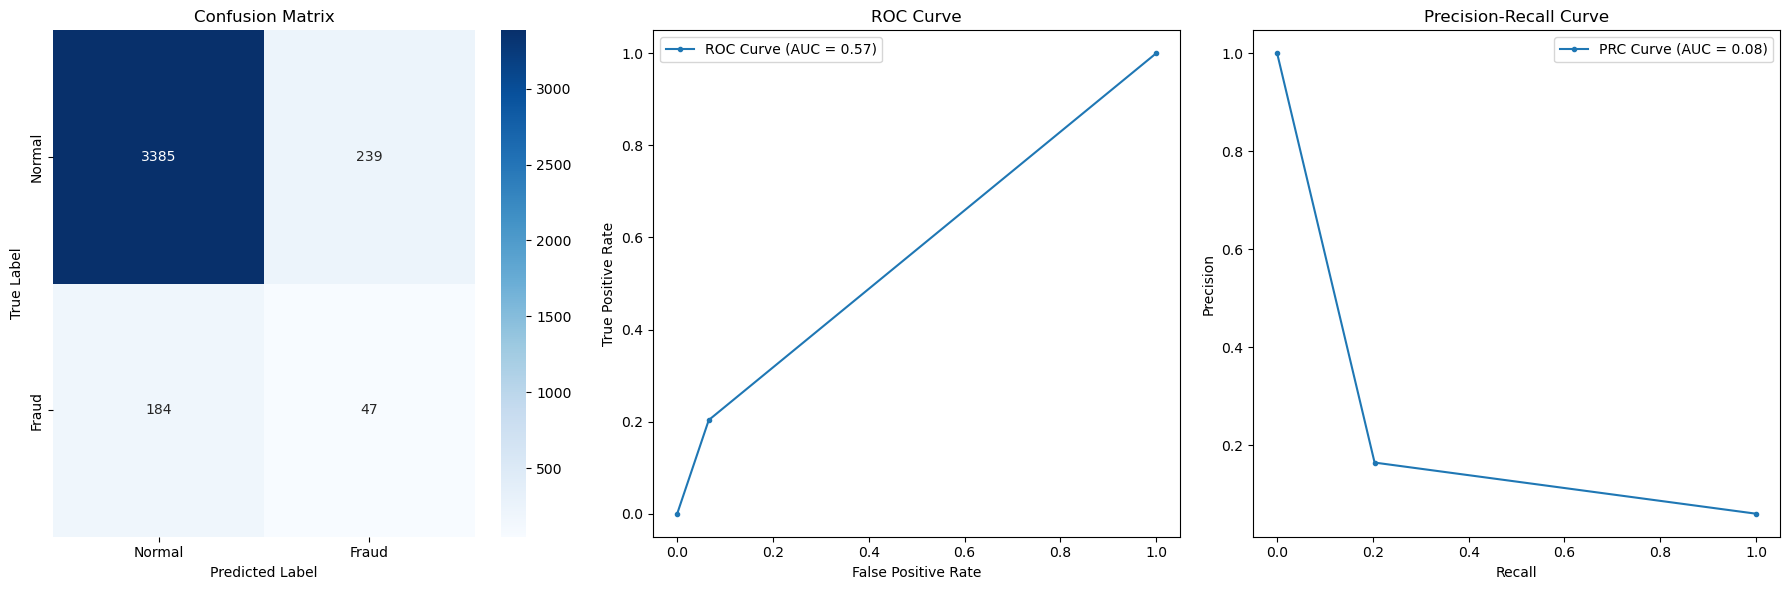

In [55]:
# Predict and evaluate the model
basic_dt_y_pred = basic_dt_model.predict(X_test)

basic_dt_metrics = calculate_metrics(y_test, basic_dt_y_pred)
basic_dt_metrics['Model'] = 'Decision Tree'

# Model should be the first column
basic_dt_metrics = basic_dt_metrics[['Model'] + [col for col in basic_dt_metrics.columns if col != 'Model']]

score_data = pd.concat([score_data, basic_dt_metrics], axis=0)
score_data

# Print classification report
print(classification_report(y_test, basic_dt_y_pred))

# Plot metrics
plot_metrics(y_test, basic_dt_y_pred)

### Logistic Regression

In [56]:
basic_log_reg = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=random_state)

basic_log_reg.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [57]:
basic_lgr_y_pred = basic_log_reg.predict(X_test)

basic_lgr_metrics = calculate_metrics(y_test, basic_lgr_y_pred)
basic_lgr_metrics['Model'] = 'Logistic Regression'
score_data = pd.concat([score_data, basic_lgr_metrics], axis=0)
score_data

Model  Accuracy  Precision    Recall        F1  Specificity  \
0        Decision Tree  0.890272   0.164336  0.203463  0.181818     0.934051   
0  Logistic Regression  0.606226   0.124343  0.922078  0.219136     0.586093   

   Balanced Accuracy       MAR       FAR    G-Mean       MCC   ROC-AUC  \
0           0.568757  0.796537  0.065949  0.435941  0.124535  0.568757   
0           0.754085  0.077922  0.413907  0.735135  0.242729  0.754085   

    PRC-AUC  
0  0.081166  
0  0.119323

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      3624
           1       0.12      0.92      0.22       231

    accuracy                           0.61      3855
   macro avg       0.56      0.75      0.48      3855
weighted avg       0.94      0.61      0.71      3855



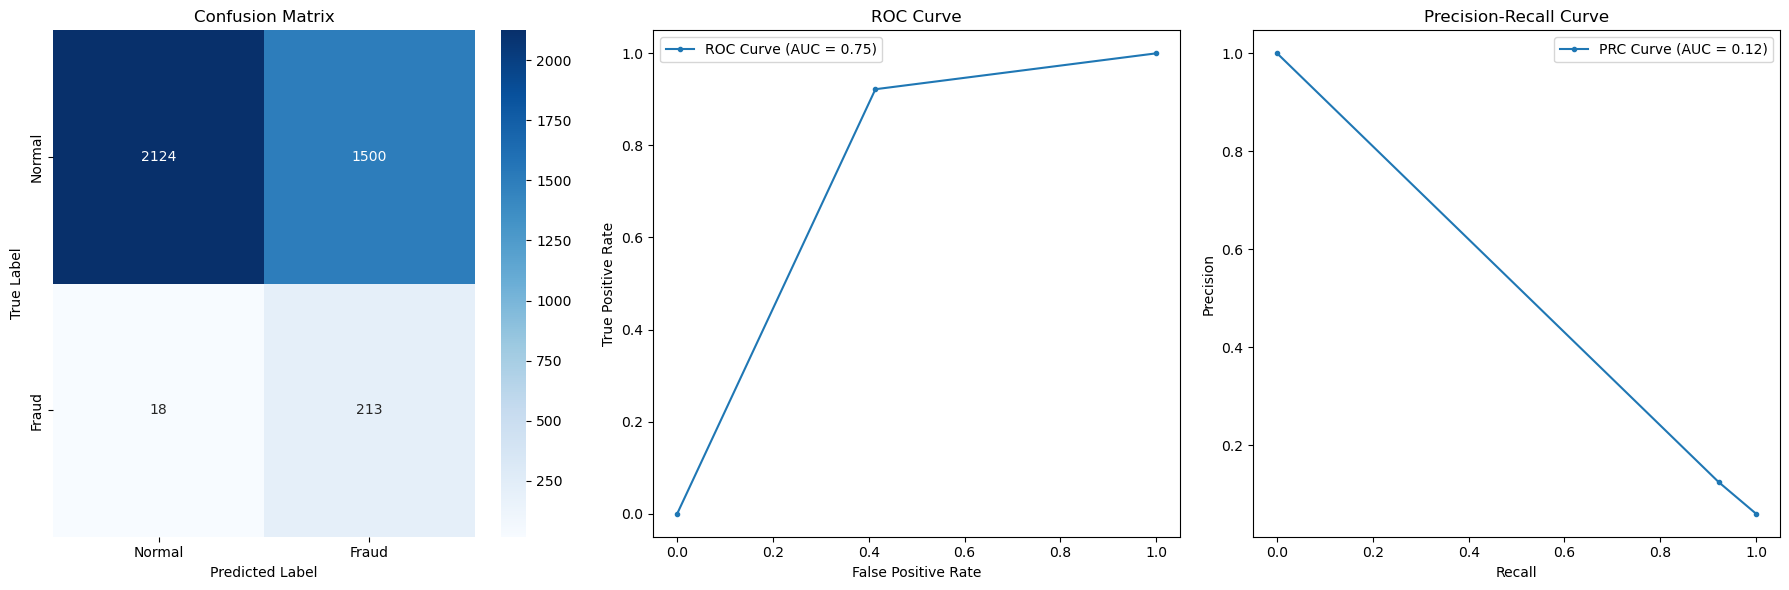

In [58]:
# Print classification report
print(classification_report(y_test, basic_lgr_y_pred))

# Plot metrics
plot_metrics(y_test, basic_lgr_y_pred)

### Naive Bayes

In [59]:
basic_gnb_model = GaussianNB()

basic_gnb_model.fit(X_train, y_train)

GaussianNB()

In [60]:
basic_gnb_y_pred = basic_gnb_model.predict(X_test)

# Evaluate the model
basic_gnb_metrics = calculate_metrics(y_test, basic_gnb_y_pred)
basic_gnb_metrics['Model'] = 'Gaussian Naive Bayes'
score_data = pd.concat([score_data, basic_gnb_metrics], axis=0)
score_data

Model  Accuracy  Precision    Recall        F1  Specificity  \
0         Decision Tree  0.890272   0.164336  0.203463  0.181818     0.934051   
0   Logistic Regression  0.606226   0.124343  0.922078  0.219136     0.586093   
0  Gaussian Naive Bayes  0.907134   0.073826  0.047619  0.057895     0.961921   

   Balanced Accuracy       MAR       FAR    G-Mean       MCC   ROC-AUC  \
0           0.568757  0.796537  0.065949  0.435941  0.124535  0.568757   
0           0.754085  0.077922  0.413907  0.735135  0.242729  0.754085   
0           0.504770  0.952381  0.038079  0.214023  0.011746  0.504770   

    PRC-AUC  
0  0.081166  
0  0.119323  
0  0.060584

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3624
           1       0.07      0.05      0.06       231

    accuracy                           0.91      3855
   macro avg       0.51      0.50      0.50      3855
weighted avg       0.89      0.91      0.90      3855



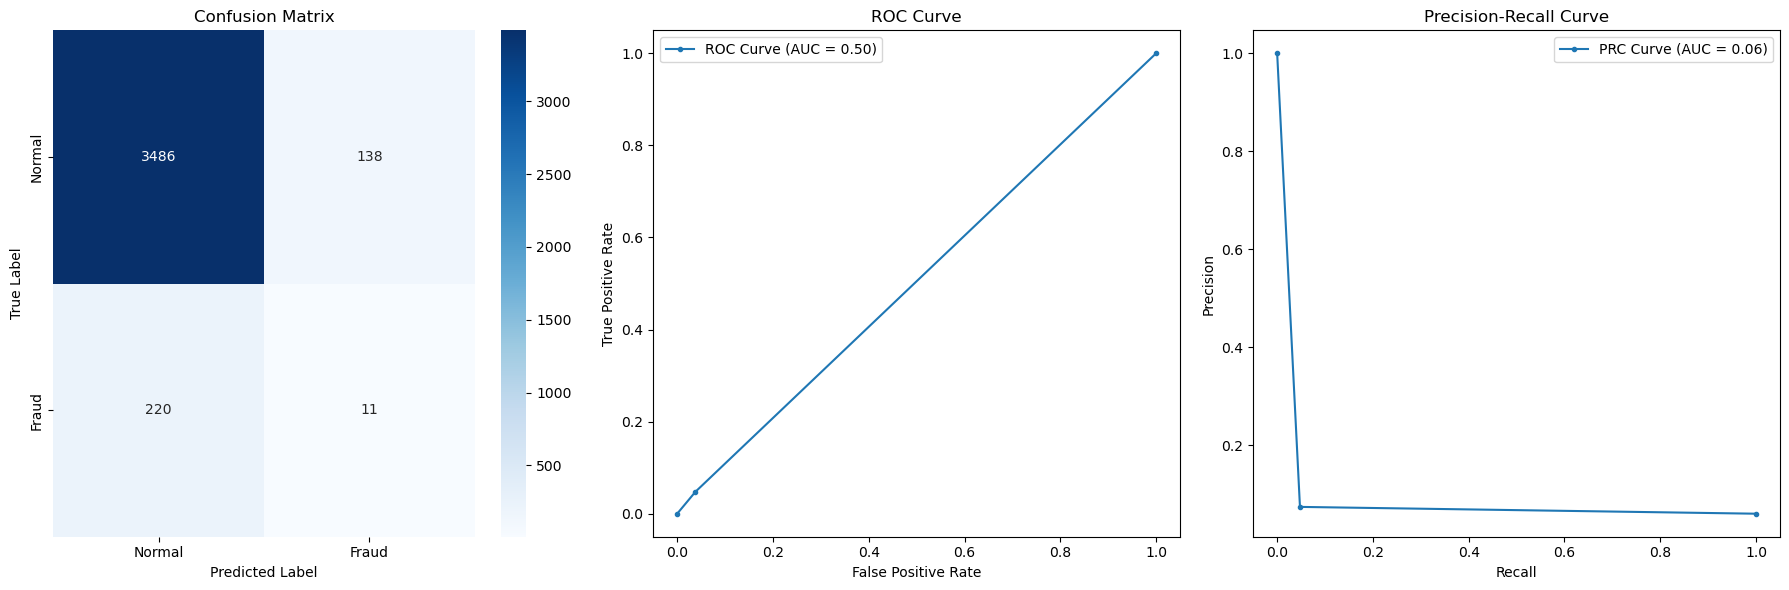

In [61]:
# Print classification report
print(classification_report(y_test, basic_gnb_y_pred))

# Plot metrics
plot_metrics(y_test, basic_gnb_y_pred)

### One Class SVM

In [62]:
# Define and fit the One-Class SVM model
basic_ocsvm = OneClassSVM()
basic_ocsvm.fit(X_train[y_train == 0])  # Train only on normal instances (normal is labeled as 0)

# Predict using the model
basic_ocsvm_y_pred = basic_ocsvm.predict(X_test)
# basic_ocsvm_y_pred_prob = basic_ocsvm.decision_function(X_test)

# Convert predictions to the original labels
basic_ocsvm_y_pred = np.where(basic_ocsvm_y_pred == -1, 1, 0)  # 0 is anomaly and 1 is normal

# Calculate metrics
basic_ocsvm_metrics = calculate_metrics(y_test, basic_ocsvm_y_pred)
basic_ocsvm_metrics['Model'] = 'One-Class SVM'
score_data = pd.concat([score_data, basic_ocsvm_metrics], axis=0)
score_data

Model  Accuracy  Precision    Recall        F1  Specificity  \
0         Decision Tree  0.890272   0.164336  0.203463  0.181818     0.934051   
0   Logistic Regression  0.606226   0.124343  0.922078  0.219136     0.586093   
0  Gaussian Naive Bayes  0.907134   0.073826  0.047619  0.057895     0.961921   
0         One-Class SVM  0.511543   0.068443  0.567100  0.122145     0.508002   

   Balanced Accuracy       MAR       FAR    G-Mean       MCC   ROC-AUC  \
0           0.568757  0.796537  0.065949  0.435941  0.124535  0.568757   
0           0.754085  0.077922  0.413907  0.735135  0.242729  0.754085   
0           0.504770  0.952381  0.038079  0.214023  0.011746  0.504770   
0           0.537551  0.432900  0.491998  0.536738  0.035651  0.537551   

    PRC-AUC  
0  0.081166  
0  0.119323  
0  0.060584  
0  0.064754

              precision    recall  f1-score   support

           0       0.95      0.51      0.66      3624
           1       0.07      0.57      0.12       231

    accuracy                           0.51      3855
   macro avg       0.51      0.54      0.39      3855
weighted avg       0.90      0.51      0.63      3855



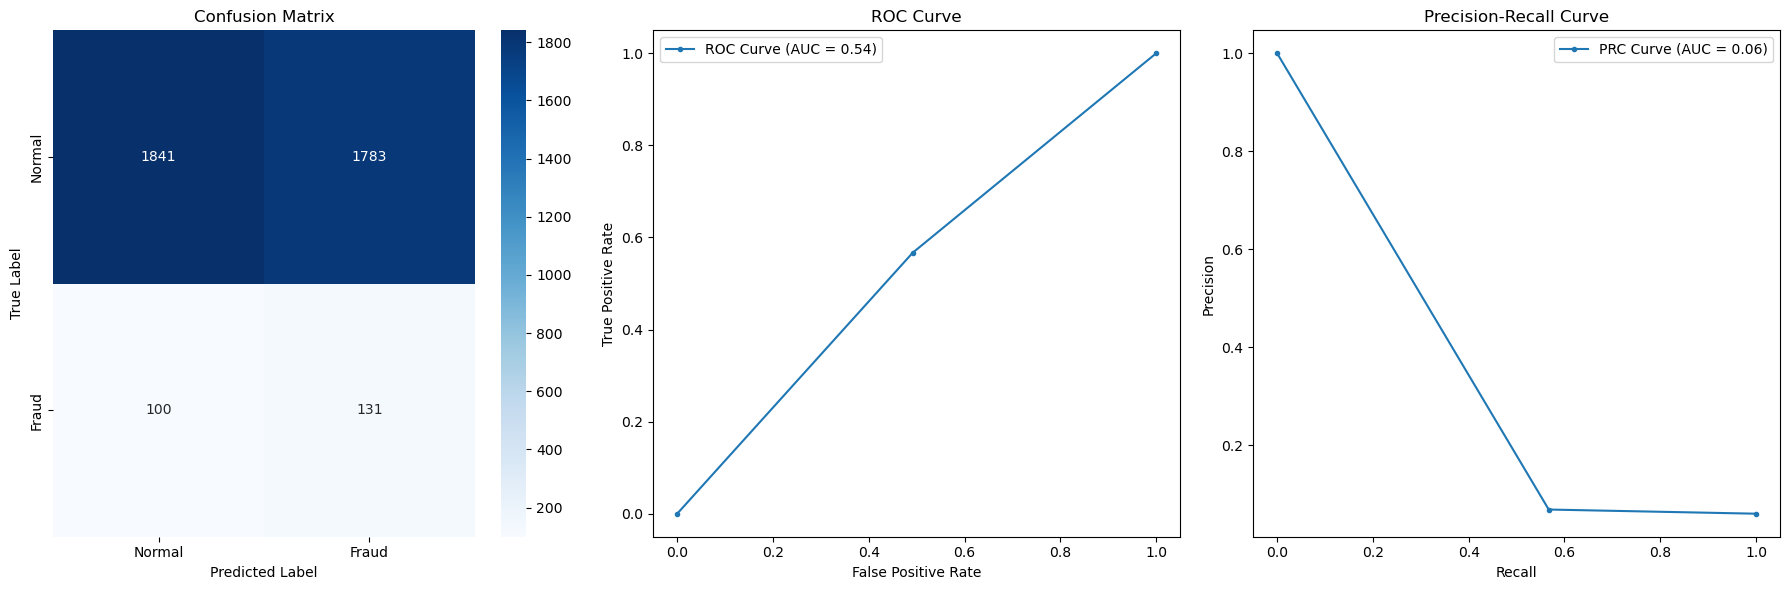

In [63]:
# Print classification report
print(classification_report(y_test, basic_ocsvm_y_pred))

# Plot metrics
plot_metrics(y_test, basic_ocsvm_y_pred)

### Isolation Forest

In [64]:
# Define and fit the Isolation Forest model
basic_iso_forest = IsolationForest(contamination=0.05, random_state=random_state)
basic_iso_forest.fit(X_train[y_train == 0])  # Train only on normal instances

# Predict using the model
basic_iso_forest_y_pred = basic_iso_forest.predict(X_test)

# Convert predictions to the original labels
basic_iso_forest_y_pred = np.where(basic_iso_forest_y_pred == -1, 1, 0)  # -1 for anomalies (fraud) and 1 for normal

# Calculate metrics
basic_iso_forest_metrics = calculate_metrics(y_test, basic_iso_forest_y_pred)
basic_iso_forest_metrics['Model'] = 'Isolation Forest'
score_data = pd.concat([score_data, basic_iso_forest_metrics], axis=0)
score_data

Model  Accuracy  Precision    Recall        F1  Specificity  \
0         Decision Tree  0.890272   0.164336  0.203463  0.181818     0.934051   
0   Logistic Regression  0.606226   0.124343  0.922078  0.219136     0.586093   
0  Gaussian Naive Bayes  0.907134   0.073826  0.047619  0.057895     0.961921   
0         One-Class SVM  0.511543   0.068443  0.567100  0.122145     0.508002   
0      Isolation Forest  0.897536   0.081633  0.069264  0.074941     0.950331   

   Balanced Accuracy       MAR       FAR    G-Mean       MCC   ROC-AUC  \
0           0.568757  0.796537  0.065949  0.435941  0.124535  0.568757   
0           0.754085  0.077922  0.413907  0.735135  0.242729  0.754085   
0           0.504770  0.952381  0.038079  0.214023  0.011746  0.504770   
0           0.537551  0.432900  0.491998  0.536738  0.035651  0.537551   
0           0.509798  0.930736  0.049669  0.256561  0.021171  0.509798   

    PRC-AUC  
0  0.081166  
0  0.119323  
0  0.060584  
0  0.064754  
0  0.061426

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3624
           1       0.08      0.07      0.07       231

    accuracy                           0.90      3855
   macro avg       0.51      0.51      0.51      3855
weighted avg       0.89      0.90      0.89      3855



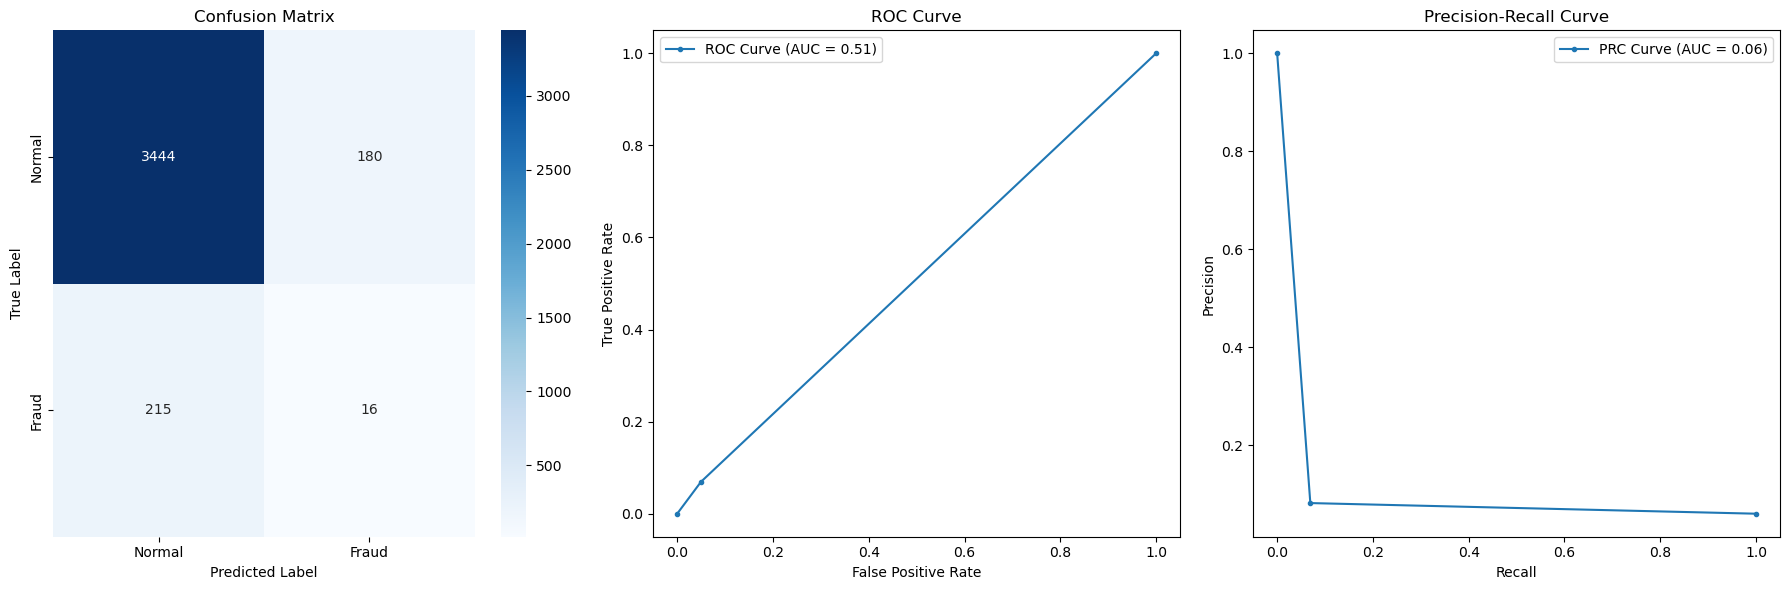

In [65]:
# Print classification report
print(classification_report(y_test, basic_iso_forest_y_pred))

# Plot metrics
plot_metrics(y_test, basic_iso_forest_y_pred)

### Insights after initial model training

**Confusion Matrices**

* All models are having difficulty detecting any fraud cases (true negatives)
* Decision Tree, Logistic Regression, and One-Class SVM were the models to correctly predict true negatives
* Logistic Regression and One-Class SVM predicted a significant number of false positives

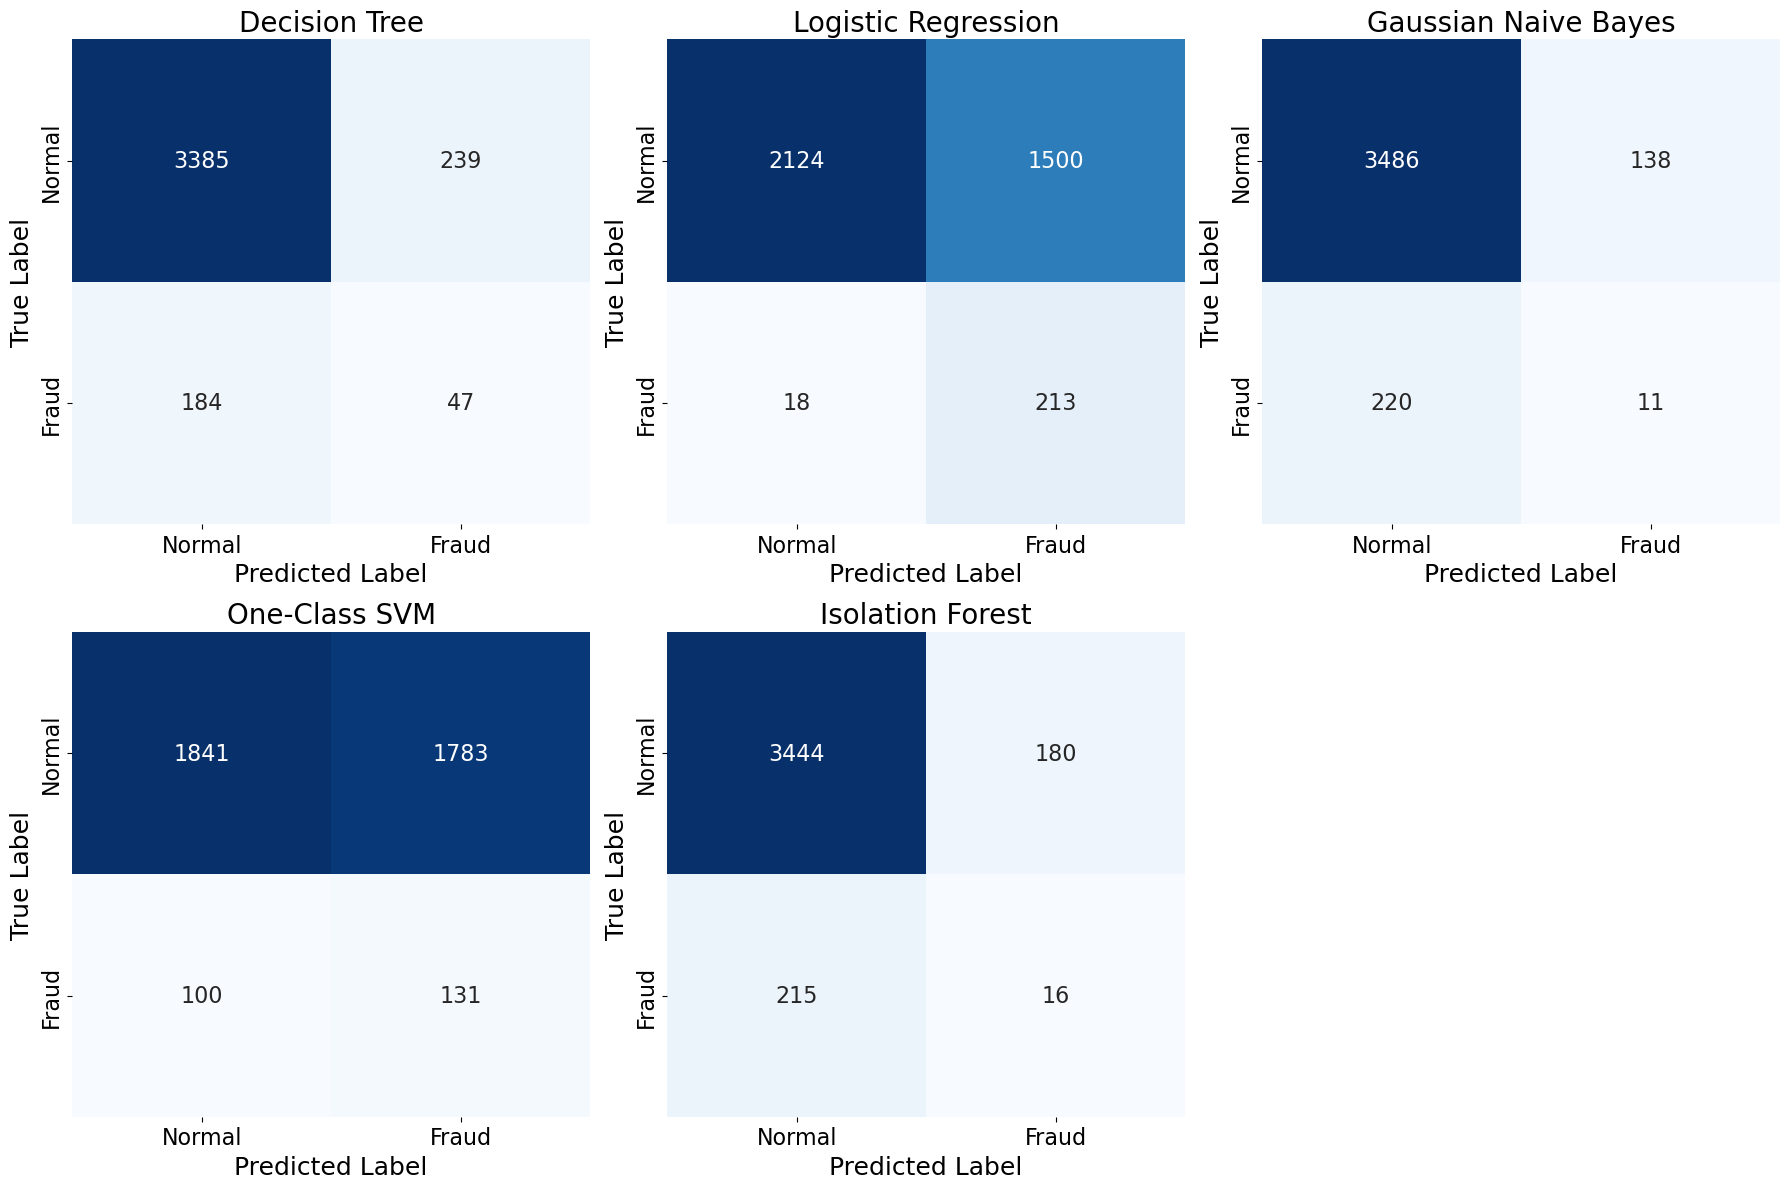

In [66]:
# View confusion matrices side by side

y_pred_list = [basic_dt_y_pred, basic_lgr_y_pred, basic_gnb_y_pred, basic_ocsvm_y_pred, basic_iso_forest_y_pred]
titles = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'One-Class SVM', 'Isolation Forest']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, y_pred in enumerate(y_pred_list):
    row, col = divmod(i, 3)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'], ax=axes[row, col], cbar=False, annot_kws={"size": 16})
    axes[row, col].set_xlabel('Predicted Label', fontsize=18)
    axes[row, col].set_ylabel('True Label', fontsize=18)
    axes[row, col].set_title(titles[i], fontsize=20)
    axes[row, col].tick_params(axis='both', which='major', labelsize=16)

# Remove the empty subplot (2, 3)
fig.delaxes(axes[1, 2])

# Add spacing between the subplots
plt.subplots_adjust(wspace=1, hspace=1)

plt.tight_layout()
plt.show()

**Comparing Performance Metrics**

* Based on the results of the confusion matrices earlier, it appears accuracy is a misleading metric in this situation. Accuracy scores are high despite the models not being able to correctly predict true negatives
* Decision Tree, Logistic Regression, and One-Class SVM have the highest F1 scores among the models
* Logistic Regression and One-Class SVM exhibit high recall but low precision scores

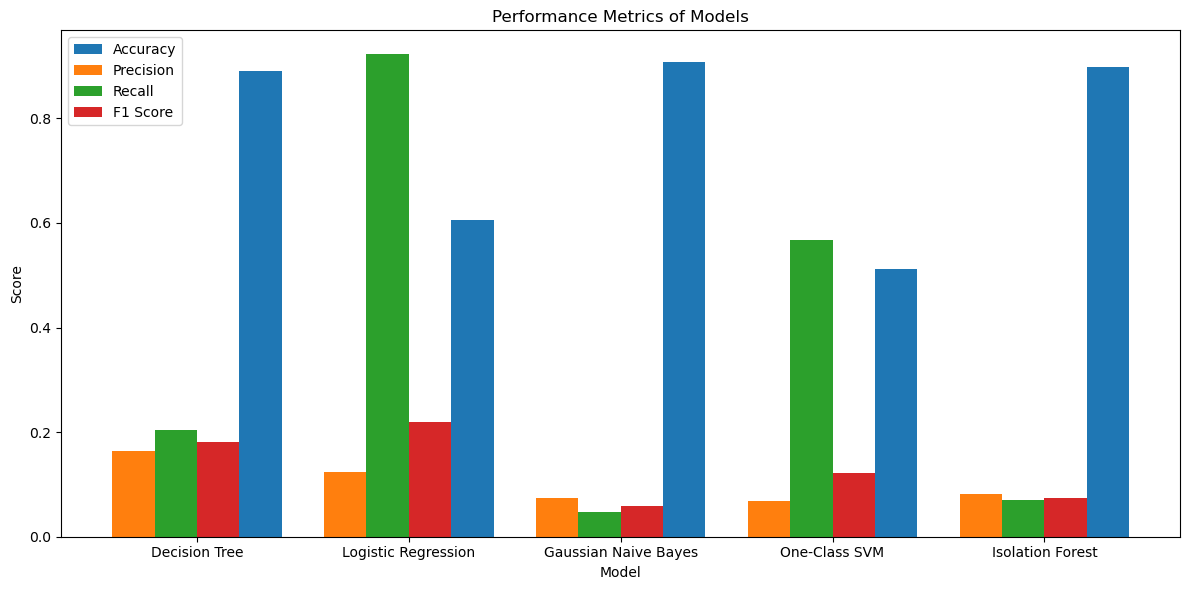

In [67]:
# Set the positions and width for the bars
bar_width = 0.2
bar_positions = list(range(len(score_data)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each metric
ax.bar([p + bar_width * 3 for p in bar_positions], score_data['Accuracy'], width=bar_width, label='Accuracy')
ax.bar([p + bar_width * 0 for p in bar_positions], score_data['Precision'], width=bar_width, label='Precision')
ax.bar([p + bar_width * 1 for p in bar_positions], score_data['Recall'], width=bar_width, label='Recall')
ax.bar([p + bar_width * 2 for p in bar_positions], score_data['F1'], width=bar_width, label='F1 Score')

# Set the labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Models')
ax.set_xticks([p + 1.5 * bar_width for p in bar_positions])
ax.set_xticklabels(score_data['Model'])

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

**Investigating Balanced Accuracy**

Since we have discovered that accuracy is a misleading metric, we looked into balanced accuracy as an alternative.

* Balanced accuracy is lower for Decision Tree, GNB, and Isolation Forest  
* Balanced accuracy is slightly higher for Logistic Regression and One-Class SVM, which earlier exhibits higher recall at the expense of precision


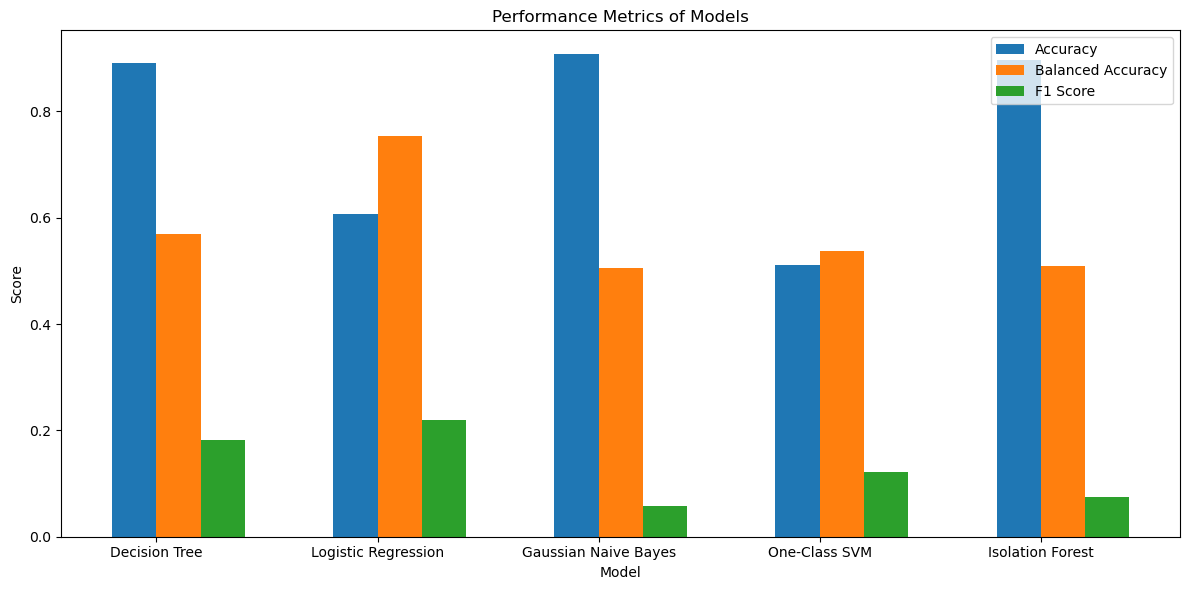

In [68]:
# Set the positions and width for the bars
bar_width = 0.2
bar_positions = list(range(len(score_data)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each metric
ax.bar([p + bar_width * 1 for p in bar_positions], score_data['Accuracy'], width=bar_width, label='Accuracy')
ax.bar([p + bar_width * 2 for p in bar_positions], score_data['Balanced Accuracy'], width=bar_width, label='Balanced Accuracy')
ax.bar([p + bar_width * 3 for p in bar_positions], score_data['F1'], width=bar_width, label='F1 Score')

# Set the labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Models')
ax.set_xticks([p + 1.5 * bar_width for p in bar_positions])
ax.set_xticklabels(score_data['Model'])

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

**Why our models are behaving this way**

* Class imbalance seems to be a major problem causing the models to not perform well
* Logistic regression appears to perform the best in terms of F1 score and Balanced Accuracy. This may be because it is one of the models that are less sensitive to class imbalance.
* Isolation Forest performance was a surprise as it was believed that to another less sensitive model. The group will proceed with Decision Tree instead with these initial findings

We decide to refine the following models: Decision Tree, Logistic Regression, and One-Class SVM

## Feature Selection and Hyperparameter Tuning
We had trouble improving the performance of our models, so we looked back to our related literature and EDA, data preprocessing techniques and figured out what we were missing. Essentially, most fraud datasets are highly imbalanced. Our solution was to increase samples for fraudulent cases with Synthetic Minority Oversampling Technique (SMOTE) to balance our dataset. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space (Brownlee, 2021).

In [69]:
sm = SMOTE(random_state=random_state)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)

We compare the distribution of fraud before and after SMOTE. We can see that the resampled dataset is much more balanced.

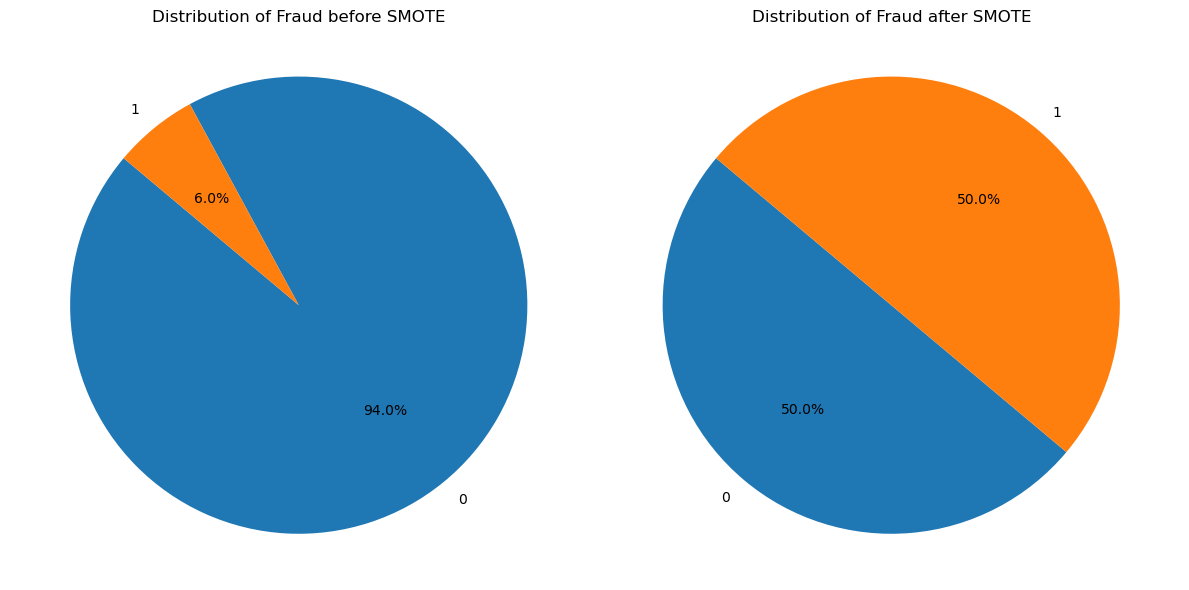

In [70]:
# Calculate the value counts for y_train and y_train_res
category_counts_y_train = y_train.value_counts()
category_counts_y_train_res = y_train_res.value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for y_train
axes[0].pie(category_counts_y_train, labels=category_counts_y_train.index, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Distribution of Fraud before SMOTE')

# Plot for y_train_res
axes[1].pie(category_counts_y_train_res, labels=category_counts_y_train_res.index, autopct='%1.1f%%', startangle=140)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Distribution of Fraud after SMOTE')

# Display the plots
plt.tight_layout()
plt.show()

Now let's begin hyperparameter tuning using Grid Search.

### Decision Trees

In [71]:
# Initialize RFE with the Decision Tree model
rfe = RFE(estimator=DecisionTreeClassifier(random_state=random_state), n_features_to_select=15)

# Fit RFE
rfe.fit(X_train_res, y_train_res)

# Get selected features
selected_features = X_train_res.columns[rfe.support_]

# Update training and test sets with selected features
X_train_rfe = rfe.transform(X_train_res)
X_test_rfe = rfe.transform(X_test_res)

In [72]:
# Define the parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV with the Decision Tree model and the parameter grid
tuned_dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_state), param_grid=dt_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit GridSearchCV
tuned_dt_grid_search.fit(X_train_rfe, y_train_res)

# Get the best parameters
tuned_dt_best_params = tuned_dt_grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [92]:
# Print best params and best score
print(f'Best Parameters: {tuned_dt_best_params}')
print(f'Best Score: {tuned_dt_grid_search.best_score_}')

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9192464670833187


In [73]:
# Initialize the Decision Tree model with the best parameters
best_decision_tree_model = DecisionTreeClassifier(random_state=random_state, **tuned_dt_best_params)

# Train the model
best_decision_tree_model.fit(X_train_res, y_train_res)

# Predict on the test set
dt_y_pred_best = best_decision_tree_model.predict(X_test_res)

# Evaluate the model
dt_metrics_best = calculate_metrics(y_test_res, dt_y_pred_best)
dt_metrics_best['Model'] = 'Decision Tree (Tuned)'
score_data = pd.concat([score_data, dt_metrics_best], axis=0)
score_data

Model  Accuracy  Precision    Recall        F1  \
0          Decision Tree  0.890272   0.164336  0.203463  0.181818   
0    Logistic Regression  0.606226   0.124343  0.922078  0.219136   
0   Gaussian Naive Bayes  0.907134   0.073826  0.047619  0.057895   
0          One-Class SVM  0.511543   0.068443  0.567100  0.122145   
0       Isolation Forest  0.897536   0.081633  0.069264  0.074941   
0  Decision Tree (Tuned)  0.866860   0.915339  0.808499  0.858608   

   Specificity  Balanced Accuracy       MAR       FAR    G-Mean       MCC  \
0     0.934051           0.568757  0.796537  0.065949  0.435941  0.124535   
0     0.586093           0.754085  0.077922  0.413907  0.735135  0.242729   
0     0.961921           0.504770  0.952381  0.038079  0.214023  0.011746   
0     0.508002           0.537551  0.432900  0.491998  0.536738  0.035651   
0     0.950331           0.509798  0.930736  0.049669  0.256561  0.021171   
0     0.925221           0.866860  0.191501  0.074779  0.864893  0.738769   

    ROC-AUC   PRC-AUC  
0  0.568757  0.081166  
0  0.754085  0.119323  
0  0.504770  0.060584  
0  0.537551  0.064754  
0  0.509798  0.061426  
0  0.866860  0.835801

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3624
           1       0.92      0.81      0.86      3624

    accuracy                           0.87      7248
   macro avg       0.87      0.87      0.87      7248
weighted avg       0.87      0.87      0.87      7248



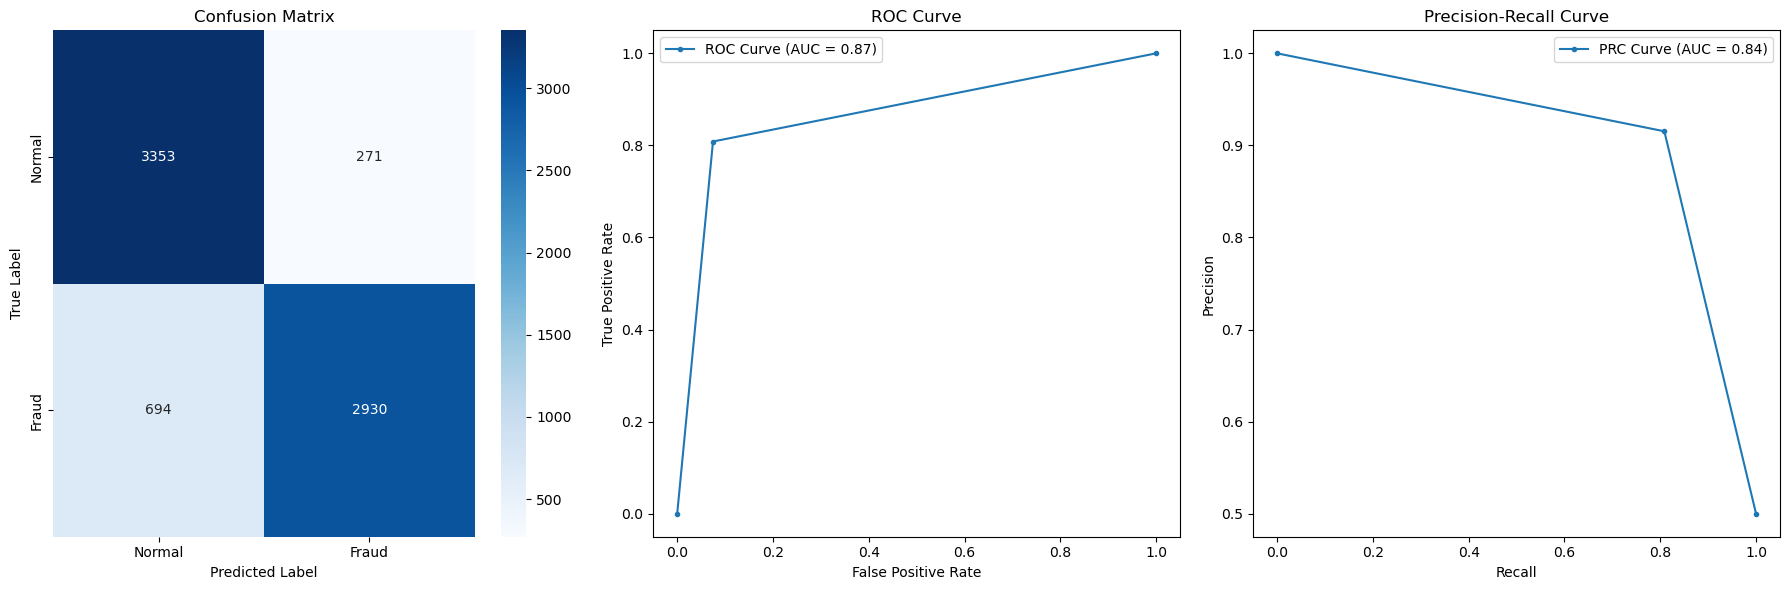

In [74]:
# Print classification report
print(classification_report(y_test_res, dt_y_pred_best))

# Plot metrics
plot_metrics(y_test_res, dt_y_pred_best)

### Logistic Regression

In [75]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000],
    'class_weight': ['balanced', None]
}

lr_grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', verbose=3, n_jobs=-1)
lr_grid_search.fit(X_train_res, y_train_res)

lr_best_params = lr_grid_search.best_params_
lr_best_score = lr_grid_search.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [76]:
print("Best parameters found:", lr_best_params)
print("Best Cross-validation Score:", lr_best_score)

Best parameters found: {'C': 10, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.9324675458009732


In [77]:
# Use the best model from grid search
lr_best_model = lr_grid_search.best_estimator_

# Predict on test data
lr_optimized_pred = lr_best_model.predict(X_test_res)

In [78]:
# Append the metrics to the score_data DataFrame
optimized_log_reg_metrics = calculate_metrics(y_test_res, lr_optimized_pred)
optimized_log_reg_metrics['Model'] = 'Logistic Regression (Tuned)'
score_data = pd.concat([score_data, optimized_log_reg_metrics], axis=0)
score_data

Model  Accuracy  Precision    Recall        F1  \
0                Decision Tree  0.890272   0.164336  0.203463  0.181818   
0          Logistic Regression  0.606226   0.124343  0.922078  0.219136   
0         Gaussian Naive Bayes  0.907134   0.073826  0.047619  0.057895   
0                One-Class SVM  0.511543   0.068443  0.567100  0.122145   
0             Isolation Forest  0.897536   0.081633  0.069264  0.074941   
0        Decision Tree (Tuned)  0.866860   0.915339  0.808499  0.858608   
0  Logistic Regression (Tuned)  0.927428   0.973122  0.879139  0.923746   

   Specificity  Balanced Accuracy       MAR       FAR    G-Mean       MCC  \
0     0.934051           0.568757  0.796537  0.065949  0.435941  0.124535   
0     0.586093           0.754085  0.077922  0.413907  0.735135  0.242729   
0     0.961921           0.504770  0.952381  0.038079  0.214023  0.011746   
0     0.508002           0.537551  0.432900  0.491998  0.536738  0.035651   
0     0.950331           0.509798  0.930736  0.049669  0.256561  0.021171   
0     0.925221           0.866860  0.191501  0.074779  0.864893  0.738769   
0     0.975717           0.927428  0.120861  0.024283  0.926170  0.858871   

    ROC-AUC   PRC-AUC  
0  0.568757  0.081166  
0  0.754085  0.119323  
0  0.504770  0.060584  
0  0.537551  0.064754  
0  0.509798  0.061426  
0  0.866860  0.835801  
0  0.927428  0.915940

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3624
           1       0.97      0.88      0.92      3624

    accuracy                           0.93      7248
   macro avg       0.93      0.93      0.93      7248
weighted avg       0.93      0.93      0.93      7248



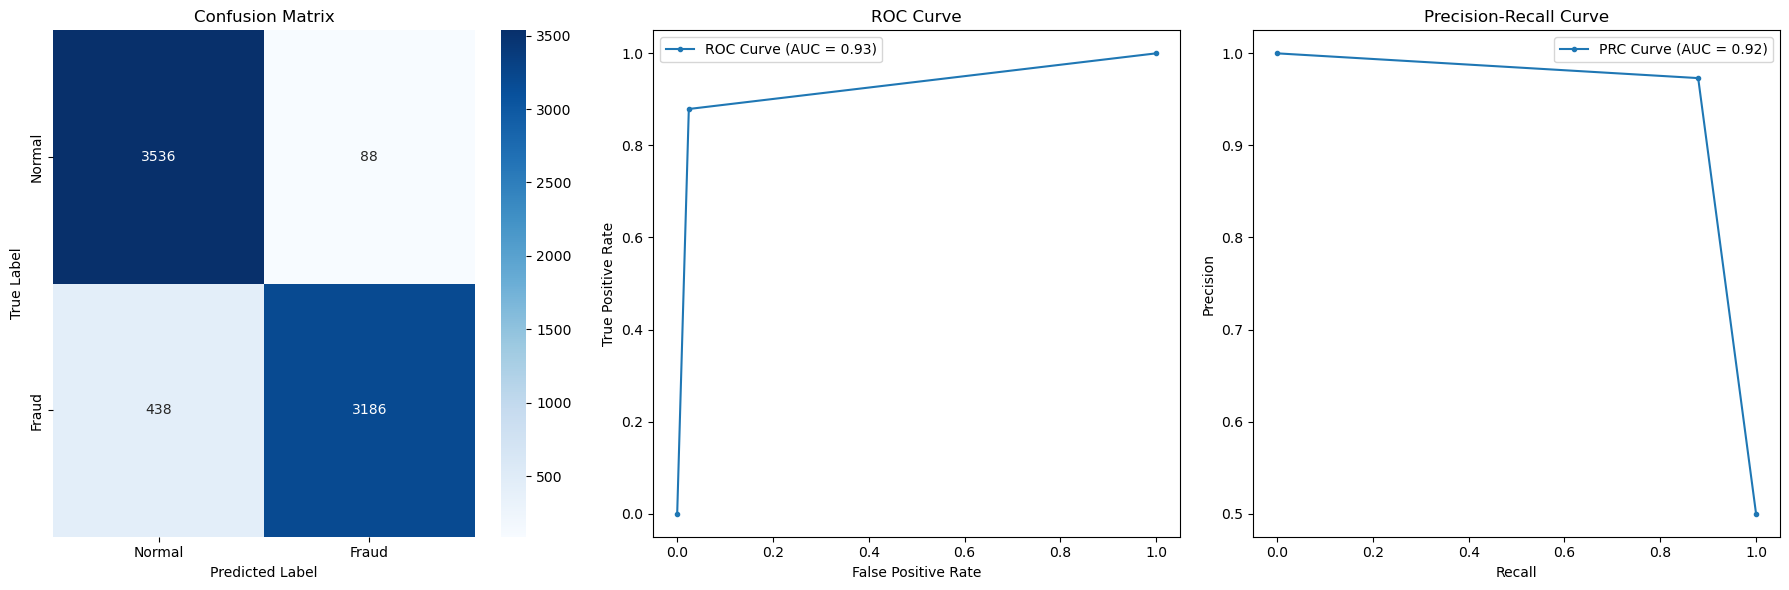

In [79]:
# Print classification report
print(classification_report(y_test_res, lr_optimized_pred))

# Plot metrics
plot_metrics(y_test_res, lr_optimized_pred)

### One Class SVM

In [80]:
# Define the OneClassSVM model
ocsvm = OneClassSVM(max_iter=1000)

ocsvm_param_grid = {
    'kernel': ['linear'],  # Kernel types to test
    'nu': [0.1, 0.5, 0.9],  # Fraction of outliers
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Set up GridSearchCV
ocsvm_grid_search = GridSearchCV(
    estimator=ocsvm,
    param_grid=ocsvm_param_grid,
    scoring='f1',  # Adjust scoring as needed
    cv=5,  # Cross-validation splits
    verbose=1,  # Verbosity
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
ocsvm_grid_search.fit(X_train_res)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan]
Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


GridSearchCV(cv=5, estimator=OneClassSVM(max_iter=1000), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'], 'kernel': ['linear'],
                         'nu': [0.1, 0.5, 0.9]},
             scoring='f1', verbose=1)

In [81]:
# Print best parameters and score
print("Best parameters found: ", ocsvm_grid_search.best_params_)
print("Best score found: ", ocsvm_grid_search.best_score_)

# Predict using the best model
ocsvm_best_model = ocsvm_grid_search.best_estimator_
ocsvm_y_pred = ocsvm_best_model.predict(X_test_res)
ocsvm_y_pred_prob = ocsvm_best_model.decision_function(X_test_res)

# Convert predictions to the original labels
ocsvm_y_pred = np.where(ocsvm_y_pred == -1, 1, 0)  # Assuming -1 is anomaly and 1 is normal

# Calculate metrics
ocsvm_metrics = calculate_metrics(y_test_res, ocsvm_y_pred)
ocsvm_metrics['Model'] = 'One-Class SVM - Tuned'
score_data = pd.concat([score_data, ocsvm_metrics], axis=0)
score_data

Best parameters found:  {'gamma': 'scale', 'kernel': 'linear', 'nu': 0.1}
Best score found:  nan


Model  Accuracy  Precision    Recall        F1  \
0                Decision Tree  0.890272   0.164336  0.203463  0.181818   
0          Logistic Regression  0.606226   0.124343  0.922078  0.219136   
0         Gaussian Naive Bayes  0.907134   0.073826  0.047619  0.057895   
0                One-Class SVM  0.511543   0.068443  0.567100  0.122145   
0             Isolation Forest  0.897536   0.081633  0.069264  0.074941   
0        Decision Tree (Tuned)  0.866860   0.915339  0.808499  0.858608   
0  Logistic Regression (Tuned)  0.927428   0.973122  0.879139  0.923746   
0        One-Class SVM - Tuned  0.524007   0.716418  0.079470  0.143070   

   Specificity  Balanced Accuracy       MAR       FAR    G-Mean       MCC  \
0     0.934051           0.568757  0.796537  0.065949  0.435941  0.124535   
0     0.586093           0.754085  0.077922  0.413907  0.735135  0.242729   
0     0.961921           0.504770  0.952381  0.038079  0.214023  0.011746   
0     0.508002           0.537551  0.432900  0.491998  0.536738  0.035651   
0     0.950331           0.509798  0.930736  0.049669  0.256561  0.021171   
0     0.925221           0.866860  0.191501  0.074779  0.864893  0.738769   
0     0.975717           0.927428  0.120861  0.024283  0.926170  0.858871   
0     0.968543           0.524007  0.920530  0.031457  0.277435  0.104886   

    ROC-AUC   PRC-AUC  
0  0.568757  0.081166  
0  0.754085  0.119323  
0  0.504770  0.060584  
0  0.537551  0.064754  
0  0.509798  0.061426  
0  0.866860  0.835801  
0  0.927428  0.915940  
0  0.524007  0.517199

              precision    recall  f1-score   support

           0       0.51      0.97      0.67      3624
           1       0.72      0.08      0.14      3624

    accuracy                           0.52      7248
   macro avg       0.61      0.52      0.41      7248
weighted avg       0.61      0.52      0.41      7248



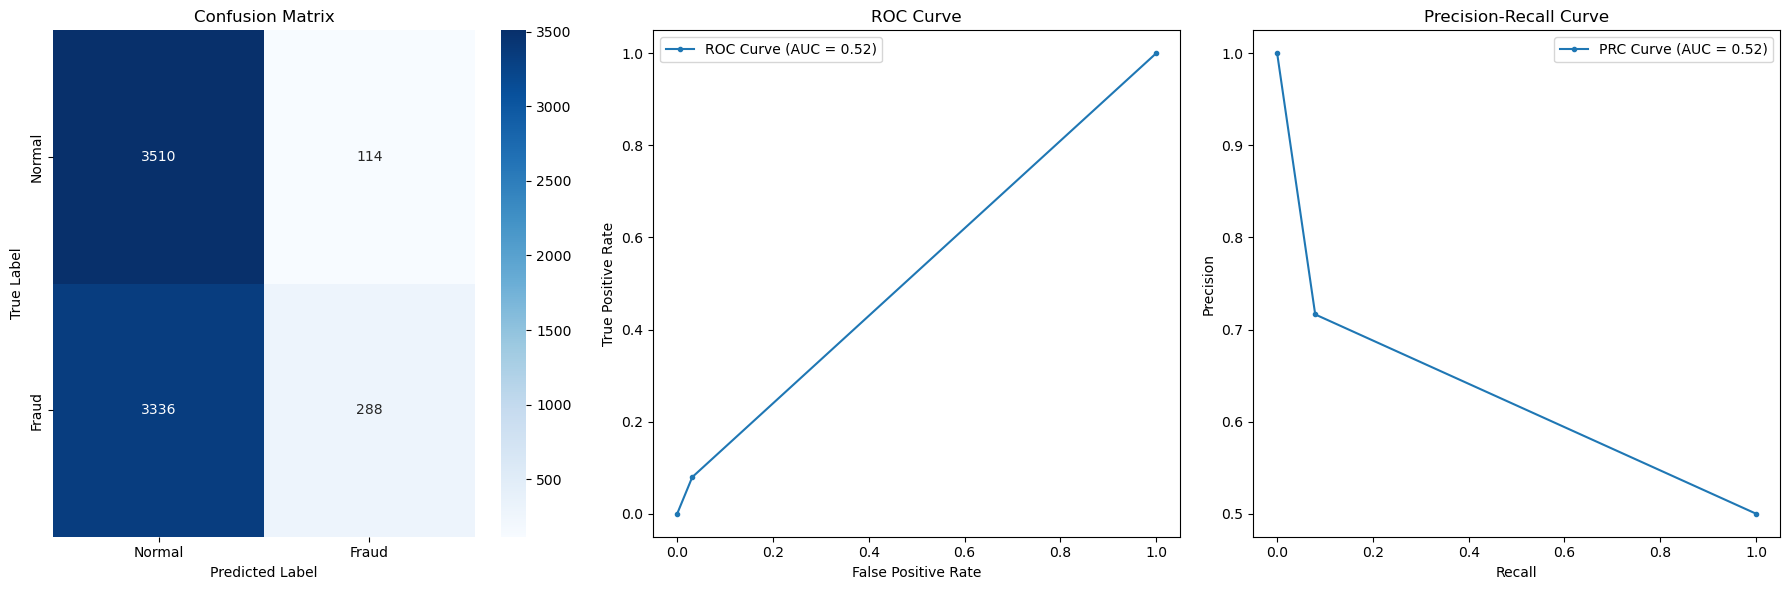

In [82]:
# Print classification report
print(classification_report(y_test_res, ocsvm_y_pred))

# Plot metrics
plot_metrics(y_test_res, ocsvm_y_pred)

#### Insights after SMOTE & Hyperparameter Tuning

**Confusion Matrices**

* Decision Tree and Logistic Regression have improved performance identifying true positives and true negatives
* We can confirm that class imbalance is the issue regarding these models' poor performance
* One-Class SVM is still performing poorly. However, compared to its initial model, it is now predicting more false positives as compared to predicting more true negatives earlier.
* Since One-Class SVM is an unsupervised learning algorithm, it is possible that implementing SMOTE caused this tradeoff.
* Also, it is also likely that there is still some noise in the data and the two classes (normal and fraud) are not yet well represented. Further optimization of the features such as feature selection and engineering can be further implemented to help with this case.

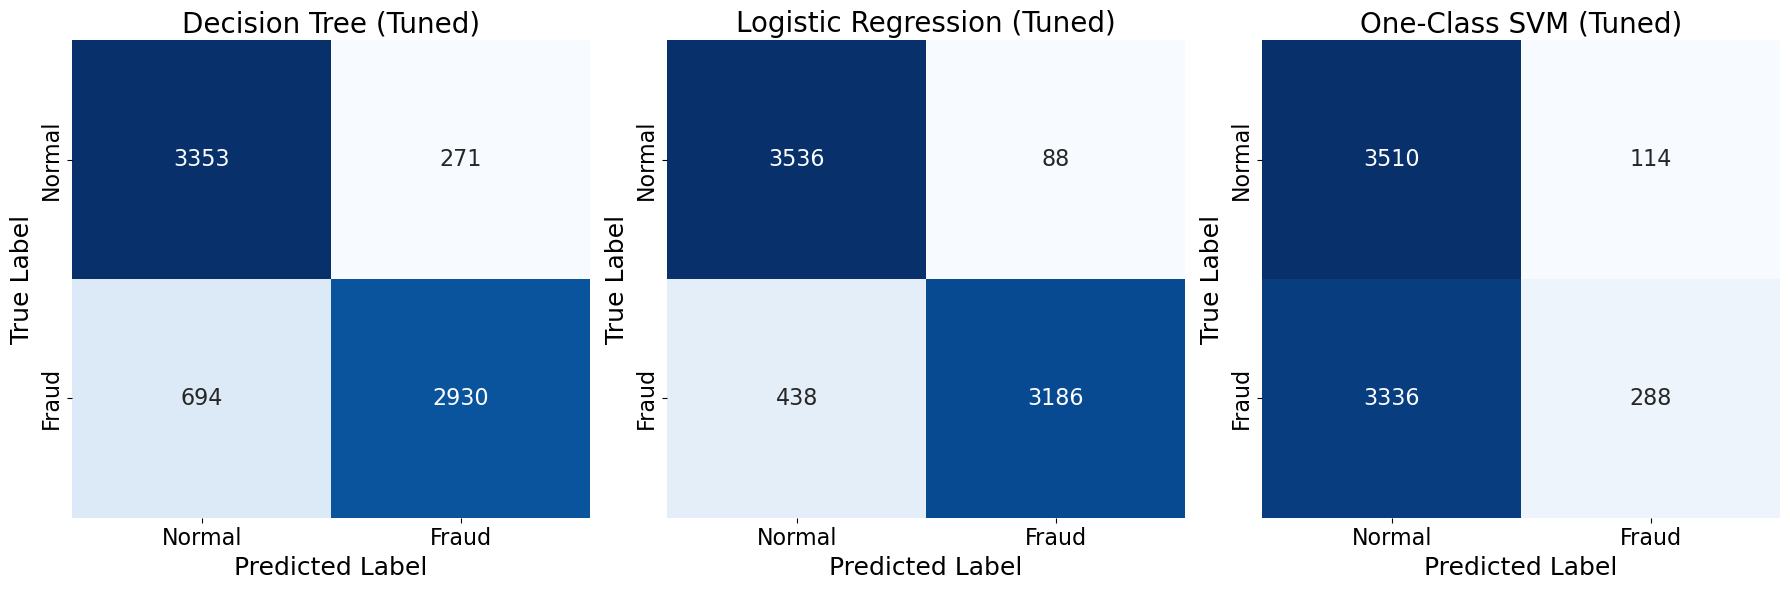

In [83]:
# Compare confusion matrices side by side

y_pred_list = [dt_y_pred_best, lr_optimized_pred, ocsvm_y_pred]
titles = ['Decision Tree (Tuned)', 'Logistic Regression (Tuned)', 'One-Class SVM (Tuned)']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, y_pred in enumerate(y_pred_list):
    conf_matrix = confusion_matrix(y_test_res, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'], ax=axes[i], cbar=False, annot_kws={"size": 16})
    axes[i].set_xlabel('Predicted Label', fontsize=18)
    axes[i].set_ylabel('True Label', fontsize=18)
    axes[i].set_title(titles[i], fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=16)

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=3)

plt.tight_layout()
plt.show()

**Comparing performance metrics**

* We can see that F1 Score greatly increased for Decision Trees and Logistic Regression
* There appears to be less tradeoff between precision and recall for these models
* As confirmed earlier, One-Class SVM has little to no improvement in performance. This time it has higher precision while earlier it had higher recall.

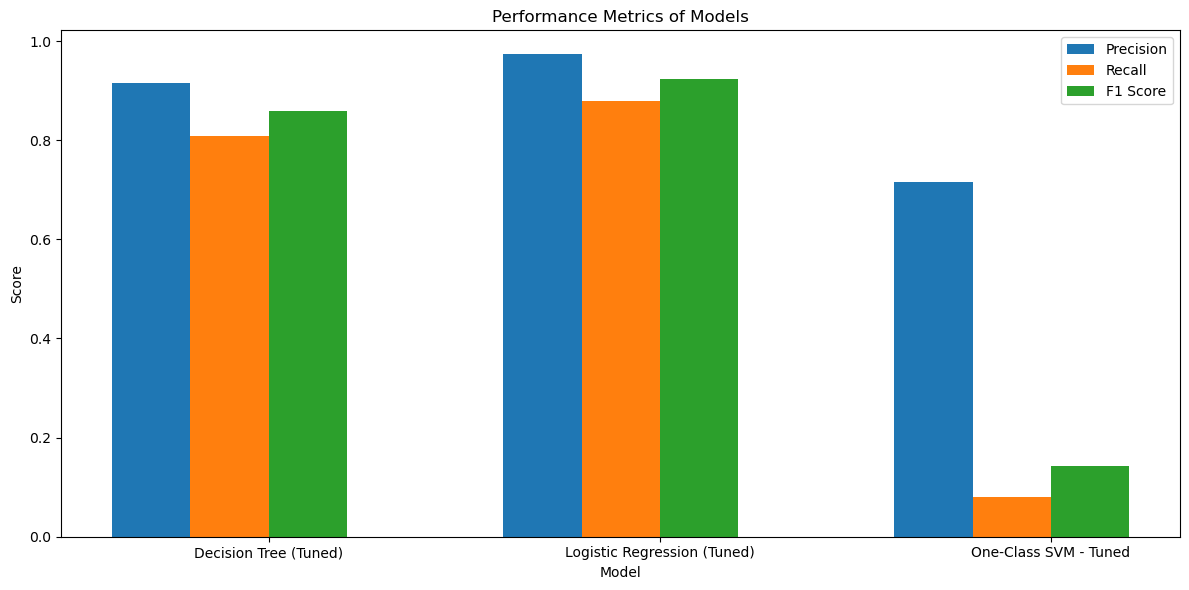

In [84]:
# Filter score_data to show only tuned models (index 5 to 7)
tuned_score_data = score_data.iloc[5:8]

# Set the positions and width for the bars
bar_width = 0.2
bar_positions = list(range(len(tuned_score_data)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each metric
ax.bar([p + bar_width * 0 for p in bar_positions], tuned_score_data['Precision'], width=bar_width, label='Precision')
ax.bar([p + bar_width * 1 for p in bar_positions], tuned_score_data['Recall'], width=bar_width, label='Recall')
ax.bar([p + bar_width * 2 for p in bar_positions], tuned_score_data['F1'], width=bar_width, label='F1 Score')

# Set the labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Models')
ax.set_xticks([p + 1.5 * bar_width for p in bar_positions])
ax.set_xticklabels(tuned_score_data['Model'])

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

**Checking Balanced Accuracy** 

* It appears that there are slight improvements to Balanced Accuracy compared to the initial models.
* Balanced Accuracy and F1 score seem closely aligned now for Decision Trees and Logistic Regression compared to earlier.
* However in the case of One Class SVM, there is a wide discrepancy between balanced accuracy and F1. This is a case that can be further investigated.

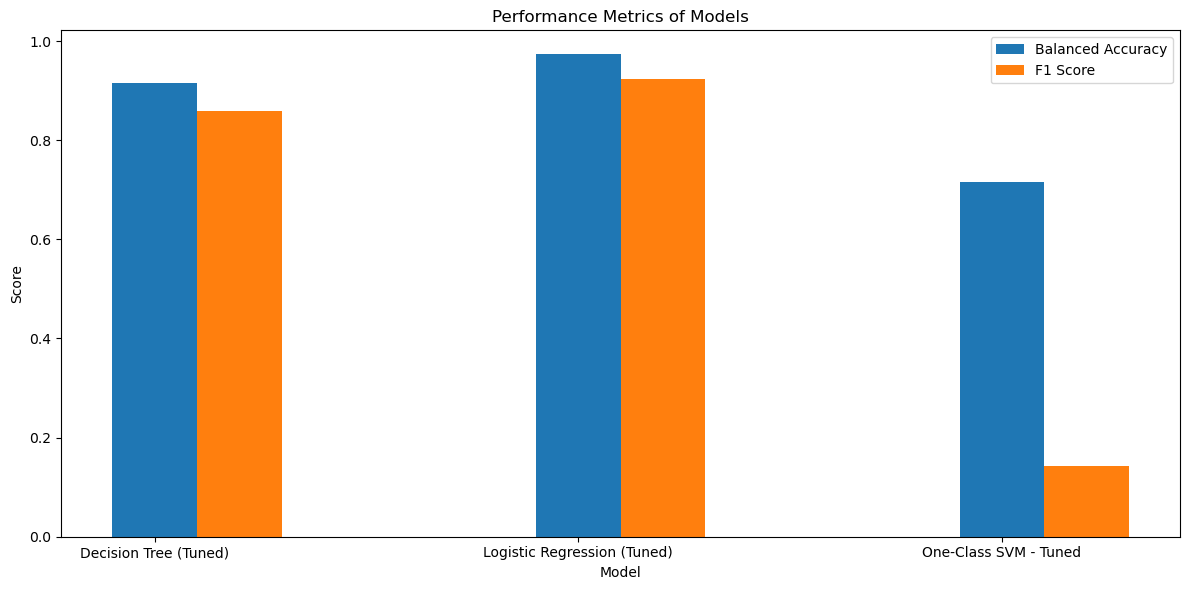

In [85]:
# Set the positions and width for the bars
bar_width = 0.2
bar_positions = list(range(len(tuned_score_data)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each metric
ax.bar([p + bar_width * 0 for p in bar_positions], tuned_score_data['Precision'], width=bar_width, label='Balanced Accuracy')
ax.bar([p + bar_width * 1 for p in bar_positions], tuned_score_data['F1'], width=bar_width, label='F1 Score')

# Set the labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Models')
ax.set_xticks([p + 0 * bar_width for p in bar_positions])
ax.set_xticklabels(tuned_score_data['Model'])

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Summary of Model Training

We conclude that our best performing model for fraud detection is Logistic Regression with the following GridSearch parameters: 

In [86]:
# Best parameters of logistic regression model after GridSearchCV
lr_best_params_df = pd.DataFrame(lr_best_params, index=['Value'])
lr_best_params_df

C class_weight  max_iter penalty     solver
Value  10     balanced      2000      l1  liblinear

In [87]:
# Scores of the best logistic regression model
score_data.iloc[6]

Model                Logistic Regression (Tuned)
Accuracy                                0.927428
Precision                               0.973122
Recall                                  0.879139
F1                                      0.923746
Specificity                             0.975717
Balanced Accuracy                       0.927428
MAR                                     0.120861
FAR                                     0.024283
G-Mean                                   0.92617
MCC                                     0.858871
ROC-AUC                                 0.927428
PRC-AUC                                  0.91594
Name: 0, dtype: object

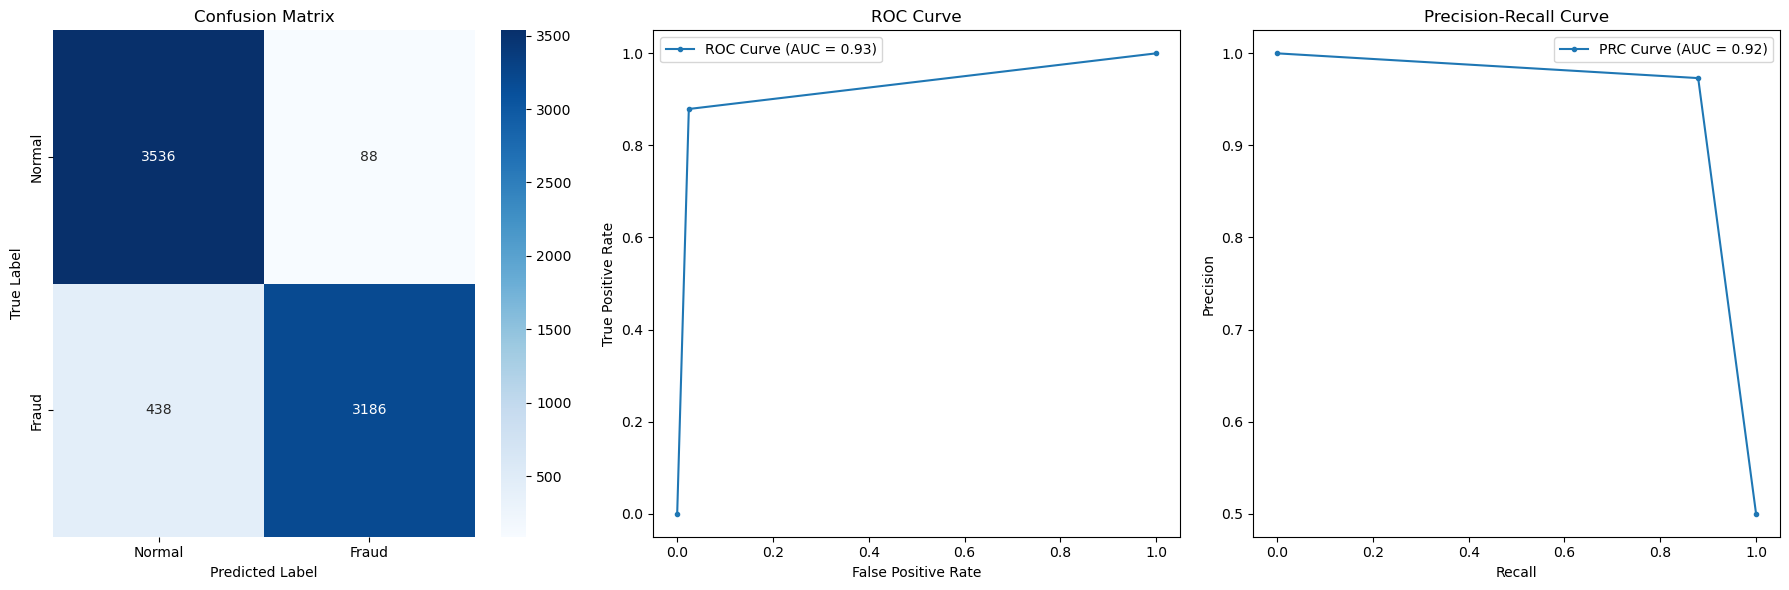

In [88]:
# Plot metrics of tuned logistic regression model
plot_metrics(y_test_res, lr_optimized_pred)

## Model Explainability

To accomplish one of our objectives in creating policy recommendations, we implemented model explainability methods to discover which features significantly affects our model.

### Feature Importances

In [94]:
final_model = lr_best_model
final_dt_model = best_decision_tree_model

feature_importances = final_dt_model.feature_importances_
features = X_train_res.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
60          BasePolicy_Liability    0.197291
32                         Fault    0.120222
46                    Deductible    0.089161
38  PolicyType_Sedan - Collision    0.069781
62         BasePolicy_All Perils    0.047604
..                           ...         ...
21                    Make_Lexus    0.000000
20                  Make_Ferrari    0.000000
17                   Make_Porche    0.000000
12                   Make_Jaguar    0.000000
34  PolicyType_Sport - Collision    0.000000

[63 rows x 2 columns]

### PDP

The Partial Dependence Plot (PDP) is a valuable tool for understanding the relationship between the features of a machine learning model and the predicted outcome. In the context of a logistic regression model, PDPs help visualize how each feature influences the model's predictions, holding other features constant. This analysis provides insights into the behavior of the model and highlights the most significant features affecting the outcome.

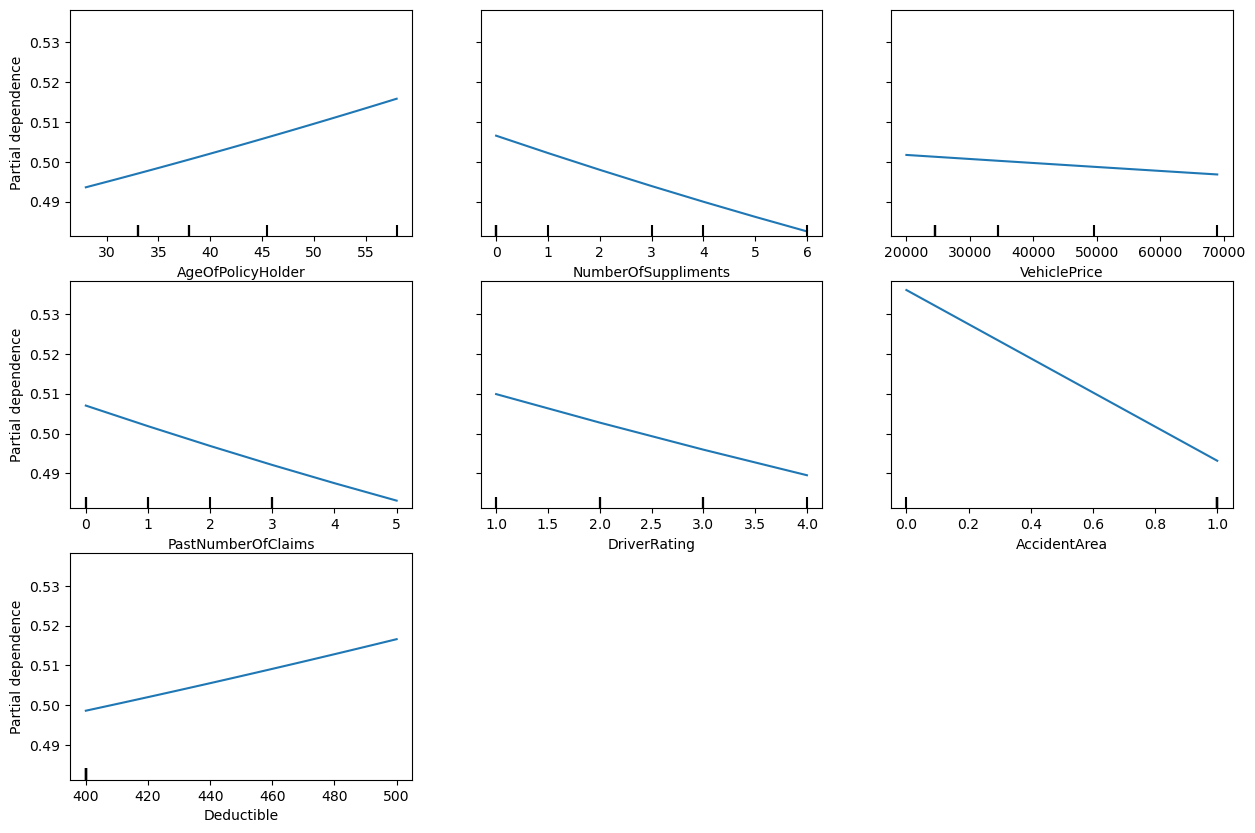

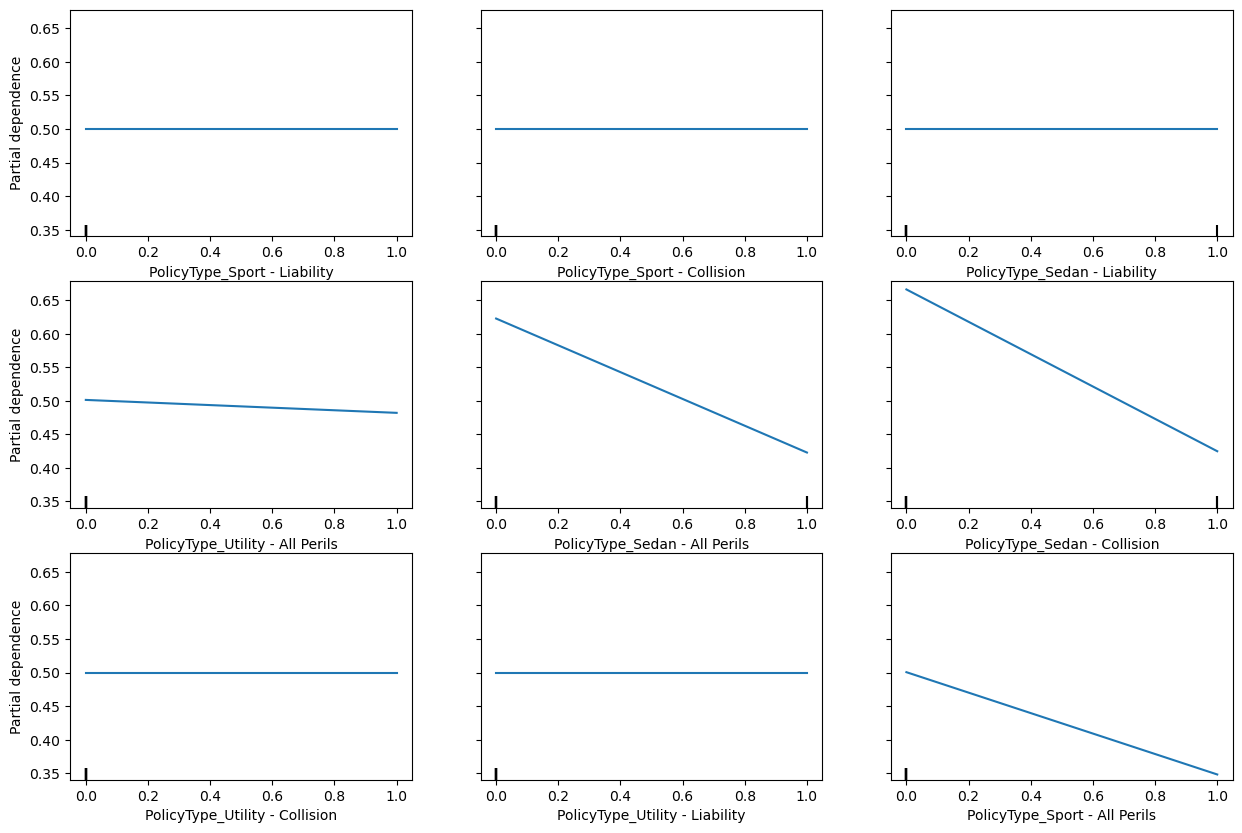

In [108]:
# Extract column indices from best_model
selected_columns = ['AgeOfPolicyHolder', 'NumberOfSuppliments', 'VehiclePrice', 'PastNumberOfClaims'
                    , 'DriverRating', 'AccidentArea', 'Deductible']

# Extract all columns that start with PolicyType
policy_type_cols = [col for col in X_train_res.columns if col.startswith('PolicyType')]

# Display partial dependence plot
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(final_model, X_train_res, selected_columns, ax=ax)

fig2, ax2 = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(final_model, X_train_res, policy_type_cols, ax=ax2)



**Analysis**

**1. Age of Policy Holder**
- **Observation:** The partial dependence plot shows a slight upward trend, indicating that as the policyholder's age increases, the likelihood of the claim being flagged as fraudulent also increases.
- **Interpretation:** Older policyholders might be seen as higher risk, leading to a higher chance of their claims being flagged.

**2. Number of Supplements**
- **Observation:** The plot reveals a downward trend, suggesting that more supplementary documents with a claim correspond to a lower chance of it being flagged as fraudulent.
- **Interpretation:** Providing more supporting documents might make a claim seem more legitimate and less likely to be flagged.

**3. Vehicle Price**
- **Observation:** There is a slight negative slope, indicating that higher vehicle prices are associated with a lower likelihood of the claim being flagged as fraudulent.
- **Interpretation:** More expensive vehicles might be better cared for, which could reduce the suspicion of fraud.

**4. Past Number of Claims**
- **Observation:** The plot shows a decreasing trend, meaning that having more past claims leads to a lower chance of the current claim being flagged as fraudulent.
- **Interpretation:** Insurers might be more familiar with policyholders who have made multiple claims, leading to less suspicion.

**5. Driver Rating**
- **Observation:** A negative slope is observed, indicating that higher driver ratings decrease the likelihood of the claim being flagged as fraudulent.
- **Interpretation:** Drivers with higher ratings are usually considered safer, making their claims less likely to be flagged.

**6. Accident Area**
- **Observation:** The plot shows a strong negative slope, suggesting that claims from certain areas, like urban areas, are more likely to be flagged as fraudulent.
- **Interpretation:** Urban areas might have more frequent accidents, which could lead to more scrutiny of claims from these regions.

**7. Deductible**
- **Observation:** The partial dependence plot shows a slight positive slope, indicating that higher deductibles are associated with an increased likelihood of the claim being flagged as fraudulent.
- **Interpretation:** Policyholders with higher deductibles might be viewed as more likely to commit fraud, leading to more attention on their claims.

**8. Policy Type - Sport, Utility, Sedan (Liability, Collision, All Perils)**
- **Observation:** The partial dependence plots for various policy types show mixed slopes, with some types showing a noticeable downward trend.
- **Interpretation:** Some types of policies, especially those offering comprehensive coverage, might be less likely to be associated with fraudulent claims, possibly due to better coverage or more cautious behavior from policyholders.
us behavior from policyholders.
us behavior from policyholders.


### SHAP

SHapley Additive exPlanations (SHAP) values are a powerful method for interpreting machine learning models, providing insights into the contribution of each feature to the model’s predictions. In the context of a logistic regression model, SHAP values allow us to understand how each feature influences the probability of a certain outcome (e.g., fraud detection in insurance claims). The SHAP summary plot visualizes the impact of each feature across the dataset, highlighting both the magnitude and direction of influence.

In [96]:
# Create the SHAP explainer
explainer = shap.LinearExplainer(final_model, X_train_res)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_res)

# Convert SHAP values to a DataFrame for easier visualization
shap_values_df = pd.DataFrame(shap_values, columns=X_train_res.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


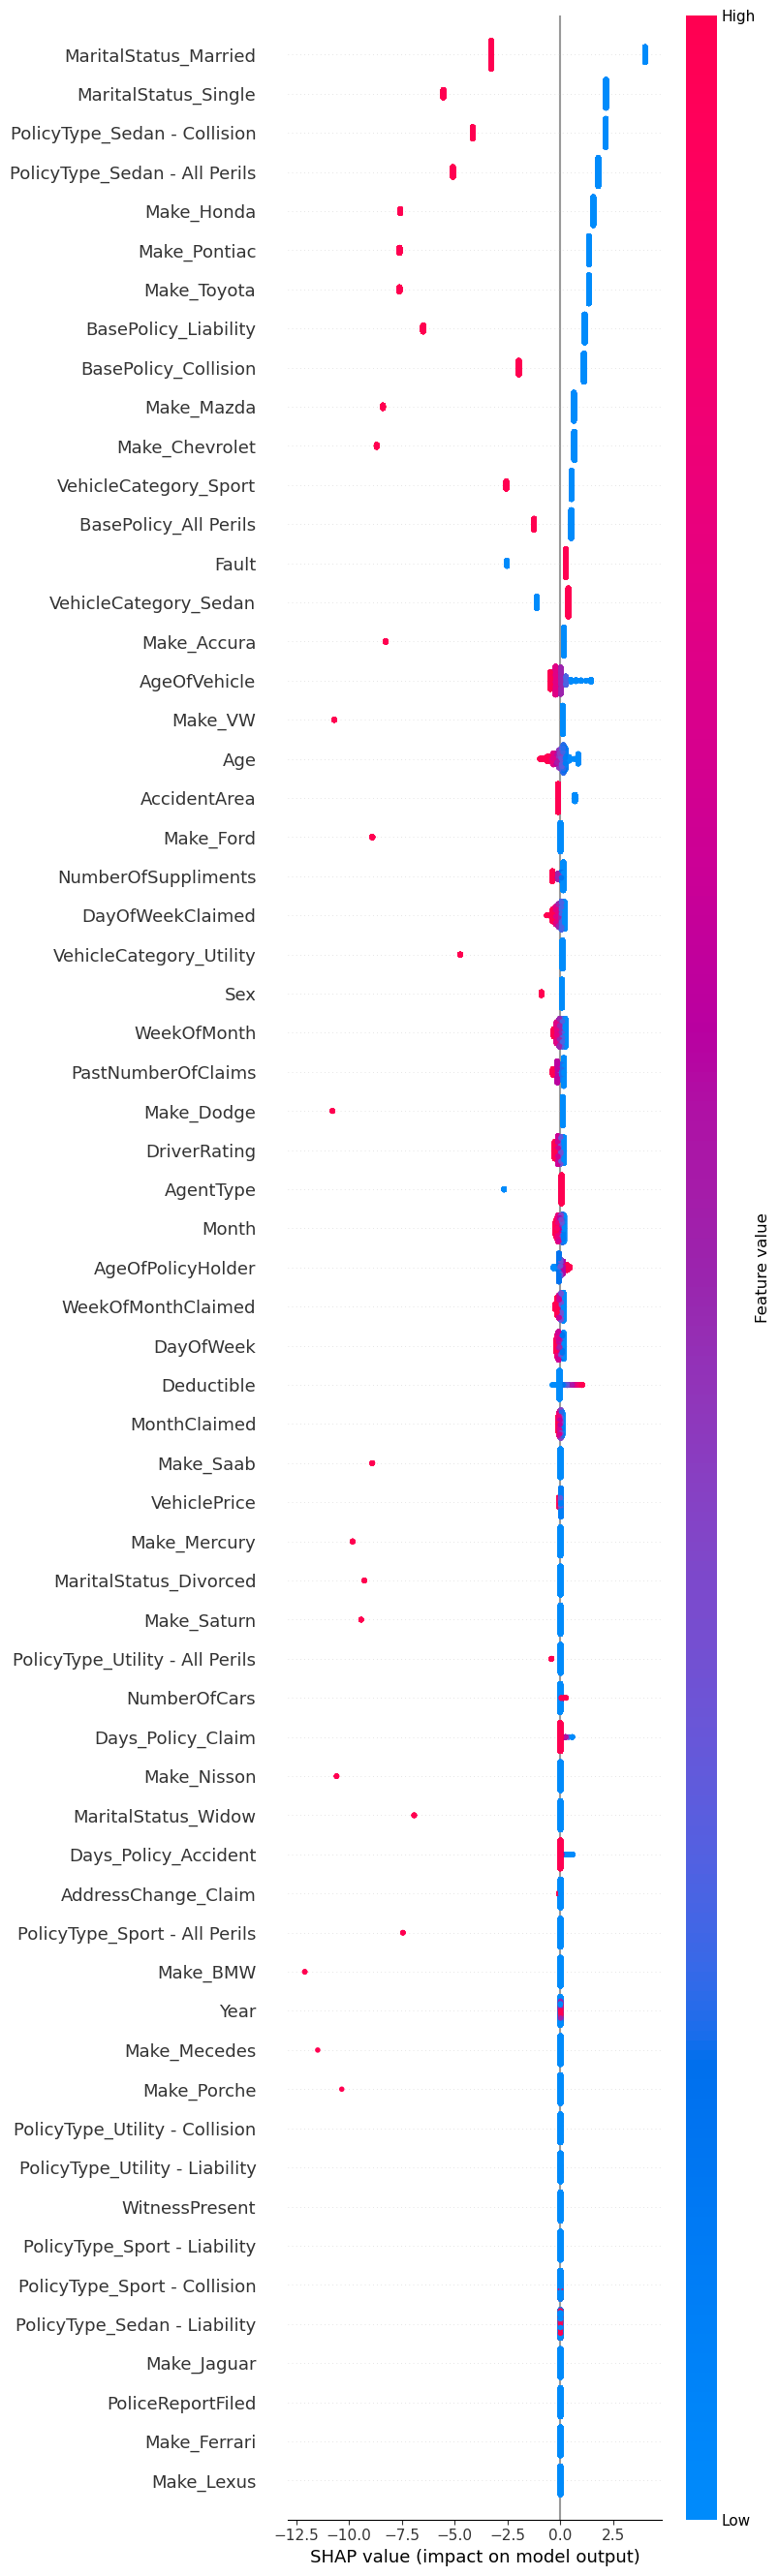

In [97]:
shap.summary_plot(shap_values, X_test_res, feature_names=X_train_res.columns, max_display=70)

In [98]:
explainer = shap.Explainer(final_model, X_train_res, feature_names=X_train_res.columns)
shap_values = explainer(X_test_res)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


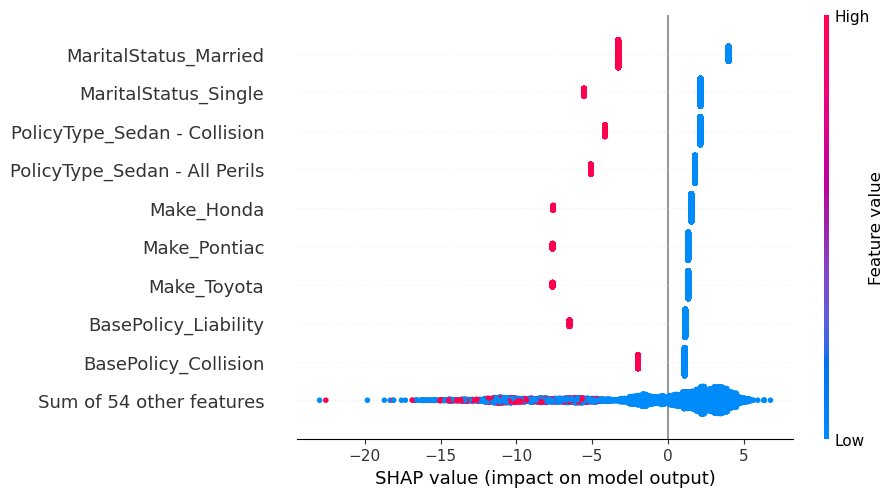

In [99]:
shap.plots.beeswarm(shap_values)

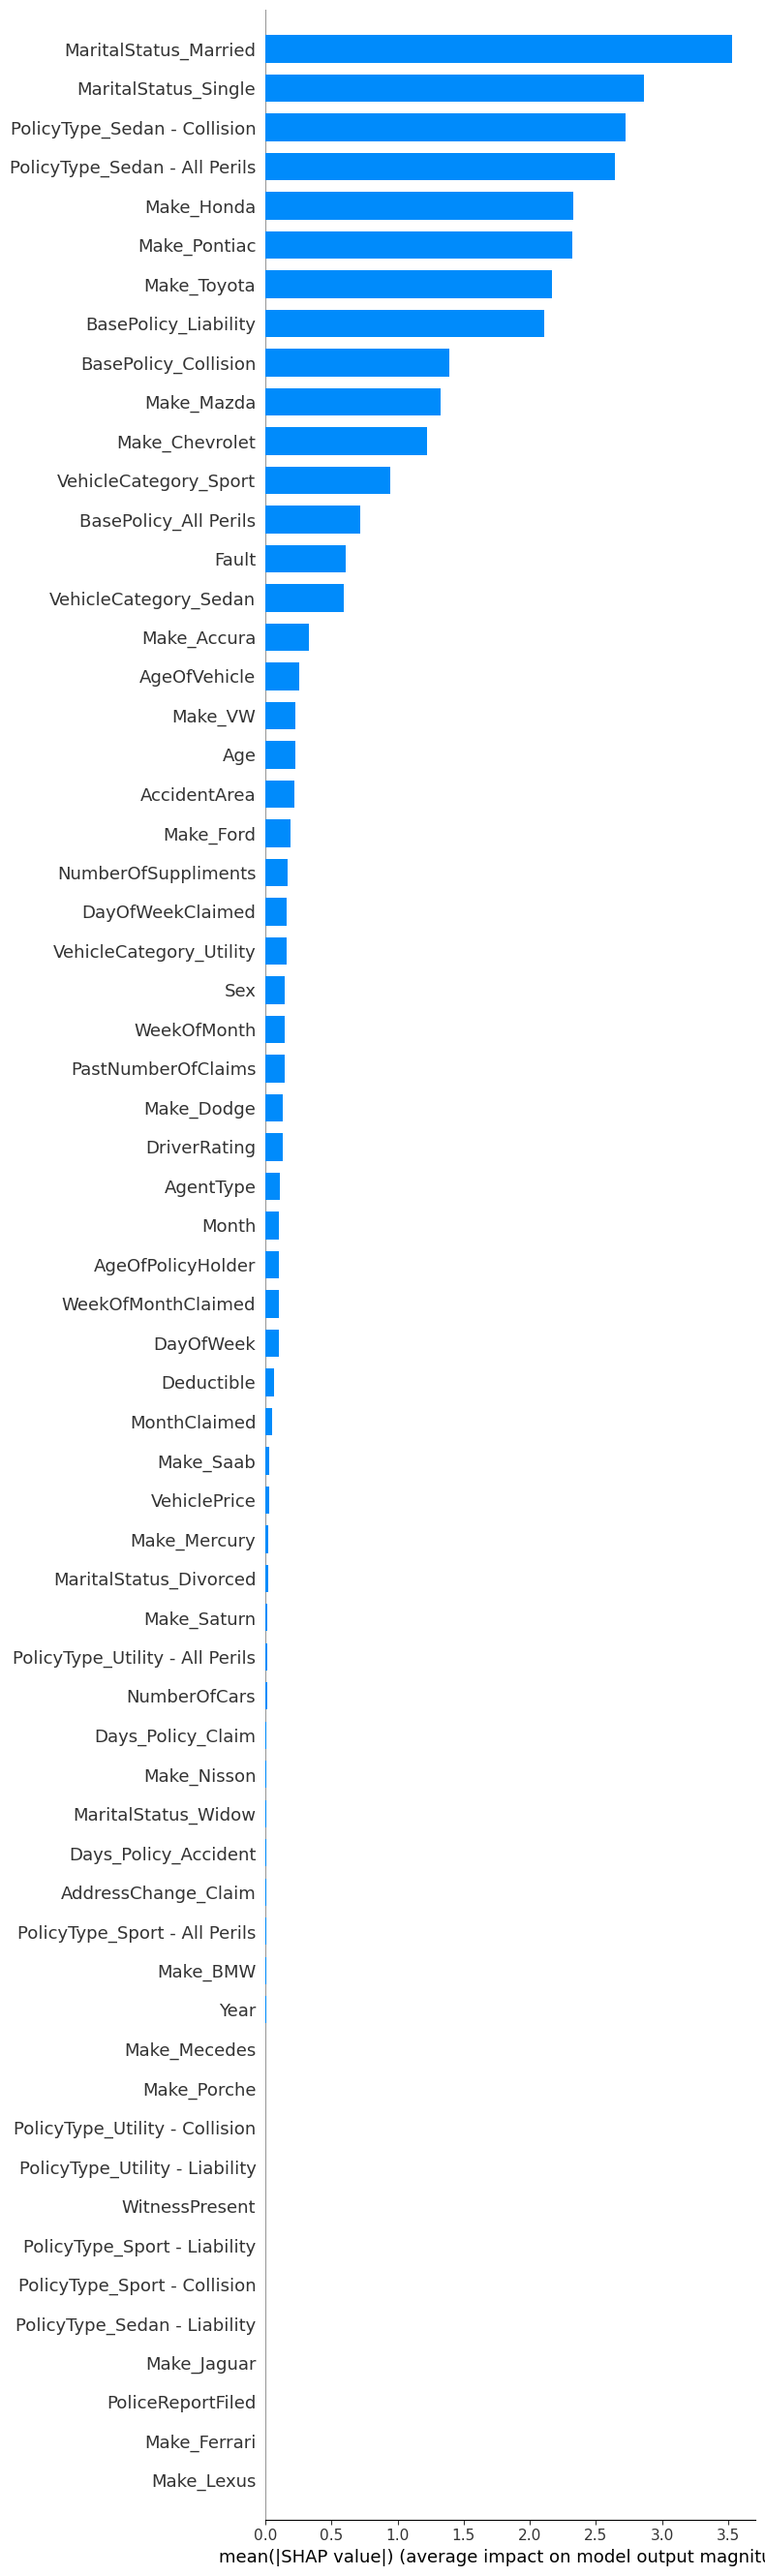

In [100]:
shap.summary_plot(shap_values, X_test_res, feature_names=X_train_res.columns, max_display=70, plot_type='bar')

**Understanding the Red and Blue Colors:**
   - **Red:** Indicates higher values of the feature. For example, if the feature is age, red would represent older policyholders.
   - **Blue:** Indicates lower values of the feature. For example, if the feature is age, blue would represent younger policyholders.

**Understanding the Left and Right Positioning:**
   - **Left (Negative SHAP Values):** Features positioned on the left (with negative SHAP values) decrease the likelihood of the predicted outcome (e.g., fraud).
   - **Right (Positive SHAP Values):** Features positioned on the right (with positive SHAP values) increase the likelihood of the predicted outcome.

**Key Observations**

1. **MaritalStatus_Married and MaritalStatus_Single:**
   - **Impact:** 'Married' (blue) tends to decrease the likelihood of fraud, while 'Single' (red) tends to increase it.
   - **Interpretation:** Being married is associated with a lower risk of fraud, while being single is associated with a higher risk.
2. **PolicyType_Sedan (Collision and All Perils):**
   - **Impact:** Policies like 'Sedan - Collision' and 'Sedan - All Perils' (mostly red) are on the left, suggesting these reduce the likelihood of fraud.
   - **Interpretation:** These comprehensive policies are less likely to be associated with fraud.
3. **Vehicle Make (Honda, Pontiac, Toyota):**
   - **Impact:** Certain vehicle makes like Honda, Pontiac, and Toyota (mostly red) are on the right, indicating they increase the likelihood of a claim being flagged as fraudulent.
   - **Interpretation:** These makes might be more common or associated with higher-risk claims, leading to more fraud suspicion.
4. **BasePolicy (Liability and Collision):**
   - **Impact:** Base policies like 'Liability' and 'Collision' (red) are shown on the right, suggesting they increase the likelihood of fraud detection.
   - **Interpretation:** These policies might be more prone to scrutiny, or they may be linked to higher-risk claims.
5. **Age and AgeOfVehicle:**
   - **Impact:** Both age and vehicle age show mixed SHAP values, with older ages (red) slightly reducing fraud likelihood and younger ages (blue) slightly increasing it.
   - **Interpretation:** Older vehicles and policyholders might be seen as lower risk, leading to fewer fraud flags.


### LIME

Local Interpretable Model-agnostic Explanations (LIME) is a technique used to explain individual predictions of any machine learning model. It approximates the model locally around the prediction with an interpretable model, such as a linear regression, and then explains how each feature contributes to the prediction. In this example, we use LIME to explain the prediction for the 800th instance in the test set of a logistic regression model.

In [101]:
explainer = LimeTabularExplainer(X_train_res.values, feature_names=X_train_res.columns.values.tolist(),
                                                  class_names=['FraudFound_P'], verbose=True, mode='classification')

In [102]:
# Choose the 100th instance and use it to predict the results
j = 100
exp = explainer.explain_instance(X_test_res.values[j], final_model.predict_proba, num_features=len(X_train_res.columns))

Intercept -3.8421817828137836
Prediction_local [0.00311239]
Right: 0.10077123539432145


X does not have valid feature names, but LogisticRegression was fitted with feature names


In [103]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [104]:
exp.as_list()

[('Year <= 1994.00', -0.39610947587772805),
 ('Make_Nisson <= 0.00', 0.34225622172044456),
 ('Make_VW <= 0.00', 0.33549285873470847),
 ('Make_Mazda <= 0.00', 0.2937654419743583),
 ('Make_Honda > 0.00', -0.2903966046462946),
 ('Make_Pontiac <= 0.00', 0.2886013167912158),
 ('Make_Chevrolet <= 0.00', 0.28065779165105015),
 ('Make_Toyota <= 0.00', 0.2806335762507225),
 ('MaritalStatus_Married <= 0.00', 0.26737736433584264),
 ('MaritalStatus_Single > 0.00', -0.26359699527751884),
 ('Make_Saab <= 0.00', 0.25978293579067097),
 ('PolicyType_Sedan - All Perils <= 0.00', 0.2565925086232025),
 ('BasePolicy_Liability > 0.00', -0.2514601469031055),
 ('Make_Ford <= 0.00', 0.24151921415823105),
 ('Make_Mercury <= 0.00', 0.22735122222259352),
 ('Make_Jaguar <= 0.00', 0.21592179176410475),
 ('PolicyType_Sedan - Collision <= 0.00', 0.21566546226975425),
 ('Make_Accura <= 0.00', 0.21465456743540642),
 ('Make_Dodge <= 0.00', 0.20710773191450788),
 ('MaritalStatus_Divorced <= 0.00', 0.1953802843516148),
 (

In [105]:
# Choose the 800th instance and use it to predict the results
j = 800
exp = explainer.explain_instance(X_test_res.values[j], final_model.predict_proba, num_features=len(X_train_res.columns))

Intercept -4.47152468744064
Prediction_local [0.29550217]
Right: 0.0035505116490241596


X does not have valid feature names, but LogisticRegression was fitted with feature names


In [106]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [107]:
exp.as_list()

[('Make_Dodge <= 0.00', 0.3727393281968519),
 ('Make_Saab <= 0.00', 0.3230589052277405),
 ('Make_BMW <= 0.00', 0.3088731762697627),
 ('Make_Saturn <= 0.00', 0.30699433829745554),
 ('1994.00 < Year <= 1995.00', 0.2997711408348478),
 ('Make_VW <= 0.00', 0.29958395108483166),
 ('Make_Pontiac > 0.00', -0.29772369114367325),
 ('Make_Honda <= 0.00', 0.296685841266208),
 ('Make_Mazda <= 0.00', 0.2916596303344215),
 ('MaritalStatus_Single <= 0.00', 0.2812346450588073),
 ('Make_Chevrolet <= 0.00', 0.28039547514536484),
 ('Make_Accura <= 0.00', 0.27885838527760765),
 ('Make_Toyota <= 0.00', 0.2695371844085883),
 ('Make_Ford <= 0.00', 0.26209699412908855),
 ('0.00 < MaritalStatus_Married <= 1.00', -0.25701943557517143),
 ('Make_Mercury <= 0.00', 0.2491427693863459),
 ('BasePolicy_Liability > 0.00', -0.2472360156373823),
 ('Make_Nisson <= 0.00', 0.24710270185524263),
 ('Make_Jaguar <= 0.00', 0.2374286513799333),
 ('PolicyType_Sedan - All Perils <= 0.00', 0.23035864776819426),
 ('PolicyType_Sedan -

**LIME Explanation for the 800th Instance:**

- **Intercept:** -4.4715
  - The intercept represents the baseline prediction (log-odds) before any feature effects are added. This value is the starting point before considering the contribution of individual features.

- **Prediction_local:** 0.2955
  - This is the predicted probability of the target class (e.g., fraud detection) for the specific instance, considering the contributions of all the features.

- **Top Contributing Features:**
  - **Make_Dodge <= 0.00 (0.3727):** Not owning a Dodge contributes significantly to increasing the probability of the predicted outcome.
  - **Make_Saab <= 0.00 (0.3231):** Similarly, not owning a Saab also contributes to increasing the probability.
  - **Make_BMW <= 0.00 (0.3089):** Not owning a BMW further increases the likelihood of the outcome.
  - **MaritalStatus_Single <= 0.00 (0.2812):** Being single contributes to an increased likelihood of the predicted outcome.
  - **1994.00 < Year <= 1995.00 (0.2998):** Having a vehicle model year between 1994 and 1995 adds to the likelihood of the predicted outcome.
  - **NumberOfCars <= 1.00 (-0.0289):** Having one or fewer cars decreases the likelihood of the predicted outcome, suggesting a protective effect.
  - **AgeOfVehicle > 7.00 (-0.0257):** Having a vehicle older than 7 years decreases the likelihood of the predicted outcome.
  - **PolicyType_Sedan - All Perils <= 0.00 (0.2304):** Not having a 'Sedan - All Perils' policy increases the likelihood of the predicted outcome.
  - **BasePolicy_Liability > 0.00 (-0.2472):** Having a 'Liability' base policy decreases the likelihood of the predicted outcome, indicating a protective effect.
  - **VehicleCategory_Utility <= 0.00 (0.1488):** Not having a utility vehicle increases the likelihood of the predicted outcome.
  - **PolicyType_Sedan - Collision <= 0.00 (0.2111):** Not having a 'Sedan - Collision' policy also increases the likelihood of the predicted outcome.
  - **MaritalStatus_Married > 0.00 (-0.2570):** Being married decreases the likelihood of the predicted outcome.

**Understanding the Feature Contributions:**
  - Features with positive values (e.g., 'Make_Dodge <= 0.00') increase the likelihood of the predicted outcome (e.g., a claim being flagged as fraudulent).
  - Features with negative values (e.g., 'BasePolicy_Liability > 0.00') decrease the likelihood of the predicted outcome, suggesting that they protect against it.

**Interpretation:**
- The LIME explanation provides insights into how specific features contribute to the model’s prediction for this particular instance. For example, not owning certain vehicle makes (like Dodge, Saab, and BMW), being single, and not having specific insurance policies (like 'Sedan - All Perils') are factors that increased the predicted probability of the outcome.
- On the other hand, features like being married, having a liability base policy, and owning an older vehicle are associated with a decreased likelihood of the predicted outcome, indicating a protective effect.


## Summary of Findings
PDP Results:
* Age of Policy Holder: Slight decrease in predicted outcome as age increases.
* Number of Supplements: Minimal impact on predictions.
* Age of Vehicle: Noticeable decrease in predicted outcome with increasing vehicle age.
* Vehicle Price: Little to no change in predicted outcome with price increase.
* Past Number of Claims: Slight decrease in predicted outcome with more claims.
* Driver Rating: Minor decreasing trend in predicted outcome with higher ratings.
* Accident Area: Modest downward trend in predicted outcome.
* Deductible: Decrease in predicted outcome as deductible increases.

Logistic Regression Coefficients:
* Positive impacts: Fault, AgentType, VehicleCategory_Sedan.
* Negative impacts: Make_BMW, Make_Mercedes, Make_VW.

SHAP Results:
* Key positive features: PolicyType_Sedan - Collision, MaritalStatus_Single.
* Key negative features: MaritalStatus_Married, BasePolicy_Liability.

LIME Results:
* Important positive features: Make_Dodge, Make_Nissan, Year.
* Important negative feature: Make_Pontiac.


### Hypotheses

| **Feature**              | **Hypothesis**                                                                                   |
|--------------------------|--------------------------------------------------------------------------------------------------|
| **Age of Policyholder**   | Older policyholders have a higher likelihood of committing fraud.                                |
| **Number of Supplements** | Claims with a lower number of supplements are more likely to be fraudulent.                      |
| **Age of Vehicle**        | Older vehicles are more likely to be involved in fraudulent claims.                              |
| **Vehicle Price**         | Higher vehicle prices are associated with a higher likelihood of fraud.                          |
| **Past Number of Claims** | Policyholders with more past claims are more likely to file fraudulent claims.                   |
| **Driver Rating**         | Policyholders with lower driver ratings are more likely to file fraudulent claims.               |
| **Policy Type**           | Certain policy types are more prone to fraud.                                                    |
| **Accident Area**         | Claims from urban areas have a higher probability of being fraudulent than rural areas.          |
| **Deductible**            | Claims with lower deductibles are more likely to be fraudulent.                                  |
| **BasePolicy**            | Different base policies may have different fraud likelihoods.                                    |


### Analysis Table with Values for Each Approach

| Feature                | PDP Analysis                           | SHAP Analysis                                                                 | LIME Analysis                                                                                                                                           | LogReg Coefficients Analysis                                                                                |
|------------------------|-----------------------------------------|-------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| Age of Policyholder     | Positive relationship, slight increase | Slight positive effect; older policyholders associated with slightly higher fraud. | 0.00276 (33-38 years) and 0.00139 (30-38 years) | Coefficient: 0.002191, Positive; older age slightly associated with higher fraud probability. |
| Number of Supplements   | Negative relationship, fewer supplements linked to higher fraud. | Strong negative impact; fewer supplements increase fraud likelihood.           | -0.01948 (3 supplements) | Coefficient: -0.086292, Negative; fewer supplements linked with higher fraud probability. |
| Age of Vehicle          | Negative relationship, older vehicles linked to higher fraud. | Older vehicles push SHAP values towards fraud detection.                      | -0.02568 (7+ years) | Coefficient: -0.264076, Negative; older vehicles linked with higher fraud probability. |
| Vehicle Price           | Slight negative relationship, minimal impact | Minimal impact; slight negative effect on fraud likelihood.                    | -0.01715 (24,500-34,500) | Coefficient: -0.000001, Slightly negative; minimal impact on fraud probability. |
| Past Number of Claims   | Negative relationship, more past claims linked to higher fraud. | Slight increase in SHAP values for more past claims, towards fraud detection.  | 0.00916 (1-3 claims) | Coefficient: -0.104956, Slightly negative; more claims slightly increase fraud likelihood. |
| Driver Rating           | Negative relationship, lower ratings linked to higher fraud. | Lower driver ratings increase fraud likelihood.                                | -0.01625 (2-3 ratings) | Coefficient: -0.141336, Negative; lower ratings linked with higher fraud probability. |
| Accident Area           | Slight negative relationship, urban areas linked to higher fraud. | Slightly higher SHAP values for urban areas, associated with fraud.            | 0.0 (Urban/Rural) | Coefficient: -0.780498, Negative; urban areas linked with higher fraud probability. |
| Deductible              | Slight positive relationship, minimal impact. | Minimal impact; slightly positive SHAP values for higher deductibles.          | 0.00123 (<= 400) | Coefficient: 0.003542, Slightly positive; higher deductibles linked with slightly higher fraud probability. |
| Base Policy             | Mixed impact, depending on policy type. | Varies significantly; certain policy types push SHAP values towards fraud.     | Mixed impact across policy types, with some linked to higher fraud. | Coefficients: Mixed; certain policy types show higher fraud probability (e.g., 'BasePolicy_Liability': -7.069361, 'PolicyType_Sedan - Collision': -6.817976). |

nimal effects observed.


### Supported and Opposed Hypotheses

#### Supported Hypotheses
- **Age of Policyholder:** Older policyholders have a higher likelihood of committing fraud, supported by the slight positive relationship found in the analyses.
- **Number of Supplements:** Fewer supplements are associated with higher fraud probability across all analyses.
- **Age of Vehicle:** Older vehicles are consistently linked with higher fraud probability.
- **Driver Rating:** Lower driver ratings are linked with higher fraud likelihood.
- **Base Policy:** Certain policy types are more prone to fraud, with varying effects observed across analyses.
- **Past Number of Claims:** More past claims are linked with a slightly higher fraud probability according to SHAP and LogReg analysis.
- **Deductible:** The hypothesis that lower deductibles are linked with higher fraud is supported by SHAP analysis.

#### Opposed Hypotheses
- **Vehicle Price:** The hypothesis that higher vehicle prices are associated with higher fraud likelihood is opposed, as analyses suggest a slight negative or minimal impact.
- **Accident Area:** The hypothesis that claims from urban areas have a higher probability of being fraudulent is opposed, with only minimal effects observed.

## Policy Recommendations

From our results, the following measures were determined: 

First, we suggest to impose stricter reviews/protocols for policyholders with higher age and/or lower driver rating. 

Second, is to Require more supplementary documents for claims with newer vehicles. High-risk policies should be established with more guidelines. 

Third, Stricter reviews for policyholders with a high number of claims. 

Lastly, consistent scrutiny across areas.

To conclude, by adopting these recommended measures, insurance companies can significantly enhance their risk management and claims processing procedures. Stricter reviews and protocols for older policyholders or those with lower driver ratings, additional documentation for claims on newer vehicles, and more comprehensive guidelines for high-risk policies will help mitigate potential risks. Additionally, applying more rigorous scrutiny to policyholders with a high number of claims and maintaining consistent evaluation standards across all areas will ensure a fair and reliable system. These improvements will not only protect the company's interests but also promote a more trustworthy and efficient service for all policyholders.

## References

Artis, M., Ayuso, M., & Guillén, M. (2002). Detection of automobile insurance fraud with discrete choice models and misclassified claims. Journal of Risk and Insurance, 69(3), 325-340. http://www.jstor.org/stable/1558681

Aslam, F., Hunjra, A., Ftiti, Z., Louhichi, W., & Shams, T. (2022). Insurance fraud detection: Evidence from artificial intelligence and machine learning, Research in International Business and Finance. Volume 62, 101744, ISSN 0275-5319. https://doi.org/10.1016/j.ribaf.2022.101744

Bansal, S. (2022). Vehicle Claim Insurance Fraud Detection. Kaggle. 
https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

Bhattacharyya, S., Jha, S., Tharakunnel, K., & Westland, J. C. (2011). Data mining for credit card fraud: A comparative study. Decision Support Systems, 50(3), 602-613. https://psycnet.apa.org/doi/10.1016/j.dss.2010.08.008

Brownlee, J. (2021). SMOTE for Imbalanced Classification in Python. Machine Learning Mastery. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Dellinger, A.J., Posey, M. & Friedlander, M. (2024, March 21). 6 Types of Car Insurance Fraud. Bankrate. https://www.bankrate.com/insurance/car/fraud/

Insurance Fraud. Federal Bureau of Investigation. (2022). 
https://www.fbi.gov/stats-services/publications/insurance-fraud

Kilroy, A. (2024, March 21). Insurance Fraud Statistics 2024. Forbes Advisor. 
https://www.forbes.com/advisor/insurance/fraud-statistics/#:~:text=The%20Coalition%20Against%20Insurance%20Fraud%20reports%20auto%20theft%20losses%20equate,Americans%20%24308%20billion%20per%20year.

Nordin, S.-Z., Wah, Y., Ng, H., Hashim, A., Ramli, N & Norasibah, A. (2024). Predicting automobile insurance fraud using classical and machine learning models. International Journal of Electrical and Computer Engineering (IJECE). http://doi.org/10.11591/ijece.v14i1.pp911-921

Phua, C., Lee, V., Smith, K., & Gayler, R. (2010). A comprehensive survey of data mining-based fraud detection research. ResearchGate. https://www.researchgate.net/publication/46887451_A_Comprehensive_Survey_of_Data_Mining-based_Fraud_Detection_Research

Rukhsar, L., Bangyal, W. H., Nisar, K., & Nisar, S. (2022). Prediction of insurance fraud detection using machine learning algorithms. Mehran University Research Journal Of Engineering & Technology, 41(1), 33–40. https://search.informit.org/doi/10.3316/informit.263147785515876

Sharma, M. (2024). The Battle Against Deceit: Innovations in Insurance Fraud Detection. Cogneesol. https://www.cogneesol.com/blog/innovations-in-insurance-fraud-detection/#:~:text=The%20traditional%20approaches%20of%20fraud,watchlists%2C%20and%20also%20whistleblower%20reports

Viaene, S., Derrig, R. A., Baesens, B., & Dedene, G. (2002). A comparison of state-of-the-art classification techniques for expert automobile insurance claim fraud detection. Journal of Risk and Insurance, 69(3), 373-421. http://www.jstor.org/stable/1558683.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d7b8cbe3-3bcd-4540-9b44-aec50f1979ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>